# Time Series Basics
According to <a href='https://en.wikipedia.org/wiki/Time_series'>wikipedia</a>, a time series is "a series of data points indexed in time order." The goal of time series analysis is to predict future values based on past behavior. 

This differs from other analyses that compare $x$ to $y$, since $x$ is not really a variable. For example, if I measure the boiling point of water with 1%, 3%, 5% and 7% salt solutions, I should be able to predict the boiling point at 4%. But with time series, we can't go back and "plug in" a new value of $x$, since we can never go back in time. For this reason, a time series with one $y$ variable is called <em>univariate</em>. 



<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>by Rob J Hyndman and George Athanasopoulos</font><br>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>Introduction to Time Series Analysis</font></div>

In [ ]:
# RUN THIS CELL TO DISPLAY THE PLOT
import pandas as pd
%matplotlib inline

# Source: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html
df = pd.read_csv('../Data/co2_mm_mlo.csv', encoding='utf8')
df.head()

year  month  decimal_date  average  interpolated
0  1958      3      1958.208   315.71        315.71
1  1958      4      1958.292   317.45        317.45
2  1958      5      1958.375   317.50        317.50
3  1958      6      1958.458      NaN        317.10
4  1958      7      1958.542   315.86        315.86

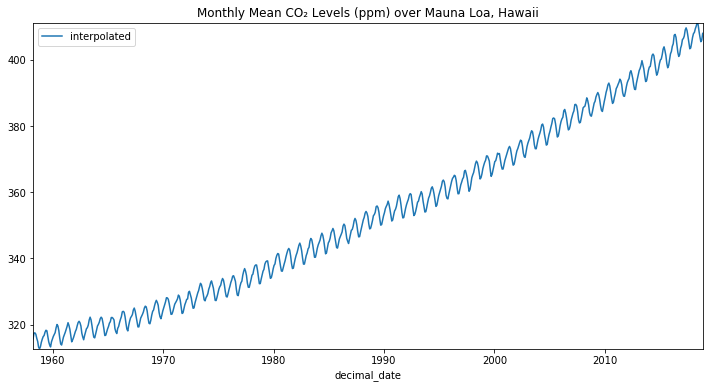

In [ ]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
df.plot('decimal_date','interpolated',figsize=(12,6),title=title).autoscale(axis='both',tight=True);

The above plot clearly illustrates some of the fundamentals of time series analysis:
* **trend** - over the past 60 years there is a clear, non-linear upward trend in the levels of CO<sub>2</sub> in the atmosphere at Mauna Loa, Hawaii
* **seasonality** - within any given year there are cyclical patterns of rising and falling CO<sub>2</sub> levels
* **noise** - we also see random, non-systemic fluctuations in the data


## What are "endog" and "exog"?
The data seen in a time series is described as either <em>endogenous</em>, that is, caused by factors within the system, or <em>exogenous</em>, caused by factors outside the system. We'll see that many statsmodels tools use <tt>endog</tt> to represent the incoming time series data in place of the constant <tt>y</tt>.<br>
For more information, visit http://www.statsmodels.org/stable/endog_exog.html

# The `datetime` module
Python has built-in date, time and datetime objects available through the `datetime` module<br>
For more info on datetime visit https://docs.python.org/3/library/datetime.html

In [ ]:
# Import the entire module:
import datetime

### datetime `time` objects
Values can be passed in as keyword arguments...

In [ ]:
tm = datetime.time(hour=5,minute=25,second=1)
tm

datetime.time(5, 25, 1)

...or as positional arguments.

In [ ]:
tm = datetime.time(5,25,1)
tm

datetime.time(5, 25, 1)

In [ ]:
print(tm)

05:25:01


In [ ]:
type(tm)

datetime.time

### datetime `date` objects

In [ ]:
dt = datetime.date(2019,1,2)
dt

datetime.date(2019, 1, 2)

In [ ]:
print(dt)

2019-01-02


In [ ]:
type(dt)

datetime.date

### datetime `datetime` objects

In [ ]:
d = datetime.datetime(2019, 1, 2, 5, 25, 1)
d

datetime.datetime(2019, 1, 2, 5, 25, 1)

In [ ]:
print(d)

2019-01-02 05:25:01


In [ ]:
type(d)

datetime.datetime

<font color=green>When no time data is provided, minimum values are used:</font>

In [ ]:
d = datetime.datetime(2019, 2, 2)
print(d)

2019-02-02 00:00:00


### Selective import
For efficiency, we can import just those object classes we plan to use.

In [ ]:
from datetime import datetime, date, time

d = datetime(2019, 3, 1, 15, 10)    # this is easier to type
print(d)

2019-03-01 15:10:00


## `date`, `time`, and `datetime` components
We can access specific elements of the date and time within each object.

In [ ]:
print(tm)
print(tm.minute)

05:25:01
25


In [ ]:
print(dt)
print(dt.day)

2019-01-02
2


In [ ]:
print(d)
print(d.second)

2019-03-01 15:10:00
0


<font color=green>Of course, time objects don't contain date information, and date objects don't store time.</font>

In [ ]:
print(tm.day)

AttributeError: 'datetime.time' object has no attribute 'day'

In [ ]:
print(dt.second)

AttributeError: 'datetime.date' object has no attribute 'second'

## Today's date
Both `date` and `datetime` objects offer a `.today()` method that returns the current date as determined by the computer system clock.

In [ ]:
x = date.today()
print(x)

2019-01-03


In [ ]:
y = datetime.today()
print(y)

2019-01-03 12:15:05.526582


<font color=green>Note that assignments take a snapshot of the current date and store it. This value doesn't move forward with time.</font>

In [ ]:
print(y)

2019-01-03 12:15:05.526582


## Useful methods

In [ ]:
d = datetime(1969,7,20,20,17)

**`d.weekday()`** returns the day of the week as an integer, where Monday is 0 and Sunday is 6

In [ ]:
d.weekday()

6

**`d.isoweekday()`** returns the day of the week as an integer, where Monday is 1 and Sunday is 7

In [ ]:
d.isoweekday()

7

**`d.replace()`** returns a modified copy of the original, permitting substitutions for any date/time attribute

In [ ]:
d.replace(year=1975,month=3)

datetime.datetime(1975, 3, 20, 20, 17)

<font color=green>Note that <tt>d.replace()</tt> does not change the original.</font>

In [ ]:
print(d)

1969-07-20 20:17:00


## Time tuples
`datetime.timetuple()` returns a named tuple of values. Note that `date.timetuple()` returns 0 values for time elements.

In [ ]:
r = date(2004,10,27)
s = datetime(2004,10,27,20,25,55)

In [ ]:
r.timetuple()

time.struct_time(tm_year=2004, tm_mon=10, tm_mday=27, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=301, tm_isdst=-1)

In [ ]:
s.timetuple()

time.struct_time(tm_year=2004, tm_mon=10, tm_mday=27, tm_hour=20, tm_min=25, tm_sec=55, tm_wday=2, tm_yday=301, tm_isdst=-1)

<table style="display: inline-block">
<caption style="text-align: center">**TIME TUPLE VALUES**</caption>
<tr><th>NAME</th><th>EQUIVALENT</th><th>EXAMPLES</th></tr>
<tr><td>tm_year</td><td>d.year</td><td>2004</td></tr>
<tr><td>tm_mon</td><td>d.month</td><td>10</td></tr>
<tr><td>tm_mday</td><td>d.day</td><td>27</td></tr>
<tr><td>tm_hour</td><td>d.hour</td><td>20</td></tr>
<tr><td>tm_min</td><td>d.minute</td><td>25</td></tr>
<tr><td>tm_sec</td><td>d.second</td><td>55</td></tr>
<tr><td>tm_wday</td><td>d.weekday()</td><td>2</td></tr>
<tr><td>tm_yday</td><td>see below</td><td>301</td></tr></table>

**tm_yday** is the number of days within the current year starting with 1 for January 1st, as given by the formula<br>
&emsp;&emsp; <tt>yday = d.toordinal() - date(d.year, 1, 1).toordinal() + 1</tt><br><br>
**tm_isdst** relates to timezone settings which we'll cover in an upcoming section.

### This just scratches the surface
There's a lot we can do with Python datetime objects as far as formatting their appearance, parsing incoming text with the 3rd party <tt>[dateutil](https://dateutil.readthedocs.io/en/stable/)</tt> module, and more. For now, we'll leave this alone and focus on NumPy. NumPy's `datetime64` dtype encodes dates as 64-bit integers, so that arrays of dates are stored very compactly.

# Introduction to Time Series with Pandas

Most of our data will have a datatime index, so let's learn how to deal with this sort of data with pandas!

## Python Datetime Review
In the course introduction section we discussed Python datetime objects.

In [ ]:
from datetime import datetime

In [ ]:
# To illustrate the order of arguments
my_year = 2017
my_month = 1
my_day = 2
my_hour = 13
my_minute = 30
my_second = 15

In [ ]:
# January 2nd, 2017
my_date = datetime(my_year,my_month,my_day)

In [ ]:
# Defaults to 0:00
my_date 

datetime.datetime(2017, 1, 2, 0, 0)

In [ ]:
# January 2nd, 2017 at 13:30:15
my_date_time = datetime(my_year,my_month,my_day,my_hour,my_minute,my_second)

In [ ]:
my_date_time

datetime.datetime(2017, 1, 2, 13, 30, 15)

You can grab any part of the datetime object you want

In [ ]:
my_date.day

2

In [ ]:
my_date_time.hour

13

## NumPy Datetime Arrays
We mentioned that NumPy handles dates more efficiently than Python's datetime format.<br>
The NumPy data type is called <em>datetime64</em> to distinguish it from Python's datetime.

In this section we'll show how to set up datetime arrays in NumPy. These will become useful later on in the template.<br>
For more info on NumPy visit https://docs.scipy.org/doc/numpy-1.15.4/reference/arrays.datetime.html

In [ ]:
import numpy as np

In [ ]:
# CREATE AN ARRAY FROM THREE DATES
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64')

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

<div class="alert alert-info"><strong>NOTE:</strong> We see the dtype listed as <tt>'datetime64[D]'</tt>. This tells us that NumPy applied a day-level date precision.<br>
    If we want we can pass in a different measurement, such as <TT>[h]</TT> for hour or <TT>[Y]</TT> for year.</div>

In [ ]:
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[h]')

array(['2016-03-15T00', '2017-05-24T00', '2018-08-09T00'],
      dtype='datetime64[h]')

In [ ]:
np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[Y]')

array(['2016', '2017', '2018'], dtype='datetime64[Y]')

## NumPy Date Ranges
Just as <tt>np.arange(start,stop,step)</tt> can be used to produce an array of evenly-spaced integers, we can pass a <tt>dtype</tt> argument to obtain an array of dates. Remember that the stop date is <em>exclusive</em>.

In [ ]:
# AN ARRAY OF DATES FROM 6/1/18 TO 6/22/18 SPACED ONE WEEK APART
np.arange('2018-06-01', '2018-06-23', 7, dtype='datetime64[D]')

array(['2018-06-01', '2018-06-08', '2018-06-15', '2018-06-22'],
      dtype='datetime64[D]')

By omitting the step value we can obtain every value based on the precision.

In [ ]:
# AN ARRAY OF DATES FOR EVERY YEAR FROM 1968 TO 1975
np.arange('1968', '1976', dtype='datetime64[Y]')

array(['1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975'],
      dtype='datetime64[Y]')

## Pandas Datetime Index

We'll usually deal with time series as a datetime index when working with pandas dataframes. Fortunately pandas has a lot of functions and methods to work with time series!<br>
For more on the pandas DatetimeIndex visit https://pandas.pydata.org/pandas-docs/stable/timeseries.html

In [ ]:
import pandas as pd

The simplest way to build a DatetimeIndex is with the <tt><strong>pd.date_range()</strong></tt> method:

In [ ]:
# THE WEEK OF JULY 8TH, 2018
idx = pd.date_range('7/8/2018', periods=7, freq='D')
idx

DatetimeIndex(['2018-07-08', '2018-07-09', '2018-07-10', '2018-07-11',
               '2018-07-12', '2018-07-13', '2018-07-14'],
              dtype='datetime64[ns]', freq='D')

<div class="alert alert-info"><strong>DatetimeIndex Frequencies:</strong> When we used <tt>pd.date_range()</tt> above, we had to pass in a frequency parameter <tt>'D'</tt>. This created a series of 7 dates spaced one day apart. We'll cover this topic in depth in upcoming sections, but for now, a list of time series offset aliases like <tt>'D'</tt> can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.</div>

Another way is to convert incoming text with the <tt><strong>pd.to_datetime()</strong></tt> method:

In [ ]:
idx = pd.to_datetime(['Jan 01, 2018','1/2/18','03-Jan-2018',None])
idx

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', 'NaT'], dtype='datetime64[ns]', freq=None)

A third way is to pass a list or an array of datetime objects into the <tt><strong>pd.DatetimeIndex()</strong></tt> method:

In [ ]:
# Create a NumPy datetime array
some_dates = np.array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')
some_dates

array(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[D]')

In [ ]:
# Convert to an index
idx = pd.DatetimeIndex(some_dates)
idx

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

Notice that even though the dates came into pandas with a day-level precision, pandas assigns a nanosecond-level precision with the expectation that we might want this later on.

To set an existing column as the index, use <tt>.set_index()</tt><br>
><tt>df.set_index('Date',inplace=True)</tt>

## Pandas Datetime Analysis

In [ ]:
# Create some random data
data = np.random.randn(3,2)
cols = ['A','B']
print(data)

[[-1.64971705  1.07943894]
 [ 0.4587492  -0.04201784]
 [-1.2793774  -1.85383771]]


In [ ]:
# Create a DataFrame with our random data, our date index, and our columns
df = pd.DataFrame(data,idx,cols)
df

A         B
2016-03-15 -1.649717  1.079439
2017-05-24  0.458749 -0.042018
2018-08-09 -1.279377 -1.853838

Now we can perform a typical analysis of our DataFrame

In [ ]:
df.index

DatetimeIndex(['2016-03-15', '2017-05-24', '2018-08-09'], dtype='datetime64[ns]', freq=None)

In [ ]:
# Latest Date Value
df.index.max()

Timestamp('2018-08-09 00:00:00')

In [ ]:
# Latest Date Index Location
df.index.argmax()

2

In [ ]:
# Earliest Date Value
df.index.min()

Timestamp('2016-03-15 00:00:00')

In [ ]:
# Earliest Date Index Location
df.index.argmin()

0

<div class="alert alert-info"><strong>NOTE:</strong> Normally we would find index locations by running <tt>.idxmin()</tt> or <tt>.idxmax()</tt> on <tt>df['column']</tt> since <tt>.argmin()</tt> and <tt>.argmax()</tt> have been deprecated. However, we still use <tt>.argmin()</tt> and <tt>.argmax()</tt> on the index itself.</div>

# Time Resampling

Let's learn how to sample time series data! This will be useful later on in the template!

In [ ]:
import pandas as pd
%matplotlib inline

## Import the data
For this exercise we'll look at Starbucks stock data from 2015 to 2018 which includes daily closing prices and trading volumes.

In [ ]:
df = pd.read_csv('../Data/starbucks.csv', index_col='Date', parse_dates=True)

Note: the above code is a faster way of doing the following:
<pre>df = pd.read_csv('../Data/starbucks.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)</pre>

In [ ]:
df.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

## resample()

A common operation with time series data is resampling based on the time series index. Let's see how to use the resample() method. [[reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html)]

In [ ]:
# Our index
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

When calling `.resample()` you first need to pass in a **rule** parameter, then you need to call some sort of aggregation function.

The **rule** parameter describes the frequency with which to apply the aggregation function (daily, monthly, yearly, etc.)<br>
It is passed in using an "offset alias" - refer to the table below. [[reference](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)]

The aggregation function is needed because, due to resampling, we need some sort of mathematical rule to join the rows (mean, sum, count, etc.)

<table style="display: inline-block">
    <caption style="text-align: center"><strong>TIME SERIES OFFSET ALIASES</strong></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>B</td><td>business day frequency</td></tr>
<tr><td>C</td><td>custom business day frequency (experimental)</td></tr>
<tr><td>D</td><td>calendar day frequency</td></tr>
<tr><td>W</td><td>weekly frequency</td></tr>
<tr><td>M</td><td>month end frequency</td></tr>
<tr><td>SM</td><td>semi-month end frequency (15th and end of month)</td></tr>
<tr><td>BM</td><td>business month end frequency</td></tr>
<tr><td>CBM</td><td>custom business month end frequency</td></tr>
<tr><td>MS</td><td>month start frequency</td></tr>
<tr><td>SMS</td><td>semi-month start frequency (1st and 15th)</td></tr>
<tr><td>BMS</td><td>business month start frequency</td></tr>
<tr><td>CBMS</td><td>custom business month start frequency</td></tr>
<tr><td>Q</td><td>quarter end frequency</td></tr>
<tr><td></td><td><font color=white>intentionally left blank</font></td></tr></table>



<table style="display: inline-block; margin-left: 40px">
<caption style="text-align: center"></caption>
<tr><th>ALIAS</th><th>DESCRIPTION</th></tr>
<tr><td>BQ</td><td>business quarter endfrequency</td></tr>
<tr><td>QS</td><td>quarter start frequency</td></tr>
<tr><td>BQS</td><td>business quarter start frequency</td></tr>
<tr><td>A</td><td>year end frequency</td></tr>
<tr><td>BA</td><td>business year end frequency</td></tr>
<tr><td>AS</td><td>year start frequency</td></tr>
<tr><td>BAS</td><td>business year start frequency</td></tr>
<tr><td>BH</td><td>business hour frequency</td></tr>
<tr><td>H</td><td>hourly frequency</td></tr>
<tr><td>T, min</td><td>minutely frequency</td></tr>
<tr><td>S</td><td>secondly frequency</td></tr>
<tr><td>L, ms</td><td>milliseconds</td></tr>
<tr><td>U, us</td><td>microseconds</td></tr>
<tr><td>N</td><td>nanoseconds</td></tr></table>

In [ ]:
# Yearly Means
df.resample(rule='A').mean()

Close        Volume
Date                               
2015-12-31  50.078100  8.649190e+06
2016-12-31  53.891732  9.300633e+06
2017-12-31  55.457310  9.296078e+06
2018-12-31  56.870005  1.122883e+07

Resampling rule 'A' takes all of the data points in a given year, applies the aggregation function (in this case we calculate the mean), and reports the result as the last day of that year.

### Custom Resampling Functions

We're not limited to pandas built-in summary functions (min/max/mean etc.). We can define our own function:

In [ ]:
def first_day(entry):
    """
    Returns the first instance of the period, regardless of sampling rate.
    """
    if len(entry):  # handles the case of missing data
        return entry[0]

In [ ]:
df.resample(rule='A').apply(first_day)

Close    Volume
Date                         
2015-12-31  38.0061   6906098
2016-12-31  55.0780  13521544
2017-12-31  53.1100   7809307
2018-12-31  56.3243   7215978

### Plotting

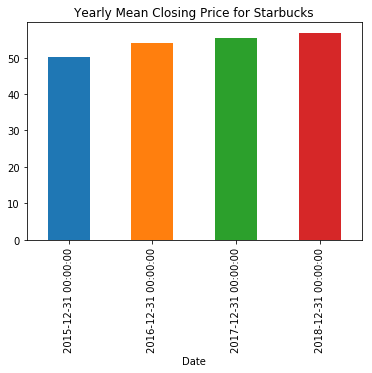

In [ ]:
df['Close'].resample('A').mean().plot.bar(title='Yearly Mean Closing Price for Starbucks');

Pandas treats each sample as its own trace, and by default assigns different colors to each one. If you want, you can pass a <strong>color</strong> argument to assign your own color collection, or to set a uniform color. For example, <tt>color='#1f77b4'</tt> sets a uniform "steel blue" color.

Also, the above code can be broken into two lines for improved readability.

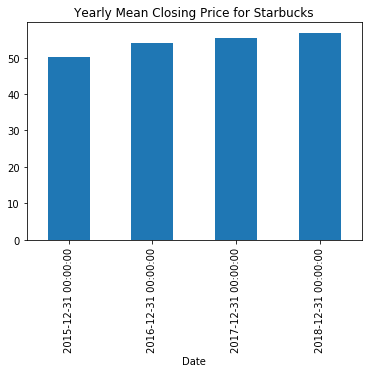

In [ ]:
title = 'Yearly Mean Closing Price for Starbucks'
df['Close'].resample('A').mean().plot.bar(title=title,color=['#1f77b4']);

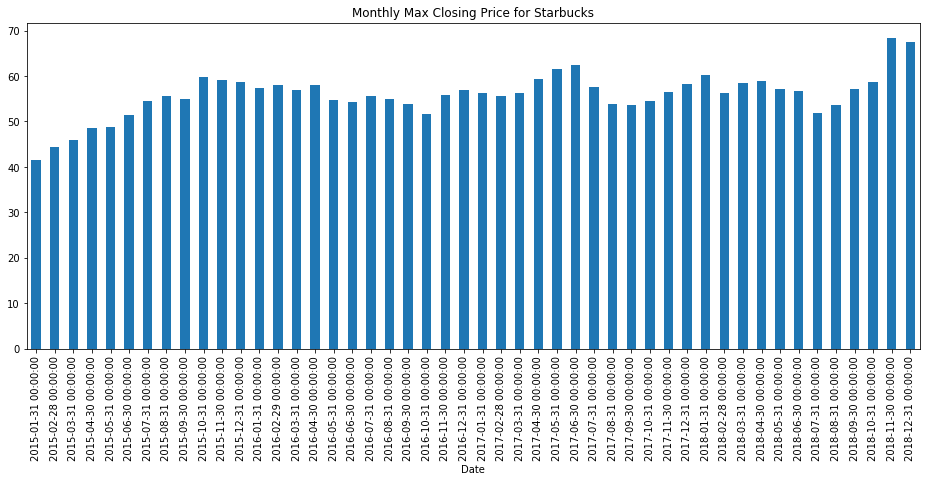

In [ ]:
title = 'Monthly Max Closing Price for Starbucks'
df['Close'].resample('M').max().plot.bar(figsize=(16,6), title=title,color='#1f77b4');

# Time Shifting

Sometimes you may need to shift all your data up or down along the time series index. In fact, a lot of pandas built-in methods do this under the hood. This isn't something we'll do often in the template, but it's definitely good to know about this anyways!

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('../Data/starbucks.csv',index_col='Date',parse_dates=True)

In [ ]:
df.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

In [ ]:
df.tail()

Close    Volume
Date                       
2018-12-24  60.56   6323252
2018-12-26  63.08  16646238
2018-12-27  63.20  11308081
2018-12-28  63.39   7712127
2018-12-31  64.40   7690183

## .shift() forward
This method shifts the entire date index a given number of rows, without regard for time periods (months & years).<br>It returns a modified copy of the original DataFrame.

In [ ]:
df.shift(1).head()

Close      Volume
Date                           
2015-01-02      NaN         NaN
2015-01-05  38.0061   6906098.0
2015-01-06  37.2781  11623796.0
2015-01-07  36.9748   7664340.0
2015-01-08  37.8848   9732554.0

In [ ]:
# NOTE: You will lose that last piece of data that no longer has an index!
df.shift(1).tail()

Close      Volume
Date                         
2018-12-24  61.39  23524888.0
2018-12-26  60.56   6323252.0
2018-12-27  63.08  16646238.0
2018-12-28  63.20  11308081.0
2018-12-31  63.39   7712127.0

## .shift() backwards

In [ ]:
df.shift(-1).head()

Close      Volume
Date                           
2015-01-02  37.2781  11623796.0
2015-01-05  36.9748   7664340.0
2015-01-06  37.8848   9732554.0
2015-01-07  38.4961  13170548.0
2015-01-08  37.2361  27556706.0

In [ ]:
df.shift(-1).tail()

Close      Volume
Date                         
2018-12-24  63.08  16646238.0
2018-12-26  63.20  11308081.0
2018-12-27  63.39   7712127.0
2018-12-28  64.40   7690183.0
2018-12-31    NaN         NaN

## Shifting based on Time Series Frequency Code

We can choose to shift <em>index values</em> up or down without realigning the data by passing in a <strong>freq</strong> argument.<br>
This method shifts dates to the next period based on a frequency code. Common codes are 'M' for month-end and 'A' for year-end. <br>Refer to the <em>Time Series Offset Aliases</em> table from the Time Resampling lecture for a full list of values, or click <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.<br>

In [ ]:
# Shift everything forward one month
df.shift(periods=1, freq='M').head()

Close    Volume
Date                         
2015-01-31  38.0061   6906098
2015-01-31  37.2781  11623796
2015-01-31  36.9748   7664340
2015-01-31  37.8848   9732554
2015-01-31  38.4961  13170548

For more info on time shifting visit http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html<br>

# Rolling and Expanding

A common process with time series is to create data based off of a rolling mean. The idea is to divide the data into "windows" of time, and then calculate an aggregate function for each window. In this way we obtain a <em>simple moving average</em>. Let's show how to do this easily with pandas!

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
# Import the data:
df = pd.read_csv('../Data/starbucks.csv', index_col='Date', parse_dates=True)

In [ ]:
df.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

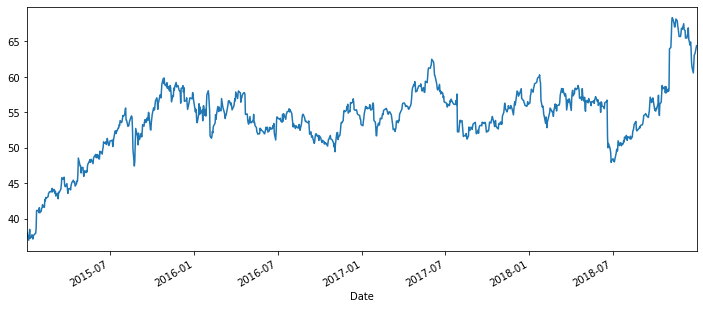

In [ ]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

Now let's add in a rolling mean! This rolling method provides row entries, where every entry is then representative of the window. 

In [ ]:
# 7 day rolling mean
df.rolling(window=7).mean().head(15)

Close        Volume
Date                               
2015-01-02        NaN           NaN
2015-01-05        NaN           NaN
2015-01-06        NaN           NaN
2015-01-07        NaN           NaN
2015-01-08        NaN           NaN
2015-01-09        NaN           NaN
2015-01-12  37.616786  1.238222e+07
2015-01-13  37.578786  1.297288e+07
2015-01-14  37.614786  1.264020e+07
2015-01-15  37.638114  1.270624e+07
2015-01-16  37.600114  1.260380e+07
2015-01-20  37.515786  1.225634e+07
2015-01-21  37.615786  9.868837e+06
2015-01-22  37.783114  1.185335e+07
2015-01-23  38.273129  1.571999e+07

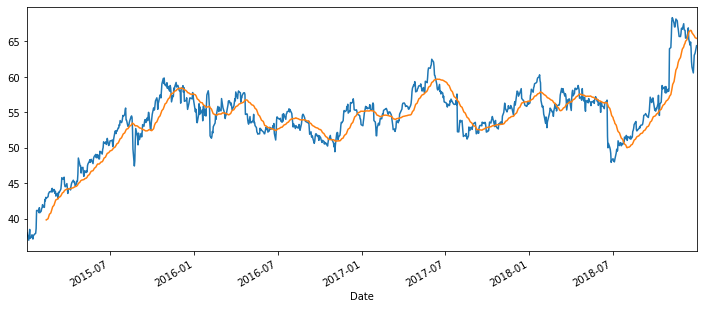

In [ ]:
df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)
df.rolling(window=30).mean()['Close'].plot();

The easiest way to add a legend is to make the rolling value a new column, then pandas does it automatically!

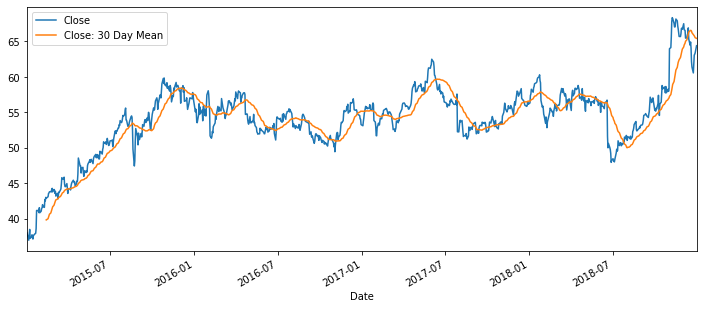

In [ ]:
df['Close: 30 Day Mean'] = df['Close'].rolling(window=30).mean()
df[['Close','Close: 30 Day Mean']].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

## Expanding

Instead of calculating values for a rolling window of dates, what if you wanted to take into account everything from the start of the time series up to each point in time? For example, instead of considering the average over the last 7 days, we would consider all prior data in our expanding set of averages.

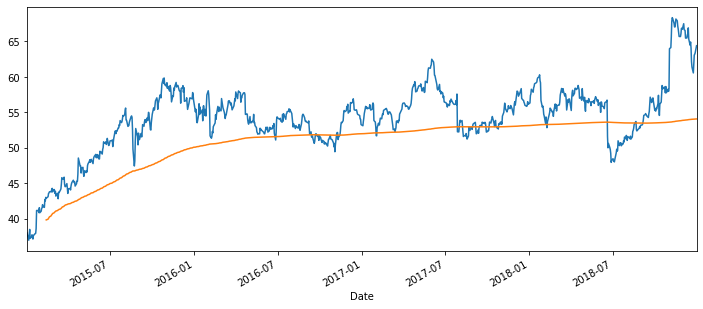

In [ ]:
 df['Close'].plot(figsize=(12,5)).autoscale(axis='x',tight=True)

# Optional: specify a minimum number of periods to start from
df['Close'].expanding(min_periods=30).mean().plot(figsize=(12,5));

That's it! It doesn't help much to visualize an expanding operation against the daily data, since all it really gives us is a picture of the "stability" or "volatility" of a stock. However, if you don't want to see it, simply comment the first plot line above and rerun the cell.


# Visualizing Time Series Data

Let's go through a few key points of creating nice time series visualizations!

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
df = pd.read_csv('../Data/starbucks.csv',index_col='Date',parse_dates=True)

In [ ]:
df.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

In [ ]:
# To show that dates are already parsed
df.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1006, freq=None)

First we'll create a line plot that puts both <tt>'Close'</tt> and <tt>'Volume'</tt> on the same graph.<br>Remember that we can use <tt>df.plot()</tt> in place of <tt>df.plot.line()</tt>

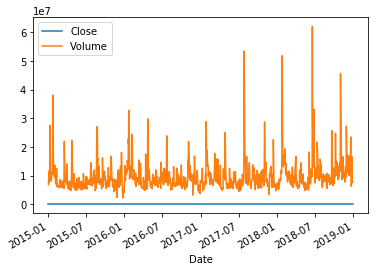

In [ ]:
df.plot();

This isn't very helpful due to the difference in y-values, so we'll split them up.

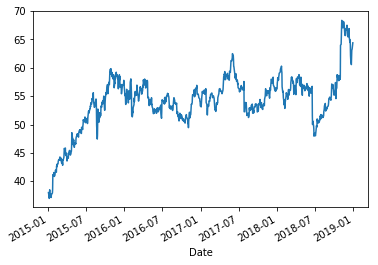

In [ ]:
df['Close'].plot();

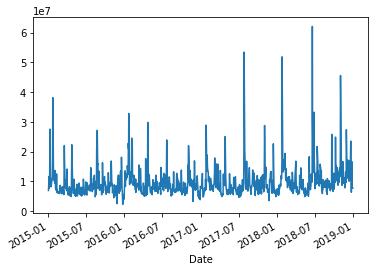

In [ ]:
df['Volume'].plot();

# Plot Formatting

## Adding a title and axis labels

<div class="alert alert-info"><strong>NOTE:</strong> While we <em>can</em> pass a title into the pandas <tt>.plot()</tt> function, we can't pass x- and y-axis labels.<br>However, since <tt>.plot()</tt> returns a <tt>matplotlib.axes.AxesSubplot</tt> object, we can set the labels<br>on that object so long as we do it in the same jupyter cell. Setting an <tt>autoscale</tt> is done the same way.</div>

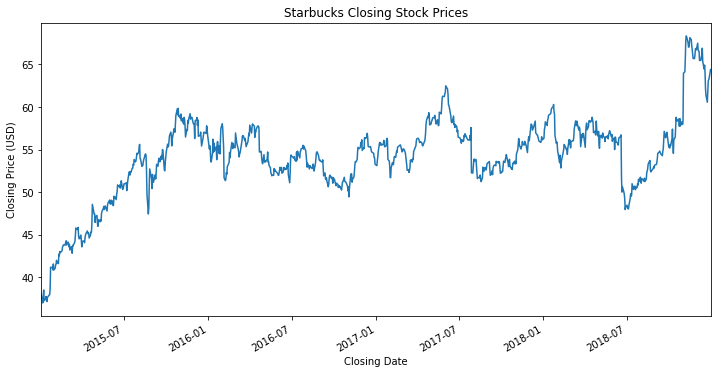

In [ ]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## X Limits
There are two ways we can set a specific span of time as an x-axis limit. We can plot a slice of the dataset, or we can pass x-limit values as an argument into <tt>df.plot()</tt>.

The advantage of using a slice is that pandas automatically adjusts the y-limits accordingly.

The advantage of passing in arguments is that pandas automatically tightens the x-axis. Plus, if we're also setting y-limits this can improve readability.

### Choosing X Limits by Slice:

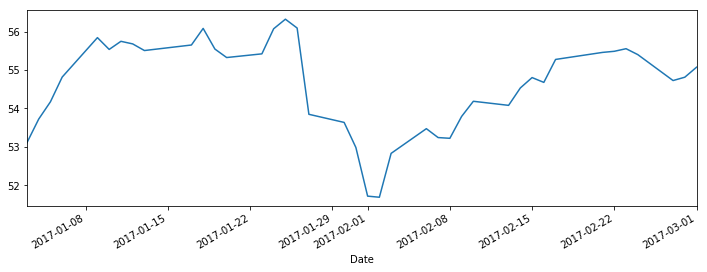

In [ ]:
# Dates are separated by a colon:
df['Close']['2017-01-01':'2017-03-01'].plot(figsize=(12,4)).autoscale(axis='x',tight=True);

### Choosing X Limits by Argument:

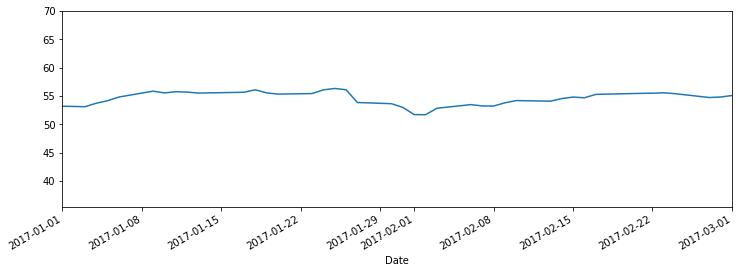

In [ ]:
# Dates are separated by a comma:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01']);

<div class="alert alert-info"><strong>NOTE:</strong> It's worth noting that the limit values do <em>not</em> have to appear in the index. Pandas will plot the actual dates based on their location in time.<br><br>Also, another advantage of slicing over arguments is that it's easier to include the upper/lower bound as a limit.<br>That is, <tt><font color=black>df['column']['2017-01-01':].plot()</font></tt> is easier to type than <tt><font color=black>df['column'].plot(xlim=('2017-01-01',df.index.max()))</font></tt></div>

Now let's focus on the y-axis limits to get a better sense of the shape of the data.<br>First we'll find out what upper and lower limits to use.

In [ ]:
# FIND THE MINIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].min()

51.6899

In [ ]:
# FIND THE MAXIMUM VALUE IN THE RANGE:
df.loc['2017-01-01':'2017-03-01']['Close'].max()

56.3244

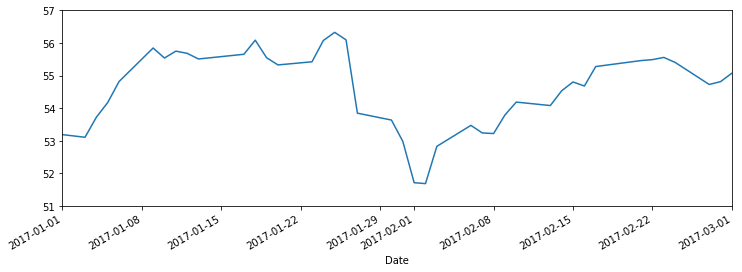

In [ ]:
# PLUG THESE IN AS Y-LIMIT VALUES:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[51,57]);

<div class="alert alert-info"><strong>NOTE:</strong> Be careful when setting y-axis limits! Setting too narrow a slice can make graphs appear overly volatile. The above chart might lead you to believe that stocks were many times more valuable in January 2017 than in early February, but a look at them with the y-axis minimum set to zero tells a different story:</div>

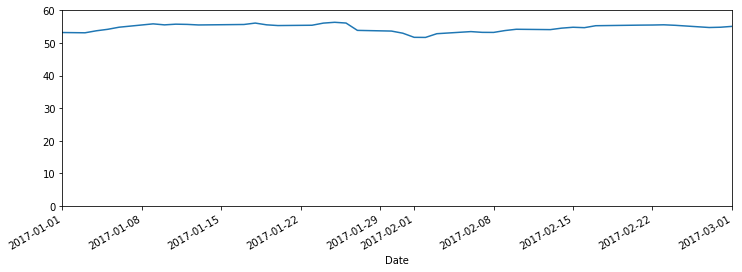

In [ ]:
df['Close'].plot(figsize=(12,4),xlim=['2017-01-01','2017-03-01'],ylim=[0,60]);

## Title and axis labels
Let's add a title and axis labels to our subplot.
<div class="alert alert-info"><strong>REMEMBER:</strong> <tt><font color=black>ax.autoscale(axis='both',tight=True)</font></tt> is unnecessary if axis limits have been passed into <tt>.plot()</tt>.<br>
If we were to add it, autoscale would revert the axis limits to the full dataset.</div>

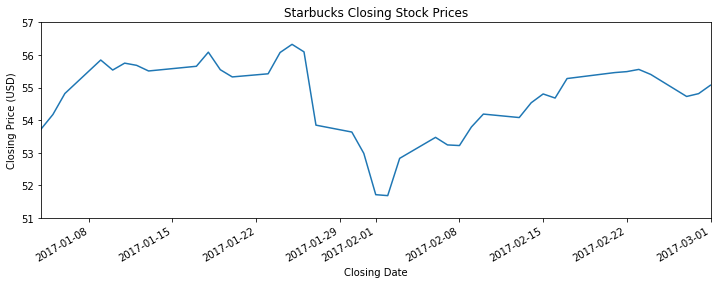

In [ ]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df['Close'].plot(xlim=['2017-01-04','2017-03-01'],ylim=[51,57],figsize=(12,4),title=title)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Color and Style
We can pass arguments into <tt>.plot()</tt> to change the linestyle and color. Refer to the Customizing Plots lecture from the previous section for more options.

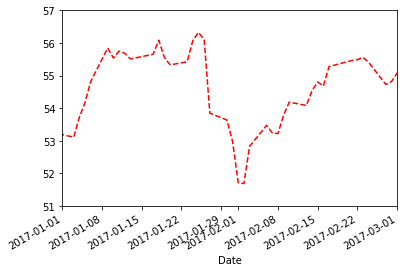

In [ ]:
df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],ls='--',c='r');

## X Ticks
In this section we'll look at how to change the format and appearance of dates along the x-axis. To do this, we'll borrow a tool from <tt>matplotlib</tt> called <tt>dates</tt>.

In [ ]:
from matplotlib import dates

### Set the spacing
The x-axis values can be divided into major and minor axes. For now, we'll work only with the major axis and learn how to set the spacing with <tt>.set_major_locator()</tt>.

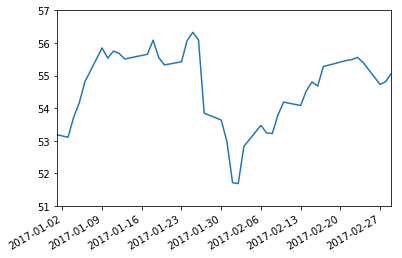

In [ ]:
# CREATE OUR AXIS OBJECT
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57])

# REMOVE PANDAS DEFAULT "Date" LABEL
ax.set(xlabel='')

# SET THE TICK LOCATOR AND FORMATTER FOR THE MAJOR AXIS
ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

Notice that dates are spaced one week apart. The dates themselves correspond with <tt>byweekday=0</tt>, or Mondays.<br>
For a full list of locator options available from <tt>matplotlib.dates</tt> visit <a href='https://matplotlib.org/api/dates_api.html#date-tickers'>https://matplotlib.org/api/dates_api.html#date-tickers</a>

### Date Formatting
Formatting follows the Python datetime <strong><a href='http://strftime.org/'>strftime</a></strong> codes.<br>
The following examples are based on <tt>datetime.datetime(2001, 2, 3, 16, 5, 6)</tt>:
<br><br>

<table style="display: inline-block">  
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%Y</td><td>Year with century as a decimal number.</td><td>2001</td></tr>
<tr><td>%y</td><td>Year without century as a zero-padded decimal number.</td><td>01</td></tr>
<tr><td>%m</td><td>Month as a zero-padded decimal number.</td><td>02</td></tr>
<tr><td>%B</td><td>Month as locale’s full name.</td><td>February</td></tr>
<tr><td>%b</td><td>Month as locale’s abbreviated name.</td><td>Feb</td></tr>
<tr><td>%d</td><td>Day of the month as a zero-padded decimal number.</td><td>03</td></tr>  
<tr><td>%A</td><td>Weekday as locale’s full name.</td><td>Saturday</td></tr>
<tr><td>%a</td><td>Weekday as locale’s abbreviated name.</td><td>Sat</td></tr>
<tr><td>%H</td><td>Hour (24-hour clock) as a zero-padded decimal number.</td><td>16</td></tr>
<tr><td>%I</td><td>Hour (12-hour clock) as a zero-padded decimal number.</td><td>04</td></tr>
<tr><td>%p</td><td>Locale’s equivalent of either AM or PM.</td><td>PM</td></tr>
<tr><td>%M</td><td>Minute as a zero-padded decimal number.</td><td>05</td></tr>
<tr><td>%S</td><td>Second as a zero-padded decimal number.</td><td>06</td></tr>
</table>
<table style="display: inline-block">
<tr><th>CODE</th><th>MEANING</th><th>EXAMPLE</th><tr>
<tr><td>%#m</td><td>Month as a decimal number. (Windows)</td><td>2</td></tr>
<tr><td>%-m</td><td>Month as a decimal number. (Mac/Linux)</td><td>2</td></tr>
<tr><td>%#x</td><td>Long date</td><td>Saturday, February 03, 2001</td></tr>
<tr><td>%#c</td><td>Long date and time</td><td>Saturday, February 03, 2001 16:05:06</td></tr>
</table>  
    

In [ ]:
# USE THIS SPACE TO EXPERIMENT WITH DIFFERENT FORMATS
from datetime import datetime
datetime(2001, 2, 3, 16, 5, 6).strftime("%A, %B %d, %Y  %I:%M:%S %p")

'Saturday, February 03, 2001  04:05:06 PM'

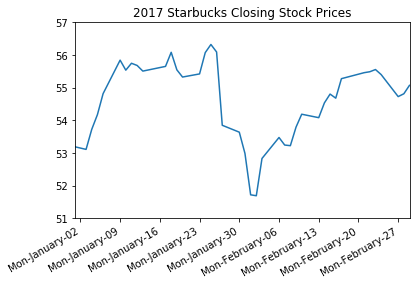

In [ ]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter("%a-%B-%d"))

## Major vs. Minor Axis Values
All of the tick marks we've used so far have belonged to the major axis. We can assign another level called the <em>minor axis</em>, perhaps to separate month names from days of the month.

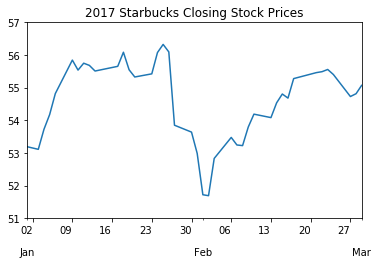

In [ ]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

<font color=green><strong>NOTE: </strong>we passed a rotation argument <font color=black><strong>rot=0</strong></font> into <tt><font color=black>df.plot()</font></tt> so that the major axis values appear horizontal, not slanted.

## Adding Gridlines
We can add x and y axis gridlines that extend into the plot from each major tick mark.

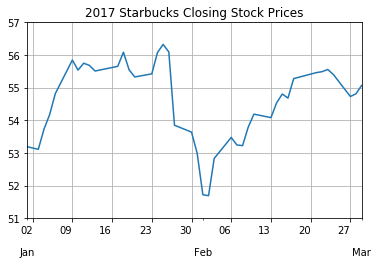

In [ ]:
ax = df['Close'].plot(xlim=['2017-01-01','2017-03-01'],ylim=[51,57],rot=0,title='2017 Starbucks Closing Stock Prices')
ax.set(xlabel='')

ax.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d'))

ax.xaxis.set_minor_locator(dates.MonthLocator())
ax.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

ax.yaxis.grid(True)
ax.xaxis.grid(True)

# Introduction to Statsmodels

Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration. An extensive list of result statistics are available for each estimator. The results are tested against existing statistical packages to ensure that they are correct. The package is released under the open source Modified BSD (3-clause) license. The online documentation is hosted at <a href='https://www.statsmodels.org/stable/index.html'>statsmodels.org</a>. The statsmodels version used in the development of this template is 0.9.0.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='http://www.statsmodels.org/stable/tsa.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis</font></div>

Let's walk through a very simple example of using statsmodels!

### Perform standard imports and load the dataset
For these exercises we'll be using a statsmodels built-in macroeconomics dataset:

<pre><strong>US Macroeconomic Data for 1959Q1 - 2009Q3</strong>
Number of Observations - 203
Number of Variables - 14
Variable name definitions:
    year      - 1959q1 - 2009q3
    quarter   - 1-4
    realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                seasonally adjusted annual rate)
    realcons  - Real personal consumption expenditures (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realinv   - Real gross private domestic investment (Bil. of chained
                2005 US$, seasonally adjusted annual rate)
    realgovt  - Real federal consumption expenditures & gross investment
                (Bil. of chained 2005 US$, seasonally adjusted annual rate)
    realdpi   - Real private disposable income (Bil. of chained 2005
                US$, seasonally adjusted annual rate)
    cpi       - End of the quarter consumer price index for all urban
                consumers: all items (1982-84 = 100, seasonally adjusted).
    m1        - End of the quarter M1 nominal money stock (Seasonally
                adjusted)
    tbilrate  - Quarterly monthly average of the monthly 3-month
                treasury bill: secondary market rate
    unemp     - Seasonally adjusted unemployment rate (%)
    pop       - End of the quarter total population: all ages incl. armed
                forces over seas
    infl      - Inflation rate (ln(cpi_{t}/cpi_{t-1}) * 400)
    realint   - Real interest rate (tbilrate - infl)</pre>
    
<div class="alert alert-info"><strong>NOTE:</strong> you can also build this DataFrame with the following code:<br>
<tt>&nbsp;&nbsp;&nbsp;&nbsp;import pandas as pd<br>
&nbsp;&nbsp;&nbsp;&nbsp;import statsmodels.api as sm<br>
&nbsp;&nbsp;&nbsp;&nbsp;df = sm.datasets.macrodata.load_pandas().data<br>
&nbsp;&nbsp;&nbsp;&nbsp;df.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))<br>
&nbsp;&nbsp;&nbsp;&nbsp;print(sm.datasets.macrodata.NOTE)</tt></div>

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

df = pd.read_csv('../Data/macrodata.csv',index_col=0,parse_dates=True)
df.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959-03-31  1959        1  2710.349    1707.4  286.898   470.045   1886.9   
1959-06-30  1959        2  2778.801    1733.7  310.859   481.301   1919.7   
1959-09-30  1959        3  2775.488    1751.8  289.226   491.260   1916.4   
1959-12-31  1959        4  2785.204    1753.7  299.356   484.052   1931.3   
1960-03-31  1960        1  2847.699    1770.5  331.722   462.199   1955.5   

              cpi     m1  tbilrate  unemp      pop  infl  realint  
1959-03-31  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959-06-30  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959-09-30  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959-12-31  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960-03-31  29.54  139.6      3.50    5.2  180.007  2.31     1.19

### Plot the dataset

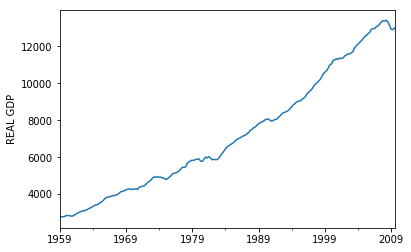

In [ ]:
ax = df['realgdp'].plot()
ax.autoscale(axis='x',tight=True)
ax.set(ylabel='REAL GDP');

## Using Statsmodels to get the trend
<div class="alert alert-info"><h3>Related Function:</h3>
<tt><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html'><strong>statsmodels.tsa.filters.hp_filter.hpfilter</strong></a><font color=black>(X, lamb=1600)</font>&nbsp;&nbsp;Hodrick-Prescott filter</div>
    
The <a href='https://en.wikipedia.org/wiki/Hodrick%E2%80%93Prescott_filter'>Hodrick-Prescott filter</a> separates a time-series  $y_t$ into a trend component $\tau_t$ and a cyclical component $c_t$

$y_t = \tau_t + c_t$

The components are determined by minimizing the following quadratic loss function, where $\lambda$ is a smoothing parameter:

$\min_{\\{ \tau_{t}\\} }\sum_{t=1}^{T}c_{t}^{2}+\lambda\sum_{t=1}^{T}\left[\left(\tau_{t}-\tau_{t-1}\right)-\left(\tau_{t-1}-\tau_{t-2}\right)\right]^{2}$


The $\lambda$ value above handles variations in the growth rate of the trend component.<br>When analyzing quarterly data, the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data.

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

# Tuple unpacking
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb=1600)

In [ ]:
gdp_cycle

1959-03-31     39.511915
1959-06-30     80.088532
1959-09-30     48.875455
1959-12-31     30.591933
1960-03-31     64.882667
1960-06-30     23.040242
1960-09-30     -1.355312
1960-12-31    -67.462365
1961-03-31    -81.367438
1961-06-30    -60.167890
1961-09-30    -46.369224
1961-12-31    -20.695339
1962-03-31     -2.162153
1962-06-30     -4.718648
1962-09-30    -13.556457
1962-12-31    -44.369262
1963-03-31    -43.320274
1963-06-30    -44.546971
1963-09-30    -26.298758
1963-12-31    -44.261196
1964-03-31    -14.434412
1964-06-30    -20.266867
1964-09-30    -19.137001
1964-12-31    -54.824590
1965-03-31    -15.962445
1965-06-30    -13.740115
1965-09-30     13.254828
1965-12-31     56.030402
1966-03-31    103.074337
1966-06-30     72.175348
                 ...    
2002-06-30    -95.260035
2002-09-30   -114.798768
2002-12-31   -190.025905
2003-03-31   -221.225647
2003-06-30   -207.139428
2003-09-30    -89.685415
2003-12-31    -61.895316
2004-03-31    -56.628782
2004-06-30    -49.616781


We see from these numbers that for the period from <strong>1960-09-30</strong> to <strong>1965-06-30</strong> actual values fall below the trendline.

In [ ]:
type(gdp_cycle)

pandas.core.series.Series

In [ ]:
df['trend'] = gdp_trend

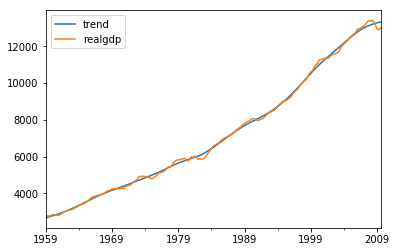

In [ ]:
df[['trend','realgdp']].plot().autoscale(axis='x',tight=True);

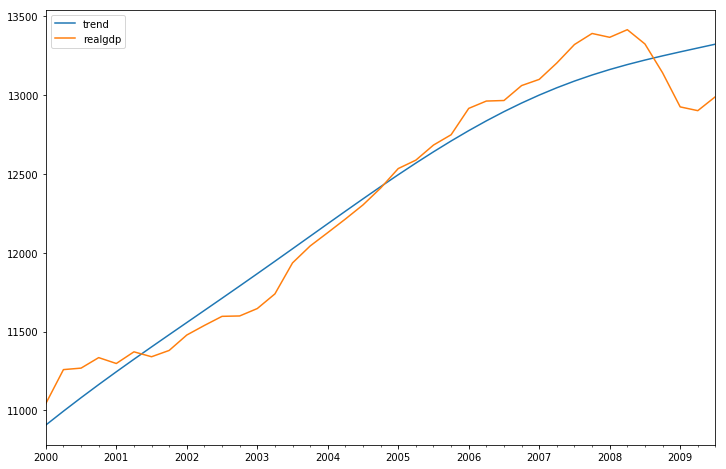

In [ ]:
df[['trend','realgdp']]['2000-03-31':].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## ETS

## Error/Trend/Seasonality Models
As we begin working with <em>endogenous</em> data ("endog" for short) and start to develop forecasting models, it helps to identify and isolate factors working within the system that influence behavior. Here the name "endogenous" considers internal factors, while "exogenous" would relate to external forces. These fall under the category of <em>state space models</em>, and include <em>decomposition</em> (described below), and <em>exponential smoothing</em> (described in an upcoming section).

The <a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>decomposition</a> of a time series attempts to isolate individual components such as <em>error</em>, <em>trend</em>, and <em>seasonality</em> (ETS). We've already seen a simplistic example of this in the <strong>Introduction to Statsmodels</strong> section with the Hodrick-Prescott filter. There we separated data into a trendline and a cyclical feature that mapped observed data back to the trend.

<div class="alert alert-info"><h3>Related Function:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.seasonal.seasonal_decompose.html'>statsmodels.tsa.seasonal.seasonal_decompose</a></strong><font color=black>(x, model)</font>&nbsp;&nbsp;
Seasonal decomposition using moving averages</tt>
<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/ets.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Innovations state space models for exponential smoothing</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Decomposition_of_time_series'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Decomposition of time series</font></div>

## Seasonal Decomposition
Statsmodels provides a <em>seasonal decomposition</em> tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.


We apply an <strong>additive</strong> model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).<br>
A <strong>multiplicative</strong> model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline.dropna(inplace=True)

In [ ]:
airline.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

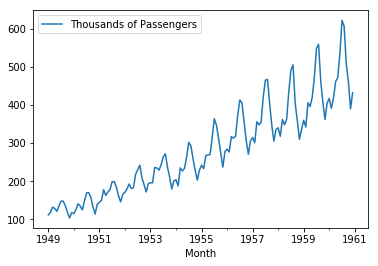

In [ ]:
airline.plot();

Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

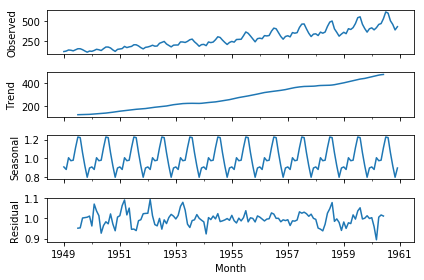

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative')  # model='mul' also works
result.plot();

# MA
## Moving Averages
In this section we'll compare <em>Simple Moving Averages</em> to <em>Exponentially Weighted Moving Averages</em> in terms of complexity and performance.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html'>pandas.DataFrame.rolling</a></strong><font color=black>(window)</font>&nbsp;&nbsp;
Provides rolling window calculations<br>
<strong><a href='https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html'>pandas.DataFrame.ewm</a></strong><font color=black>(span)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
Provides exponential weighted functions</tt></div></div>

### Perform standard imports and load the dataset
For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
airline = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
airline.dropna(inplace=True)

In [ ]:
airline.head() 

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

___
# SMA
## Simple Moving Average

We've already shown how to create a <a href='https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average'>simple moving average</a> by applying a <tt>mean</tt> function to a rolling window.

For a quick review:

In [ ]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [ ]:
airline.head(15)

Thousands of Passengers  6-month-SMA  12-month-SMA
Month                                                         
1949-01-01                      112          NaN           NaN
1949-02-01                      118          NaN           NaN
1949-03-01                      132          NaN           NaN
1949-04-01                      129          NaN           NaN
1949-05-01                      121          NaN           NaN
1949-06-01                      135   124.500000           NaN
1949-07-01                      148   130.500000           NaN
1949-08-01                      148   135.500000           NaN
1949-09-01                      136   136.166667           NaN
1949-10-01                      119   134.500000           NaN
1949-11-01                      104   131.666667           NaN
1949-12-01                      118   128.833333    126.666667
1950-01-01                      115   123.333333    126.916667
1950-02-01                      126   119.666667    127.583333
1950-03-01                      141   120.500000    128.333333

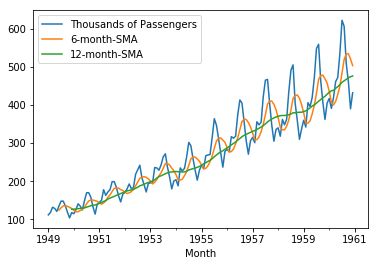

In [ ]:
airline.plot();

___
# EWMA
## Exponentially Weighted Moving Average 

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:
* Smaller windows will lead to more noise, rather than signal
* It will always lag by the size of the window
* It will never reach to full peak or valley of the data due to the averaging.
* Does not really inform you about possible future behavior, all it really does is describe trends in your data.
* Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an <a href='https://en.wikipedia.org/wiki/Exponential_smoothing'>EWMA (Exponentially weighted moving average)</a>.

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name). The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.
[Full details on Mathematics behind this can be found here](http://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html#exponentially-weighted-windows).
Here is the shorter version of the explanation behind EWMA.

The formula for EWMA is:
### $y_t =   \frac{\sum\limits_{i=0}^t w_i x_{t-i}}{\sum\limits_{i=0}^t w_i}$

Where $x_t$ is the input value, $w_i$ is the applied weight (Note how it can change from $i=0$ to $t$), and $y_t$ is the output.

Now the question is, how to we define the weight term $w_i$?

This depends on the <tt>adjust</tt> parameter you provide to the <tt>.ewm()</tt> method.

When <tt>adjust=True</tt> (default) is used, weighted averages are calculated using weights equal to $w_i = (1 - \alpha)^i$

which gives

### $y_t = \frac{x_t + (1 - \alpha)x_{t-1} + (1 - \alpha)^2 x_{t-2} + ...
+ (1 - \alpha)^t x_{0}}{1 + (1 - \alpha) + (1 - \alpha)^2 + ...
+ (1 - \alpha)^t}$

When <tt>adjust=False</tt> is specified, moving averages are calculated as:

### $\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

which is equivalent to using weights:

 \begin{split}w_i = \begin{cases}
    \alpha (1 - \alpha)^i & \text{if } i < t \\
    (1 - \alpha)^i        & \text{if } i = t.
\end{cases}\end{split}

When <tt>adjust=True</tt> we have $y_0=x_0$ and from the last representation above we have 
$y_t=\alpha x_t+(1−α)y_{t−1}$, therefore there is an assumption that $x_0$ is not an ordinary value but rather an exponentially weighted moment of the infinite series up to that point.

For the smoothing factor $\alpha$ one must have $0<\alpha≤1$, and while it is possible to pass <em>alpha</em> directly, it’s often easier to think about either the <em>span</em>, <em>center of mass</em> (com) or <em>half-life</em> of an EW moment:

\begin{split}\alpha =
 \begin{cases}
     \frac{2}{s + 1},               & \text{for span}\ s \geq 1\\
     \frac{1}{1 + c},               & \text{for center of mass}\ c \geq 0\\
     1 - \exp^{\frac{\log 0.5}{h}}, & \text{for half-life}\ h > 0
 \end{cases}\end{split}

* <strong>Span</strong> corresponds to what is commonly called an “N-day EW moving average”.
* <strong>Center of mass</strong> has a more physical interpretation and can be thought of in terms of span: $c=(s−1)/2$
* <strong>Half-life</strong> is the period of time for the exponential weight to reduce to one half.
* <strong>Alpha</strong> specifies the smoothing factor directly.

We have to pass precisely one of the above into the <tt>.ewm()</tt> function. For our data we'll use <tt>span=12</tt>.

In [ ]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

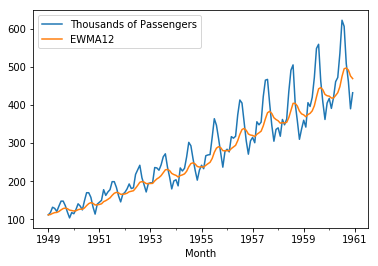

In [ ]:
airline[['Thousands of Passengers','EWMA12']].plot();

## Comparing SMA to EWMA

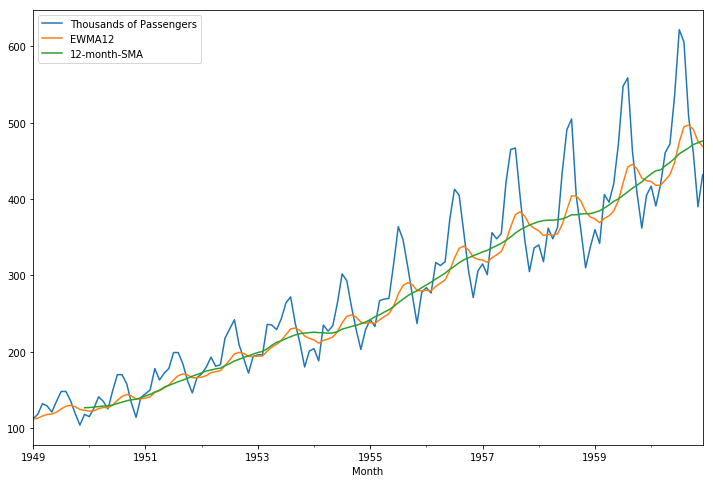

In [ ]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,8)).autoscale(axis='x',tight=True);

## Simple Exponential Smoothing
The above example employed <em>Simple Exponential Smoothing</em> with one smoothing factor <strong>α</strong>. Unfortunately, this technique does a poor job of forecasting when there is a trend in the data as seen above. In the next section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the Holt-Winters Methods.

# Holt-Winters Methods
In the previous section on <strong>Exponentially Weighted Moving Averages</strong> (EWMA) we applied <em>Simple Exponential Smoothing</em> using just one smoothing factor $\alpha$ (alpha). This failed to account for other contributing factors like trend and seasonality.

In this section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming sections.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.SimpleExpSmoothing.html'>statsmodels.tsa.holtwinters.SimpleExpSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;&nbsp;&nbsp;
Simple Exponential Smoothing<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.holtwinters.ExponentialSmoothing.html'>statsmodels.tsa.holtwinters.ExponentialSmoothing</a></strong><font color=black>(endog)</font>&nbsp;&nbsp;
    Holt-Winters Exponential Smoothing</tt>
    
<h3>For Further Reading:</h3>
<tt>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc43.htm'>NIST/SEMATECH e-Handbook of Statistical Methods</a></strong>&nbsp;&nbsp;<font color=black>What is Exponential Smoothing?</font></tt></div>

### Perform standard imports and load the dataset
For these examples we'll continue to use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [ ]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [ ]:
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

___
## Simple Exponential Smoothing

A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

span = 12
alpha = 2/(span+1)

df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()
df['SES12']=SimpleExpSmoothing(df['Thousands of Passengers']).fit(smoothing_level=alpha,optimized=False).fittedvalues.shift(-1)
df.head()

Thousands of Passengers      EWMA12       SES12
Month                                                      
1949-01-01                      112  112.000000  112.000000
1949-02-01                      118  112.923077  112.923077
1949-03-01                      132  115.857988  115.857988
1949-04-01                      129  117.879836  117.879836
1949-05-01                      121  118.359861  118.359861

<div class="alert alert-danger"><strong>NOTE:</strong> For some reason, when <tt>optimized=False</tt> is passed into <tt>.fit()</tt>, the statsmodels <tt>SimpleExpSmoothing</tt> function shifts fitted values down one row. We fix this by adding <tt>.shift(-1)</tt> after <tt>.fittedvalues</tt></div>

___
## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

df['DESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='add').fit().fittedvalues.shift(-1)
df.head()

Thousands of Passengers      EWMA12       SES12    DESadd12
Month                                                                  
1949-01-01                      112  112.000000  112.000000  114.336774
1949-02-01                      118  112.923077  112.923077  120.336774
1949-03-01                      132  115.857988  115.857988  134.336774
1949-04-01                      129  117.879836  117.879836  131.336774
1949-05-01                      121  118.359861  118.359861  123.336774

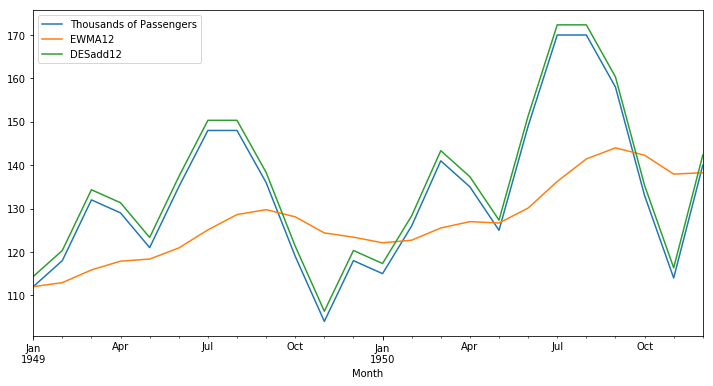

In [ ]:
df[['Thousands of Passengers','EWMA12','DESadd12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Here we can see that Double Exponential Smoothing is a much better representation of the time series data.<br>
Let's see if using a multiplicative seasonal adjustment helps.

In [ ]:
df['DESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul').fit().fittedvalues.shift(-1)
df.head()

Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.336774   
1949-02-01                      118  112.923077  112.923077  120.336774   
1949-03-01                      132  115.857988  115.857988  134.336774   
1949-04-01                      129  117.879836  117.879836  131.336774   
1949-05-01                      121  118.359861  118.359861  123.336774   

              DESmul12  
Month                   
1949-01-01  112.049247  
1949-02-01  118.051885  
1949-03-01  132.058041  
1949-04-01  129.056722  
1949-05-01  121.053204

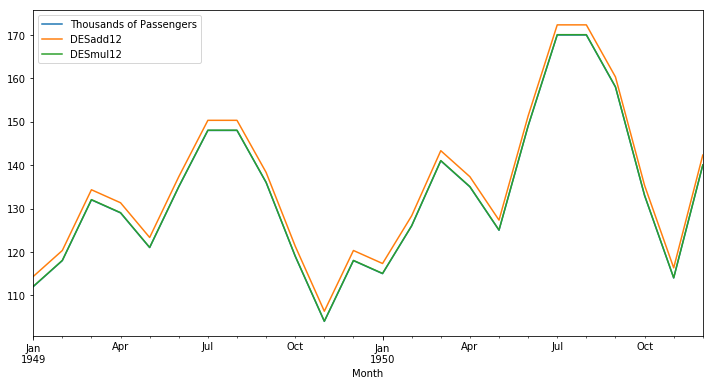

In [ ]:
df[['Thousands of Passengers','DESadd12','DESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Although minor, it does appear that a multiplicative adjustment gives better results. Note that the green line almost completely overlaps the original data.

___
## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 



In [ ]:
df['TESadd12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
df.head()

Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.336774   
1949-02-01                      118  112.923077  112.923077  120.336774   
1949-03-01                      132  115.857988  115.857988  134.336774   
1949-04-01                      129  117.879836  117.879836  131.336774   
1949-05-01                      121  118.359861  118.359861  123.336774   

              DESmul12    TESadd12  
Month                               
1949-01-01  112.049247  113.081280  
1949-02-01  118.051885  120.550730  
1949-03-01  132.058041  135.527373  
1949-04-01  129.056722  133.155127  
1949-05-01  121.053204  125.656203

In [ ]:
df['TESmul12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
df.head()

Thousands of Passengers      EWMA12       SES12    DESadd12  \
Month                                                                     
1949-01-01                      112  112.000000  112.000000  114.336774   
1949-02-01                      118  112.923077  112.923077  120.336774   
1949-03-01                      132  115.857988  115.857988  134.336774   
1949-04-01                      129  117.879836  117.879836  131.336774   
1949-05-01                      121  118.359861  118.359861  123.336774   

              DESmul12    TESadd12    TESmul12  
Month                                           
1949-01-01  112.049247  113.081280  111.753654  
1949-02-01  118.051885  120.550730  118.993207  
1949-03-01  132.058041  135.527373  133.458671  
1949-04-01  129.056722  133.155127  127.957617  
1949-05-01  121.053204  125.656203  121.027379

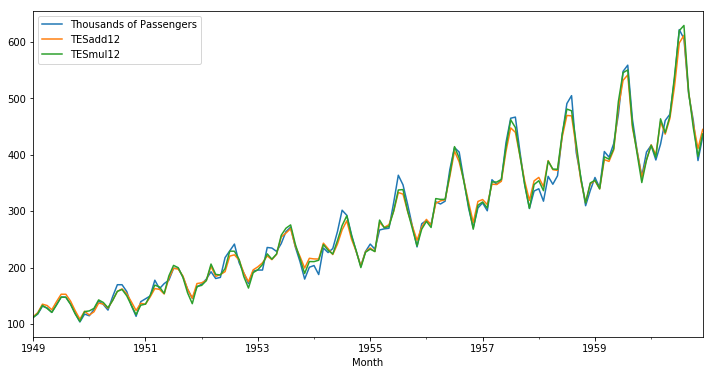

In [ ]:
df[['Thousands of Passengers','TESadd12','TESmul12']].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

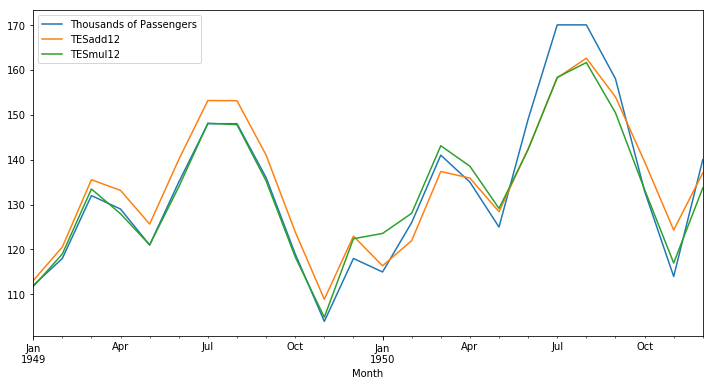

In [ ]:
df[['Thousands of Passengers','TESadd12','TESmul12']].iloc[:24].plot(figsize=(12,6)).autoscale(axis='x',tight=True);

Based on the plot above, you might think that Triple Exponential Smoothing does a poorer job of fitting than Double Exponential Smoothing. The key here is to consider what comes next - <em>forecasting</em>. We'll see that having the ability to predict fluctuating seasonal patterns greatly improves our forecast.


# Introduction to Forecasting
In the previous section we fit various smoothing models to existing data. The purpose behind this is to predict what happens next.<br>
What's our best guess for next month's value? For the next six months?

In this section we'll look to extend our models into the future. First we'll divide known data into training and testing sets, and evaluate the performance of a trained model on known test data.

* Goals
  * Compare a Holt-Winters forecasted model to known data
  * Understand <em>stationarity</em>, <em>differencing</em> and <em>lagging</em>
  * Introduce ARIMA and describe next steps

### <font color=blue>Simple Exponential Smoothing / Simple Moving Average</font>
This is the simplest to forecast. $\hat{y}$ is equal to the most recent value in the dataset, and the forecast plot is simply a horizontal line extending from the most recent value.
### <font color=blue>Double Exponential Smoothing / Holt's Method</font>
This model takes trend into account. Here the forecast plot is still a straight line extending from the most recent value, but it has slope.
### <font color=blue>Triple Exponential Smoothing / Holt-Winters Method</font>
This model has (so far) the "best" looking forecast plot, as it takes seasonality into account. When we expect regular fluctuations in the future, this model attempts to map the seasonal behavior.

## Forecasting with the Holt-Winters Method
For this example we'll use the same airline_passengers dataset, and we'll split the data into 108 training records and 36 testing records. Then we'll evaluate the performance of the model.

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

In [ ]:
df.tail()

Thousands of Passengers
Month                              
1960-08-01                      606
1960-09-01                      508
1960-10-01                      461
1960-11-01                      390
1960-12-01                      432

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
Thousands of Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


## Train Test Split

In [ ]:
train_data = df.iloc[:108] # Goes up to but not including 108
test_data = df.iloc[108:]

## Fitting the Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

## Evaluating Model against Test Set

In [ ]:
# YOU CAN SAFELY IGNORE WARNINGS HERE!
# THIS WILL NOT AFFECT YOUR FORECAST, IT'S JUST SOMETHING STATSMODELS NEEDS TO UPDATE UPON NEXT RELEASE.
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

In [ ]:
test_predictions

1958-01-01    348.204345
1958-02-01    341.572414
1958-03-01    397.790545
1958-04-01    388.670276
1958-05-01    391.783211
1958-06-01    451.357130
1958-07-01    502.150898
1958-08-01    498.397108
1958-09-01    439.422205
1958-10-01    383.519673
1958-11-01    336.907955
1958-12-01    381.282700
1959-01-01    392.159299
1959-02-01    384.690199
1959-03-01    448.004925
1959-04-01    437.733375
1959-05-01    441.239265
1959-06-01    508.333392
1959-07-01    565.539021
1959-08-01    561.311377
1959-09-01    494.891883
1959-10-01    431.932594
1959-11-01    379.436929
1959-12-01    429.413242
1960-01-01    441.662829
1960-02-01    433.250879
1960-03-01    504.558027
1960-04-01    492.989867
1960-05-01    496.938317
1960-06-01    572.501951
1960-07-01    636.928830
1960-08-01    632.167518
1960-09-01    557.363676
1960-10-01    486.456835
1960-11-01    427.334473
1960-12-01    483.619456
Freq: MS, Name: HW Forecast, dtype: float64

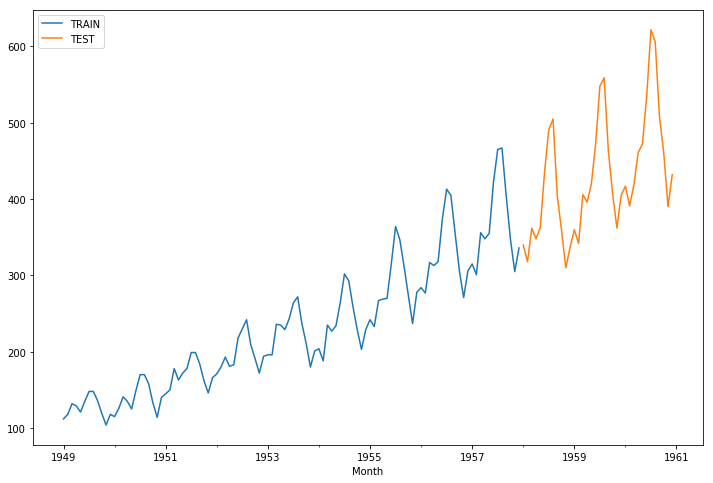

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8));

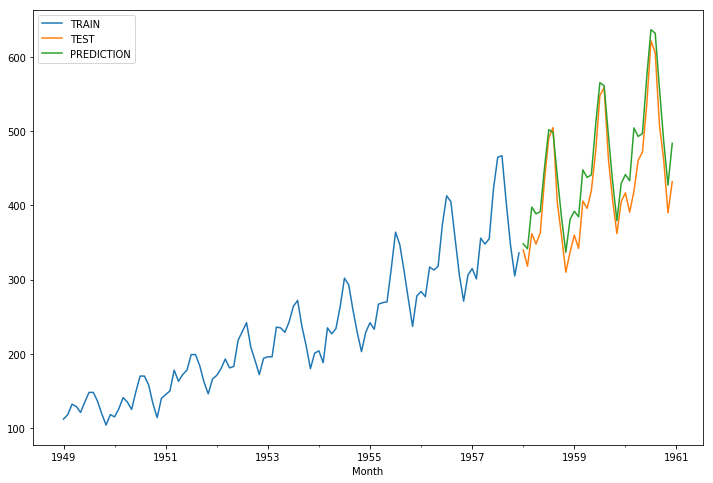

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION');

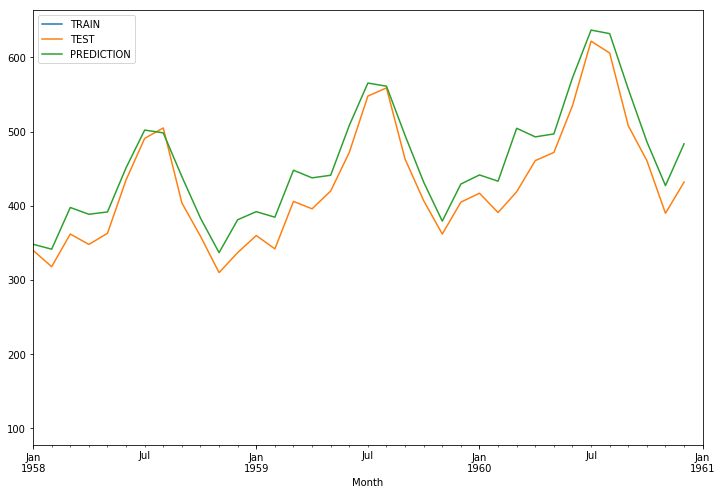

In [ ]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION',xlim=['1958-01-01','1961-01-01']);

## Evaluation Metrics

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
mean_absolute_error(test_data,test_predictions)

30.24228895401259

In [ ]:
mean_squared_error(test_data,test_predictions)

1143.4649378653387

In [ ]:
np.sqrt(mean_squared_error(test_data,test_predictions))

33.815158403670665

In [ ]:
test_data.describe()

Thousands of Passengers
count                36.000000
mean                428.500000
std                  79.329152
min                 310.000000
25%                 362.000000
50%                 412.000000
75%                 472.000000
max                 622.000000

## Forecasting into Future

In [ ]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [ ]:
forecast_predictions = final_model.forecast(36)

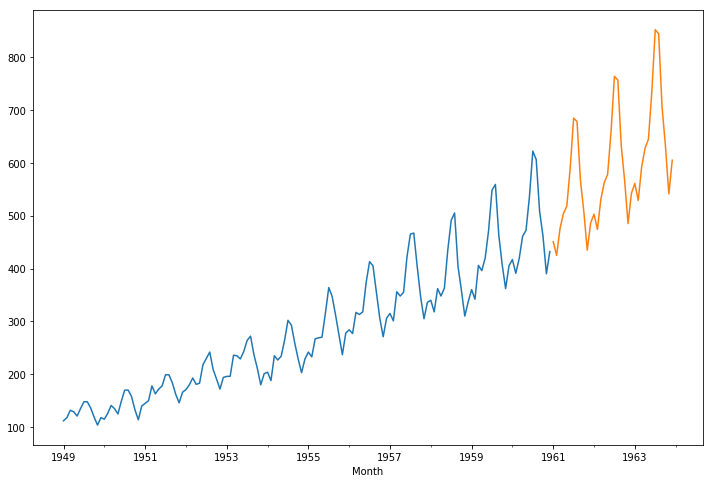

In [ ]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

# Stationarity
Time series data is said to be <em>stationary</em> if it does <em>not</em> exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.<br>
The file <tt>samples.csv</tt> contains made-up datasets that illustrate stationary and non-stationary data.

<div class="alert alert-info"><h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/stationarity.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Stationarity and differencing</font></div>

In [ ]:
df2 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)
df2.head()

a   b  c
1950-01-01  36  27  0
1950-02-01  58  22  3
1950-03-01  61  17  5
1950-04-01  37  15  8
1950-05-01  66  13  8

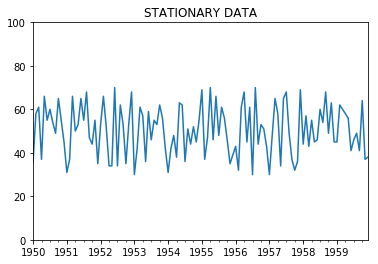

In [ ]:
df2['a'].plot(ylim=[0,100],title="STATIONARY DATA").autoscale(axis='x',tight=True);

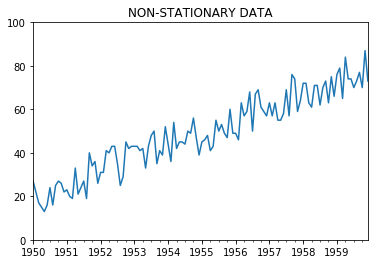

In [ ]:
df2['b'].plot(ylim=[0,100],title="NON-STATIONARY DATA").autoscale(axis='x',tight=True);

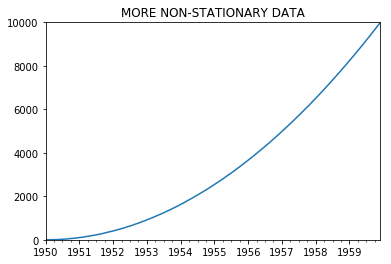

In [ ]:
df2['c'].plot(ylim=[0,10000],title="MORE NON-STATIONARY DATA").autoscale(axis='x',tight=True);

In an upcoming section we'll learn how to test for stationarity.

# Differencing
## First Order Differencing
Non-stationary data can be made to look stationary through <em>differencing</em>. A simple method called <em>first order differencing</em> calculates the difference between consecutive observations.

&nbsp;&nbsp;&nbsp;&nbsp;$y^{\prime}_t = y_t - y_{t-1}$

In this way a linear trend is transformed into a horizontal set of values.


In [ ]:
# Calculate the first difference of the non-stationary dataset "b"
df2['d1b'] = df2['b'] - df2['b'].shift(1)

df2[['b','d1b']].head()

b  d1b
1950-01-01  27  NaN
1950-02-01  22 -5.0
1950-03-01  17 -5.0
1950-04-01  15 -2.0
1950-05-01  13 -2.0

Notice that differencing eliminates one or more rows of data from the beginning of the series.

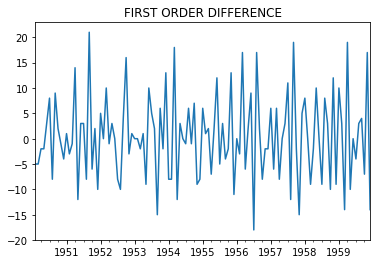

In [ ]:
df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

An easier way to perform differencing on a pandas Series or DataFrame is to use the built-in <tt>.diff()</tt> method:

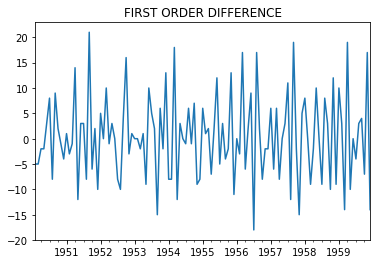

In [ ]:
df2['d1b'] = df2['b'].diff()

df2['d1b'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

### Forecasting on first order differenced data
When forecasting with first order differences, the predicted values have to be added back in to the original values in order to obtain an appropriate forecast.

Let's say that the next five forecasted values after applying some model to <tt>df['d1b']</tt> are <tt>[7,-2,5,-1,12]</tt>. We need to perform an <em>inverse transformation</em> to obtain values in the scale of the original time series.

In [ ]:
# For our example we need to build a forecast series from scratch
# First determine the most recent date in the training set, to know where the forecast set should start
df2[['b']].tail(3)

b
1959-10-01  70
1959-11-01  87
1959-12-01  73

In [ ]:
# Next set a DateTime index for the forecast set that extends 5 periods into the future
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

Fcast
1960-01-01      7
1960-02-01     -2
1960-03-01      5
1960-04-01     -1
1960-05-01     12

The idea behind an inverse transformation is to start with the most recent value from the training set, and to add a cumulative sum of Fcast values to build the new forecast set. For this we'll use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [ ]:
z['forecast']=df2['b'].iloc[-1] + z['Fcast'].cumsum()
z

Fcast  forecast
1960-01-01      7        80
1960-02-01     -2        78
1960-03-01      5        83
1960-04-01     -1        82
1960-05-01     12        94

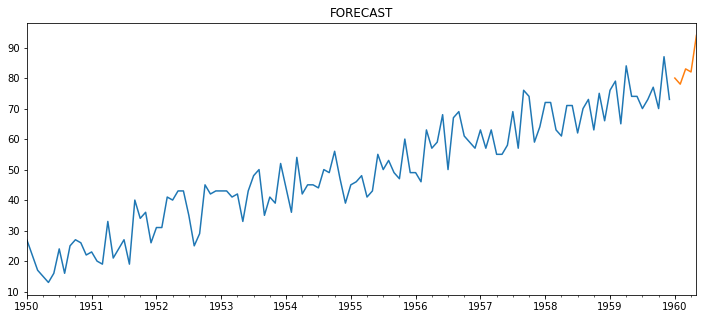

In [ ]:
df2['b'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

## Second order differencing
Sometimes the first difference is not enough to attain stationarity, particularly if the trend is not linear. We can difference the already differenced values again to obtain a second order set of values.

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_{t}^{\prime} - y_{t-1}^{\prime} \\
&= (y_t - y_{t-1}) - (y_{t-1} - y_{t-2}) \\
&= y_t - 2y_{t-1} + y_{t-2}\end{split}$

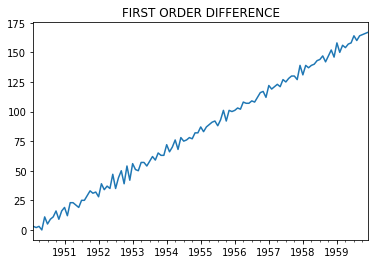

In [ ]:
# First we'll look at the first order difference of dataset "c"
df2['d1c'] = df2['c'].diff()

df2['d1c'].plot(title="FIRST ORDER DIFFERENCE").autoscale(axis='x',tight=True);

Now let's apply a second order difference to dataset "c".

In [ ]:
# We can do this from the original time series in one step
df2['d2c'] = df2['c'].diff().diff()

df2[['c','d1c','d2c']].head()

c  d1c  d2c
1950-01-01  0  NaN  NaN
1950-02-01  3  3.0  NaN
1950-03-01  5  2.0 -1.0
1950-04-01  8  3.0  1.0
1950-05-01  8  0.0 -3.0

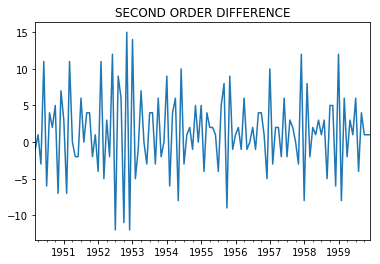

In [ ]:
df2['d2c'].plot(title="SECOND ORDER DIFFERENCE").autoscale(axis='x',tight=True);

<div class="alert alert-info"><strong>NOTE: </strong>This is different from <font color=black><tt>df2['c'].diff(2)</tt></font>, which would provide a first order difference spaced 2 lags apart.<br>
We'll use this technique later to address seasonality.</div>

### Forecasting on second order differenced data
As before, the prediction values have to be added back in to obtain an appropriate forecast.

To invert the second order transformation and obtain forecasted values for $\hat y_t$ we have to solve the second order equation for $y_t$:

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{split}y_{t}^{\prime\prime} &= y_t - 2y_{t-1} + y_{t-2} \\
y_t &= y_{t}^{\prime\prime} + 2y_{t-1} - y_{t-2}\end{split}$

Let's say that the next five forecasted values after applying some model to <tt>df['d2c']</tt> are <tt>[7,-2,5,-1,12]</tt>.

In [ ]:
# For our example we need to build a forecast series from scratch
idx = pd.date_range('1960-01-01', periods=5, freq='MS')
z = pd.DataFrame([7,-2,5,-1,12],index=idx,columns=['Fcast'])
z

Fcast
1960-01-01      7
1960-02-01     -2
1960-03-01      5
1960-04-01     -1
1960-05-01     12

One way to invert a 2nd order transformation is to follow the formula above:

In [ ]:
forecast = []

# Capture the two most recent values from the training set
v2,v1 = df2['c'].iloc[-2:]

# Apply the formula
for i in z['Fcast']:
    newval = i + 2*v1 - v2
    forecast.append(newval)
    v2,v1 = v1,newval

z['forecast']=forecast
z

Fcast  forecast
1960-01-01      7     10174
1960-02-01     -2     10346
1960-03-01      5     10523
1960-04-01     -1     10699
1960-05-01     12     10887

Another, perhaps more straightforward method is to create a first difference set from the second, then build the forecast set from the first difference. We'll again use the pandas <tt>.cumsum()</tt> function which does the reverse of <tt>.diff()</tt>

In [ ]:
# Add the most recent first difference from the training set to the Fcast cumulative sum
z['firstdiff'] = (df2['c'].iloc[-1]-df2['c'].iloc[-2]) + z['Fcast'].cumsum()

# Now build the forecast values from the first difference set
z['forecast'] = df2['c'].iloc[-1] + z['firstdiff'].cumsum()

z[['Fcast','firstdiff','forecast']]

Fcast  firstdiff  forecast
1960-01-01      7        174     10174
1960-02-01     -2        172     10346
1960-03-01      5        177     10523
1960-04-01     -1        176     10699
1960-05-01     12        188     10887

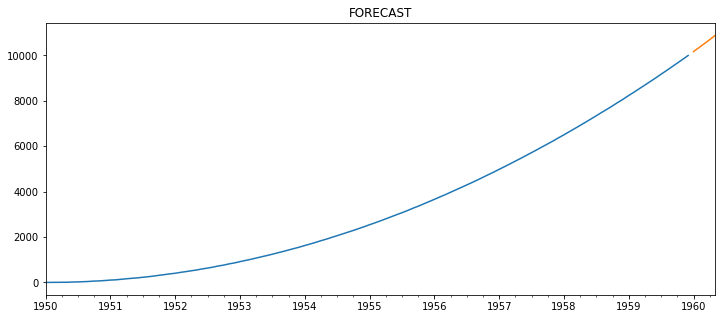

In [ ]:
df2['c'].plot(figsize=(12,5), title="FORECAST").autoscale(axis='x',tight=True)

z['forecast'].plot();

<div class="alert alert-danger"><strong>NOTE:</strong> statsmodels has a built-in differencing tool:<br>
    
<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;from statsmodels.tsa.statespace.tools import diff<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;df2['d1'] = diff(df2['b'],k_diff=1)</font></tt><br><br>
    
that performs the same first order differencing operation shown above. We chose not to use it here because seasonal differencing is somewhat complicated. To difference based on 12 lags, the code would be<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = diff(df2['b'],k_diff=0,k_seasonal_diff=1,seasonal_periods=12)
</font></tt><br><br>

whereas with pandas it's simply<br><br>

<tt><font color=black>&nbsp;&nbsp;&nbsp;&nbsp;df2['d12'] = df2['b'].diff(12)
</font></tt>
</div>

## Lagging
Also known as "backshifting", lagging notation reflects the value of $y$ at a prior point in time. This is a useful technique for performing <em>regressions</em> as we'll see in upcoming sections.

\begin{split}L{y_t} = y_{t-1} & \text{      one lag shifts the data back one period}\\
L^{2}{y_t} = y_{t-2} & \text{      two lags shift the data back two periods} \end{split}
<br><br>
<table>
<tr><td>$y_t$</td><td>6</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-1}$</td><td>8</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
<tr><td>$y_{t-2}$</td><td>3</td><td>4</td><td>9</td><td>2</td><td>5</td></tr>
</table>


# Introduction to ARIMA Models
We'll investigate a variety of different forecasting models in upcoming sections, but they all stem from ARIMA.

<strong>ARIMA</strong>, or <em>Autoregressive Integrated Moving Average</em> is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<strong>Moving Averages</strong> we've already seen with EWMA and the Holt-Winters Method.<br>
<strong>Integration</strong> will apply differencing to make a time series stationary, which ARIMA requires.<br>
<strong>Autoregression</strong> is explained in detail in the next section. Here we're going to correlate a current time series with a lagged version of the same series.<br>
Once we understand the components, we'll investigate how to best choose the $p$, $d$ and $q$ values required by the model.

# ACF and PACF
# Autocorrelation Function / Partial Autocorrelation Function
Before we can investigate <em>autoregression</em> as a modeling tool, we need to look at <em>covariance</em> and <em>correlation</em> as they relate to lagged (shifted) samples of a time series.


### Goals
 * Be able to create ACF and PACF charts
 * Create these charts for multiple times series, one with seasonality and another without
 * Be able to calculate Orders PQD terms for ARIMA off these charts (highlight where they cross the x axis)
 
<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acovf.html'>stattools.acovf</a></strong><font color=black>(x[, unbiased, demean, fft, …])</font>&nbsp;Autocovariance for 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.acf.html'>stattools.acf</a></strong><font color=black>(x[, unbiased, nlags, qstat, …])</font>&nbsp;&nbsp;Autocorrelation function for 1d arrays<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf.html'>stattools.pacf</a></strong><font color=black>(x[, nlags, method, alpha])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_yw.html'>stattools.pacf_yw</a></strong><font color=black>(x[, nlags, method])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Partial autocorrelation estimated with non-recursive yule_walker<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.pacf_ols.html'>stattools.pacf_ols</a></strong><font color=black>(x[, nlags])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Calculate partial autocorrelations</tt>
   
<h3>Related Plot Methods:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_acf.html'>tsaplots.plot_acf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;&nbsp;Plot the autocorrelation function<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.plot_pacf.html'>tsaplots.plot_pacf</a></strong><font color=black>(x)</font>&nbsp;&nbsp;Plot the partial autocorrelation function</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Autocovariance'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Autocovariance</font><br>
<strong>
<a href='https://otexts.com/fpp2/autocorrelation.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autocorrelation</font><br>
<strong>
<a href='https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4463.htm'>NIST Statistics Handbook</a></strong>&nbsp;&nbsp;<font color=black>Partial Autocorrelation Plot</font></div>


## Perform standard imports and load datasets

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import statsmodels.api as sm

# Load a non-stationary dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [ ]:
# Import the models we'll be using in this section
from statsmodels.tsa.stattools import acovf,acf,pacf,pacf_yw,pacf_ols

### Ignore harmless warnings
A quick note before we get started. Many of the models used in this and upcoming sections are likely to raise harmless warnings.<br>For instance, the unbiased partial autocorrelation <tt>pacf_yw()</tt> performed below may raise a <tt>RuntimeWarning: invalid value encountered in sqrt</tt>.<br>
We don't really need to be concerned with this, and we can avoid it with the following code:

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Autocovariance for 1D
In a <em>deterministic</em> process, like $y=sin(x)$, we always know the value of $y$ for a given value of $x$. However, in a <em>stochastic</em> process there is always some randomness that prevents us from knowing the value of $y$. Instead, we analyze the past (or <em>lagged</em>) behavior of the system to derive a probabilistic estimate for $\hat{y}$.

One useful descriptor is <em>covariance</em>. When talking about dependent and independent $x$ and $y$ variables, covariance describes how the variance in $x$ relates to the variance in $y$. Here the size of the covariance isn't really important, as $x$ and $y$ may have very different scales. However, if the covariance is positive it means that $x$ and $y$ are changing in the same direction, and may be related.

With a time series, $x$ is a fixed interval. Here we want to look at the variance of $y_t$ against lagged or shifted values of $y_{t+k}$

For a stationary time series, the autocovariance function for $\gamma$ (gamma) is given as:

${\displaystyle {\gamma}_{XX}(t_{1},t_{2})=\operatorname {Cov} \left[X_{t_{1}},X_{t_{2}}\right]=\operatorname {E} [(X_{t_{1}}-\mu _{t_{1}})(X_{t_{2}}-\mu _{t_{2}})]}$

We can calculate a specific $\gamma_k$ with:

${\displaystyle \gamma_k = \frac 1 n \sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})}$


<div class="alert alert-info"><strong>A NOTE ON FORMULA CONVENTIONS:</strong> Different texts employ different symbol conventions. For example, in the above autocovariance formula we use $k$ to represent the amount of lag or shift. Some texts use $h$ instead.</div>


### Autocovariance Example:
Say we have a time series with five observations: {13, 5, 11, 12, 9}.<br>
We can quickly see that $n = 5$, the mean $\bar{y} = 10$, and we'll see that the variance $\sigma^2 = 8$.<br>
The following calculations give us our covariance values:
<br><br>
$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} 5 = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} 5 = \frac {-20} 5 = -4.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} 5 = \frac {-8} 5 = -1.6 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} 5 = \frac {11} 5 = 2.2 \\
\gamma_4 = \frac {(13-10)(9-10)} 5 = \frac {-3} 5 = -0.6$
<br><br>
Note that $\gamma_0$ is just the population variance $\sigma^2$

Let's see if statsmodels gives us the same results! For this we'll create a <strong>fake</strong> dataset:

In [ ]:
df = pd.DataFrame({'a':[13, 5, 11, 12, 9]})
arr = acovf(df['a'])
arr

array([ 8. , -4. , -1.6,  2.2, -0.6])

### Unbiased Autocovariance
Note that the number of terms in the calculations above are decreasing.<br>Statsmodels can return an "unbiased" autocovariance where instead of dividing by $n$ we divide by $n-k$.

$\gamma_0 = \frac {(13-10)(13-10)+(5-10)(5-10)+(11-10)(11-10)+(12-10)(12-10)+(9-10)(9-10)} {5-0} = \frac {40} 5 = 8.0 \\
\gamma_1 = \frac {(13-10)(5-10)+(5-10)(11-10)+(11-10)(12-10)+(12-10)(9-10)} {5-1} = \frac {-20} 4 = -5.0 \\
\gamma_2 = \frac {(13-10)(11-10)+(5-10)(12-10)+(11-10)(9-10)} {5-2} = \frac {-8} 3 = -2.67 \\
\gamma_3 = \frac {(13-10)(12-10)+(5-10)(9-10)} {5-3} = \frac {11} 2 = 5.5 \\
\gamma_4 = \frac {(13-10)(9-10)} {5-4} = \frac {-3} 1 = -3.0$

In [ ]:
arr2 = acovf(df['a'],unbiased=True)
arr2

array([ 8.        , -5.        , -2.66666667,  5.5       , -3.        ])

## Autocorrelation for 1D
The correlation $\rho$ (rho) between two variables $y_1,y_2$ is given as:

### $\rho = \frac {\operatorname E[(y_1−\mu_1)(y_2−\mu_2)]} {\sigma_{1}\sigma_{2}} = \frac {\operatorname {Cov} (y_1,y_2)} {\sigma_{1}\sigma_{2}}$,

where $E$ is the expectation operator, $\mu_{1},\sigma_{1}$ and $\mu_{2},\sigma_{2}$ are the means and standard deviations of $y_1$ and $y_2$.

When working with a single variable (i.e. <em>autocorrelation</em>) we would consider $y_1$ to be the original series and $y_2$ a lagged version of it. Note that with autocorrelation we work with $\bar y$, that is, the full population mean, and <em>not</em> the means of the reduced set of lagged factors (see note below).

Thus, the formula for $\rho_k$ for a time series at lag $k$ is:

${\displaystyle \rho_k = \frac {\sum\limits_{t=1}^{n-k} (y_t - \bar{y})(y_{t+k}-\bar{y})} {\sum\limits_{t=1}^{n} (y_t - \bar{y})^2}}$

This can be written in terms of the covariance constant $\gamma_k$ as:

${\displaystyle \rho_k = \frac {\gamma_k n} {\gamma_0 n} = \frac {\gamma_k} {\sigma^2}}$

For example,<br>
$\rho_4 = \frac {\gamma_4} {\sigma^2} = \frac{-0.6} {8} = -0.075$

Note that ACF values are bound by -1 and 1. That is, ${\displaystyle -1 \leq \rho_k \leq 1}$

In [ ]:
arr3 = acf(df['a'])
arr3

array([ 1.   , -0.5  , -0.2  ,  0.275, -0.075])

## Partial Autocorrelation
Partial autocorrelations measure the linear dependence of one variable after removing the effect of other variable(s) that affect both variables. That is, the partial autocorrelation at lag $k$ is the autocorrelation between $y_t$ and $y_{t+k}$ that is not accounted for by lags $1$ through $k−1$.

A common method employs the non-recursive <a href='https://en.wikipedia.org/wiki/Autoregressive_model#Calculation_of_the_AR_parameters'>Yule-Walker Equations</a>:

$\phi_0 = 1\\
\phi_1 = \rho_1 = -0.50\\
\phi_2 = \frac {\rho_2 - {\rho_1}^2} {1-{\rho_1}^2} = \frac {(-0.20) - {(-0.50)}^2} {1-{(-0.50)}^2}= \frac {-0.45} {0.75} = -0.60$

As $k$ increases, we can solve for $\phi_k$ using matrix algebra and the <a href='https://en.wikipedia.org/wiki/Levinson_recursion'>Levinson–Durbin recursion</a> algorithm which maps the sample autocorrelations $\rho$ to a <a href='https://en.wikipedia.org/wiki/Toeplitz_matrix'>Toeplitz</a> diagonal-constant matrix. The full solution is beyond the scope of this template, but the setup is as follows:


$\displaystyle \begin{pmatrix}\rho_0&\rho_1&\cdots &\rho_{k-1}\\
\rho_1&\rho_0&\cdots &\rho_{k-2}\\
\vdots &\vdots &\ddots &\vdots \\
\rho_{k-1}&\rho_{k-2}&\cdots &\rho_0\\
\end{pmatrix}\quad \begin{pmatrix}\phi_{k1}\\\phi_{k2}\\\vdots\\\phi_{kk}\end{pmatrix}
\mathbf = \begin{pmatrix}\rho_1\\\rho_2\\\vdots\\\rho_k\end{pmatrix}$

In [ ]:
arr4 = pacf_yw(df['a'],nlags=4,method='mle')
arr4

array([ 1.        , -0.5       , -0.6       , -0.38541667, -0.40563273])

<div class="alert alert-info"><strong>NOTE:</strong> We passed in <tt><font color=black>method='mle'</font></tt> above in order to use biased ACF coefficients. "mle" stands for "maximum likelihood estimation". Alternatively we can pass <tt>method='unbiased'</tt> (the statsmodels default):</div>

In [ ]:
arr5 = pacf_yw(df['a'],nlags=4,method='unbiased')
arr5

array([ 1.        , -0.625     , -1.18803419,  2.03764205,  0.8949589 ])

### Partial Autocorrelation with OLS
This provides partial autocorrelations with <a href='https://en.wikipedia.org/wiki/Ordinary_least_squares'>ordinary least squares</a> (OLS) estimates for each lag instead of Yule-Walker.

In [ ]:
arr6 = pacf_ols(df['a'],nlags=4)
arr6

array([ 1.        , -0.49677419, -0.43181818,  0.53082621,  0.25434783])

# Plotting
The arrays returned by <tt>.acf(df)</tt> and <tt>.pacf_yw(df)</tt> show the magnitude of the autocorrelation for a given $y$ at time $t$. Before we look at plotting arrays, let's look at the data itself for evidence of autocorrelation.

Pandas has a built-in plotting function that plots increasing $y_t$ values on the horizontal axis against lagged versions of the values $y_{t+1}$ on the vertical axis. If a dataset is non-stationary with an upward trend, then neighboring values should trend in the same way. Let's look at the <strong>Airline Passengers</strong> dataset first.

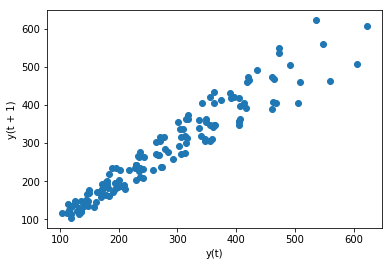

In [ ]:
from pandas.plotting import lag_plot

lag_plot(df1['Thousands of Passengers']);

Visually this shows evidence of a very strong autocorrelation; as $y_t$ values increase, nearby (lagged) values also increase.

Now let's look at the stationary <strong>Daily Total Female Births</strong> dataset:

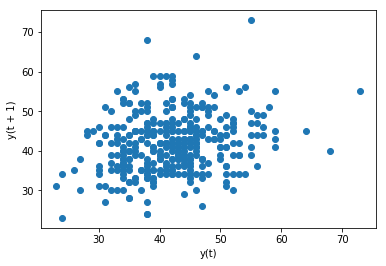

In [ ]:
lag_plot(df2['Births']);

As expected, there is little evidence of autocorrelation here.

## ACF Plots
Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about a time series.

For example, consider the stationary <strong>Daily Total Female Births</strong> dataset:

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [ ]:
# Let's look first at the ACF array. By default acf() returns 40 lags
acf(df2['Births'])

array([ 1.        ,  0.21724118,  0.15287758,  0.10821254,  0.09066059,
        0.09595481,  0.09104012,  0.19508071,  0.14115295,  0.06117859,
        0.04781522,  0.04770662, -0.01964707,  0.02287422,  0.08112657,
        0.11185686,  0.07333732,  0.01501845,  0.07270333,  0.06859   ,
        0.09280107,  0.26386846,  0.14012147,  0.06070286,  0.08716232,
        0.05038825,  0.0650489 ,  0.11466565,  0.1552232 ,  0.12850638,
        0.10358981,  0.09734643,  0.04912286,  0.04022798,  0.05838555,
        0.05359812,  0.10151053,  0.08268663,  0.0912185 ,  0.11192192,
        0.05652846])

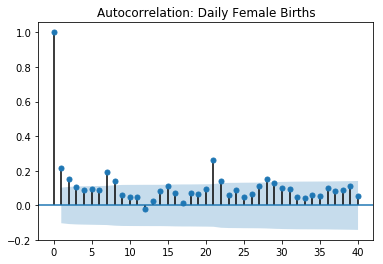

In [ ]:
# Now let's plot the autocorrelation at different lags
title = 'Autocorrelation: Daily Female Births'
lags = 40
plot_acf(df2,title=title,lags=lags);

This is a typical ACF plot for stationary data, with lags on the horizontal axis and correlations on the vertical axis. The first value $y_0$ is always 1. A sharp dropoff indicates that there is no AR component in the ARIMA model.

Next we'll look at non-stationary data with the <strong>Airline Passengers</strong> dataset:

In [ ]:
acf(df1['Thousands of Passengers'])

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376, 0.48248203, 0.51712699, 0.53218983,
       0.49397569, 0.43772134, 0.3876029 , 0.34802503, 0.31498388,
       0.28849682, 0.27080187, 0.26429011, 0.27679934, 0.2985215 ,
       0.32558712, 0.3370236 , 0.30333486, 0.25397708, 0.21065534,
       0.17217092])

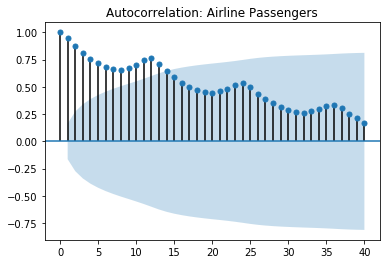

In [ ]:
title = 'Autocorrelation: Airline Passengers'
lags = 40
plot_acf(df1,title=title,lags=lags);

This plot indicates non-stationary data, as there are a large number of lags before ACF values drop off.

## PACF Plots
Partial autocorrelations work best with stationary data. Let's look first at <strong>Daily Total Female Births</strong>:

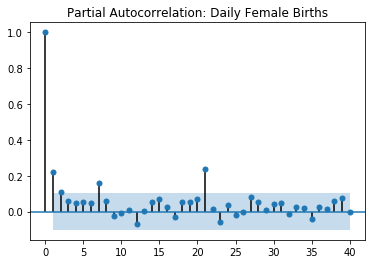

In [ ]:
title='Partial Autocorrelation: Daily Female Births'
lags=40
plot_pacf(df2,title=title,lags=lags);

To make the <strong>Airline Passengers</strong> data stationary, we'll first apply <em>differencing</em>:

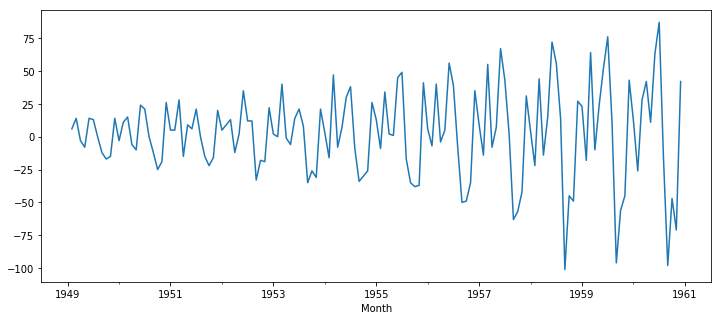

In [ ]:
from statsmodels.tsa.statespace.tools import diff

df1['d1'] = diff(df1['Thousands of Passengers'],k_diff=1)
df1['d1'].plot(figsize=(12,5));

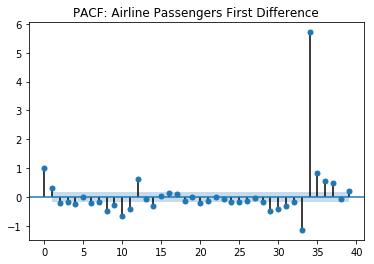

In [ ]:
title='PACF: Airline Passengers First Difference'
lags=40
plot_pacf(df1['d1'].dropna(),title=title,lags=np.arange(lags));  # be sure to add .dropna() here!

### Plot Resizing
In case you want to display the full autocorrelation plot, it helps to increase the figure size using matplotlib:

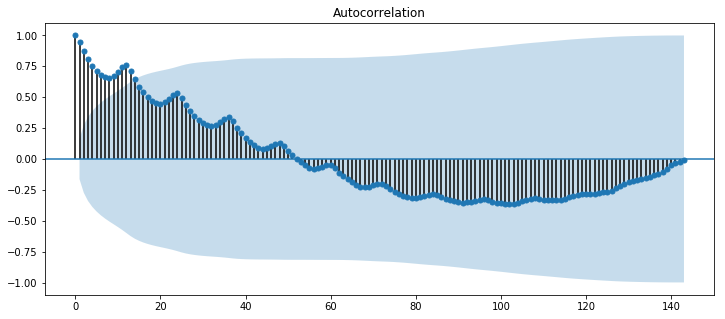

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,5))

plot_acf(df1['Thousands of Passengers'],ax=ax);

<div class="alert alert-success"><strong>A NOTE ABOUT AUTOCORRELATION:</strong> Some texts compute lagged correlations using the Pearson Correlation Coefficient given by:<br><br>
${\displaystyle r_{xy}={\frac {\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{{\sqrt {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}{\sqrt {\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2}}}}}}$

These are easily calculated in numpy with <tt>numpy.corrcoef(x,y)</tt> and in Excel with <tt>=CORREL(x,y)</tt>.<br><br>
Using our example, $r_0$ is still $1$, but to solve for $r_1$:

${\displaystyle x_1 = [13, 5, 11, 12], \bar{x_1} = 10.25}$<br><br>
$y_1 = [5, 11, 12, 9],\  \bar{y_1} = 9.25$<br><br>
$r_{{x_1}{y_1}}=\frac {(13-10.25)(5-9.25)+(5-10.25)(11-9.25)+(11-10.25)(12-9.25)+(12-10.25)(9-9.25)}
{\sqrt{((13-10.25)^2+(5-10.25)^2+(11-10.25)^2+(12-10.25)^2)}\sqrt{((5-9.25)^2+(11-9.25)^2+(12-9.25)^2+(9-9.25)^2)}} = \frac {-19.25} {33.38} = -0.577$
<br><br>
However, there are some shortcomings. Using the Pearson method, the second-to-last term $r_{k-1}$ will always be $1$ and the last term $r_k$ will always be undefined.
</div>

# AR(p) - Autoregressive Model
In a moving average model as we saw with Holt-Winters, we forecast the variable of interest using a linear combination of predictors. In our example we forecasted numbers of airline passengers in thousands based on a set of level, trend and seasonal predictors.

In an autoregression model, we forecast using a linear combination of <em>past values</em> of the variable. The term <em>autoregression</em> describes a regression of the variable against itself. An autoregression is run against a set of <em>lagged values</em> of order $p$.

### $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

For example, an <strong>AR(1)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

whereas an <strong>AR(2)</strong> model would follow the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \varepsilon_{t}$

and so on.

Note that the lag coeffients are usually less than one, as we usually restrict autoregressive models to stationary data.<br>
Specifically, for an <strong>AR(1)</strong> model: $-1 \lt \phi_1 \lt 1$<br>
and for an <strong>AR(2)</strong> model: $-1 \lt \phi_2 \lt 1, \ \phi_1 + \phi_2 \lt 1, \ \phi_2 - \phi_1 \lt 1$<br>

Models <strong>AR(3)</strong> and higher become mathematically very complex. Fortunately statsmodels does all the heavy lifting for us.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.AR.html'>ar_model.AR</a></strong><font color=black>(endog[, dates, freq, missing])</font>&nbsp;&nbsp;Autoregressive AR(p) model<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.ar_model.ARResults.html'>ar_model.ARResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an AR model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://otexts.com/fpp2/AR.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive models</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive model</font></div>

## Perform standard imports and load datasets
For this exercise we'll look at monthly U.S. population estimates in thousands from January 2011 to December 2018 (96 records, 8 years of data). Population includes resident population plus armed forces overseas. The monthly estimate is the average of estimates for the first of the month and the first of the following month.
Source: https://fred.stlouisfed.org/series/POPTHM

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.ar_model import AR,ARResults

# Load the U.S. Population dataset
df = pd.read_csv('../Data/uspopulation.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [ ]:
df.head()

PopEst
DATE              
2011-01-01  311037
2011-02-01  311189
2011-03-01  311351
2011-04-01  311522
2011-05-01  311699

## Plot the source data

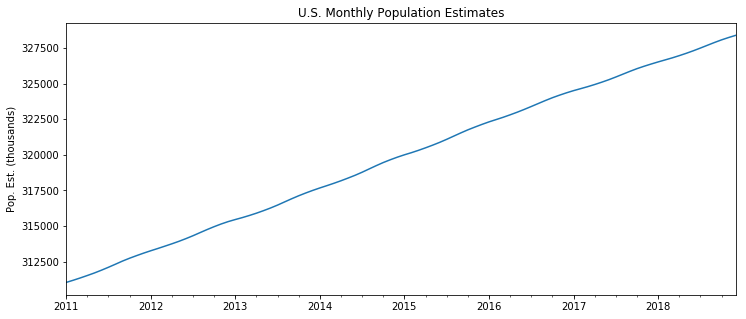

In [ ]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df['PopEst'].plot(figsize=(12,5),title=title);
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Split the data into train/test sets
The goal in this section is to:
* Split known data into a training set of records on which to fit the model
* Use the remaining records for testing, to evaluate the model
* Fit the model again on the <em>full</em> set of records
* Predict a future set of values using the model

As a general rule you should set the length of your test set equal to your intended forecast size. That is, for a monthly dataset you might want to forecast out one more year. Therefore your test set should be one year long.

<div class="alert alert-info"><strong>NOTE: </strong>For many training and testing applications we would use the <tt>train_test_split()</tt> function available from Python's <a href='https://scikit-learn.org/stable/'>scikit-learn</a> library. This won't work here as <tt>train_test_split()</tt> takes <em>random samples</em> of data from the population.</div>

In [ ]:
len(df)

96

In [ ]:
# Set one year for testing
train = df.iloc[:84]
test = df.iloc[84:]

## Fit an AR(1) Model

In [ ]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
model = AR(train['PopEst'])
AR1fit = model.fit(maxlag=1,method='mle')
print(f'Lag: {AR1fit.k_ar}')
print(f'Coefficients:\n{AR1fit.params}')

Lag: 1
Coefficients:
const        132.578420
L1.PopEst      0.999583
dtype: float64


<div class="alert alert-info"><strong>NOTE: </strong>There's a slight difference between the object returned by the Holt-Winters Exponential Smoothing <tt>.fit()</tt> method and that returned by AR. The Holt-Winters object uses <tt>.forecast()</tt> for predicted values, while AR uses <tt>.predict()</tt>.</div>

In [ ]:
# This is the general format for obtaining predictions
start=len(train)
end=len(train)+len(test)-1
predictions1 = AR1fit.predict(start=start, end=end, dynamic=False).rename('AR(1) Predictions')

In [ ]:
predictions1

2018-01-01    326374.598675
2018-02-01    326371.198767
2018-03-01    326367.800275
2018-04-01    326364.403200
2018-05-01    326361.007540
2018-06-01    326357.613294
2018-07-01    326354.220463
2018-08-01    326350.829045
2018-09-01    326347.439040
2018-10-01    326344.050448
2018-11-01    326340.663267
2018-12-01    326337.277498
Freq: MS, Name: AR(1) Predictions, dtype: float64

In [ ]:
# Comparing predictions to expected values
for i in range(len(predictions1)):
    print(f"predicted={predictions1[i]:<11.10}, expected={test['PopEst'][i]}")

predicted=326374.5987, expected=326527
predicted=326371.1988, expected=326669
predicted=326367.8003, expected=326812
predicted=326364.4032, expected=326968
predicted=326361.0075, expected=327134
predicted=326357.6133, expected=327312
predicted=326354.2205, expected=327502
predicted=326350.829 , expected=327698
predicted=326347.439 , expected=327893
predicted=326344.0504, expected=328077
predicted=326340.6633, expected=328241
predicted=326337.2775, expected=328393


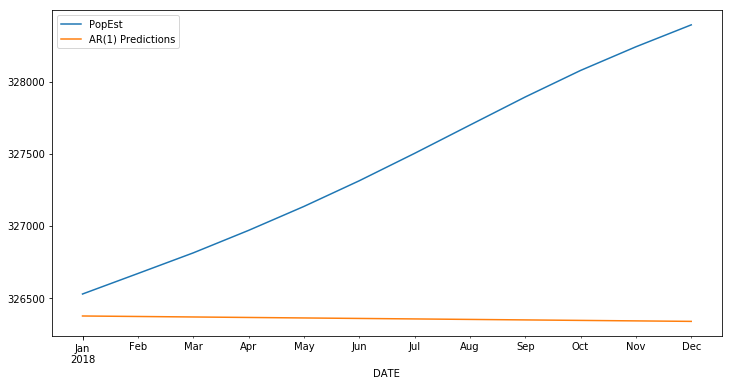

In [ ]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True,figsize=(12,6));

## Fit an AR(2) Model

In [ ]:
# Recall that our model was already created above based on the training set
AR2fit = model.fit(maxlag=2,method='mle')
print(f'Lag: {AR2fit.k_ar}')
print(f'Coefficients:\n{AR2fit.params}')

Lag: 2
Coefficients:
const        135.359186
L1.PopEst      1.996616
L2.PopEst     -0.997041
dtype: float64


In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions2 = AR2fit.predict(start=start, end=end, dynamic=False).rename('AR(2) Predictions')

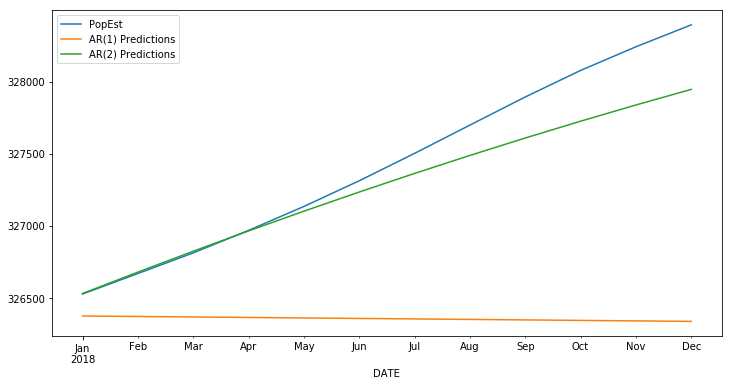

In [ ]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True,figsize=(12,6));

## Fit an AR(p) model where statsmodels chooses p
This time we'll omit the <tt>maxlag</tt> argument in <tt>AR.fit()</tt> and let statsmodels choose a p-value for us.

In [ ]:
ARfit = model.fit(method='mle')
print(f'Lag: {ARfit.k_ar}')
print(f'Coefficients:\n{ARfit.params}')

Lag: 11
Coefficients:
const         96.145642
L1.PopEst      2.314345
L2.PopEst     -2.213026
L3.PopEst      1.761875
L4.PopEst     -1.430621
L5.PopEst      0.900533
L6.PopEst     -0.968998
L7.PopEst      0.965925
L8.PopEst     -0.264157
L9.PopEst      0.127500
L10.PopEst    -0.194535
L11.PopEst     0.000855
dtype: float64


In [ ]:
start = len(train)
end = len(train)+len(test)-1
rename = f'AR(11) Predictions'

predictions11 = ARfit.predict(start=start,end=end,dynamic=False).rename(rename)

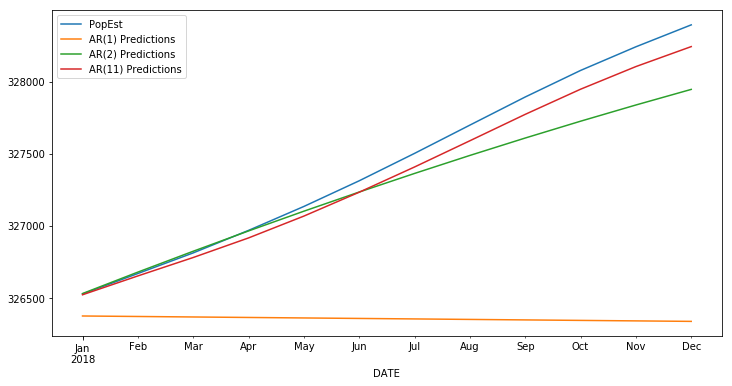

In [ ]:
test['PopEst'].plot(legend=True)
predictions1.plot(legend=True)
predictions2.plot(legend=True)
predictions11.plot(legend=True,figsize=(12,6));

## Evaluate the Model
It helps to have a means of comparison between two or more models. One common method is to compute the Mean Squared Error (MSE), available from scikit-learn.

In [ ]:
from sklearn.metrics import mean_squared_error

labels = ['AR(1)','AR(2)','AR(11)']
preds = [predictions1, predictions2, predictions11]  # these are variables, not strings!

for i in range(3):
    error = mean_squared_error(test['PopEst'], preds[i])
    print(f'{labels[i]} Error: {error:11.10}')

AR(1) Error: 1545278.379
AR(2) Error: 53231.37611
AR(11) Error: 9032.545012


We see right away how well AR(11) outperformed the other two models.

Another method is the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> (AIC), which does a better job of evaluating models by avoiding overfitting.<br>
Fortunately this is available directly from the fit model object.

In [ ]:
modls = [AR1fit,AR2fit,ARfit]

for i in range(3):
    print(f'{labels[i]} AIC: {modls[i].aic:6.5}')

AR(1) AIC: 3.4385
AR(2) AIC: 3.4623
AR(11) AIC: 3.6766


## Forecasting
Now we're ready to train our best model on the greatest amount of data, and fit it to future dates.

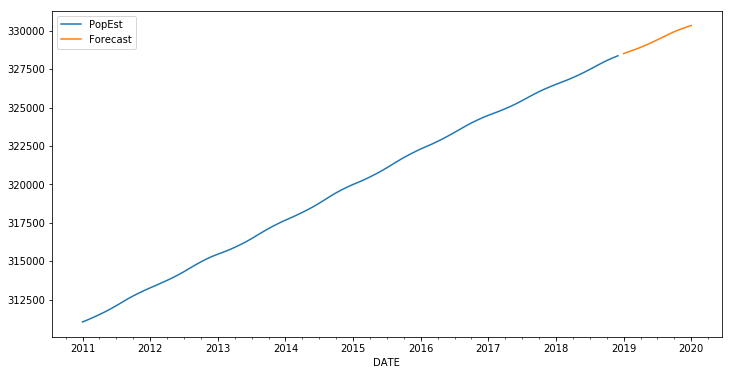

In [ ]:
# First, retrain the model on the full dataset
model = AR(df['PopEst'])

# Next, fit the model
ARfit = model.fit(maxlag=11,method='mle')

# Make predictions
fcast = ARfit.predict(start=len(df), end=len(df)+12, dynamic=False).rename('Forecast')

# Plot the results
df['PopEst'].plot(legend=True)
fcast.plot(legend=True,figsize=(12,6));

# Descriptive Statistics and Tests
In upcoming sections we'll talk about different forecasting models like ARMA, ARIMA, Seasonal ARIMA and others. Each model addresses a different type of time series. For this reason, in order to select an appropriate model we need to know something about the data.

In this section we'll learn how to determine if a time series is <em>stationary</em>, if it's <em>independent</em>, and if two series demonstrate <em>correlation</em> and/or <em>causality</em>.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccovf.html'>stattools.ccovf</a></strong><font color=black>(x, y[, unbiased, demean])</font>&nbsp;&nbsp;crosscovariance for 1D<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.ccf.html'>stattools.ccf</a></strong><font color=black>(x, y[, unbiased])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;cross-correlation function for 1d<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.periodogram.html'>stattools.periodogram</a></strong><font color=black>(X)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns the periodogram for the natural frequency of X<br>
    
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.adfuller.html'>stattools.adfuller</a></strong><font color=black>(x[, maxlag, regression, …])</font>&nbsp;&nbsp;Augmented Dickey-Fuller unit root test<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.kpss.html'>stattools.kpss</a></strong><font color=black>(x[, regression, lags, store])</font>&nbsp;&nbsp;&nbsp;&nbsp;Kwiatkowski-Phillips-Schmidt-Shin test for stationarity.<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.coint.html'>stattools.coint</a></strong><font color=black>(y0, y1[, trend, method, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Test for no-cointegration of a univariate equation<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.bds.html'>stattools.bds</a></strong><font color=black>(x[, max_dim, epsilon, distance])</font>&nbsp;&nbsp;Calculate the BDS test statistic for independence of a time series<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.q_stat.html'>stattools.q_stat</a></strong><font color=black>(x, nobs[, type])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Returns Ljung-Box Q Statistic<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.grangercausalitytests.html'>stattools.grangercausalitytests</a></strong><font color=black>(x, maxlag[, …])</font>&nbsp;Four tests for granger non-causality of 2 timeseries<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.levinson_durbin.html'>stattools.levinson_durbin</a></strong><font color=black>(s[, nlags, isacov])</font>&nbsp;&nbsp;&nbsp;Levinson-Durbin recursion for autoregressive processes<br>

<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.mse.html'>stattools.eval_measures.mse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.rmse.html'>stattools.eval_measures.rmse</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;root mean squared error<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.meanabs.html'>stattools.eval_measures.meanabs</a></strong><font color=black>(x1, x2, axis=0)</font>&nbsp;&nbsp;mean absolute error<br>
</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Augmented Dickey–Fuller test</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/KPSS_test'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Kwiatkowski-Phillips-Schmidt-Shin test</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Granger_causality'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Granger causality test</font><br>
<strong>
<a href='https://otexts.com/fpp2/accuracy.html'>Forecasting: Principles and Practice:</a></strong>&nbsp;&nbsp;<font color=black>Evaluating forecast accuracy</font>

</div>



## Perform standard imports and load datasets

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load a seasonal dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a nonseasonal dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

In [ ]:
from statsmodels.tsa.stattools import ccovf,ccf,periodogram

In [ ]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [ ]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs

# Alternative:
# from sklearn.metrics import mean_squared_error

# Tests for Stationarity
A time series is <em>stationary</em> if the mean and variance are fixed between any two equidistant points. That is, no matter where you take your observations, the results should be the same. A times series that shows seasonality is <em>not</em> stationary.

A test for stationarity usually involves a <a href='https://en.wikipedia.org/wiki/Unit_root_test'>unit root</a> hypothesis test, where the null hypothesis $H_0$ is that the series is <em>nonstationary</em>, and contains a unit root. The alternate hypothesis $H_1$ supports stationarity. The <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller</a> and <a href='https://en.wikipedia.org/wiki/KPSS_test'>Kwiatkowski-Phillips-Schmidt-Shin</a> tests are stationarity tests. 

## Augmented Dickey-Fuller Test
To determine whether a series is stationary we can use the <a href='https://en.wikipedia.org/wiki/Augmented_Dickey-Fuller_test'>augmented Dickey-Fuller Test</a>. In this test the null hypothesis states that $\phi = 1$ (this is also called a unit test). The test returns several statistics we'll see in a moment. Our focus is on the p-value. A small p-value ($p<0.05$) indicates strong evidence against the null hypothesis.

To demonstrate, we'll use a dataset we know is <em>not</em> stationary, the airline_passenger dataset. First, let's plot the data along with a 12-month rolling mean and standard deviation:

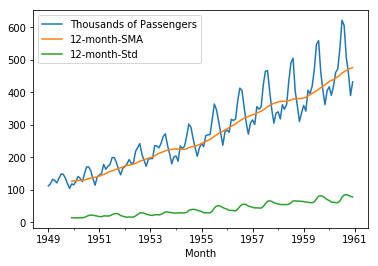

In [ ]:
df1['12-month-SMA'] = df1['Thousands of Passengers'].rolling(window=12).mean()
df1['12-month-Std'] = df1['Thousands of Passengers'].rolling(window=12).std()

df1[['Thousands of Passengers','12-month-SMA','12-month-Std']].plot();

Not only is this dataset seasonal with a clear upward trend, the standard deviation increases over time as well.

In [ ]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df1['Thousands of Passengers'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Airline Data


(0.8153688792060423,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.6929308390189)

To find out what these values represent we can run <tt>help(adfuller)</tt>. Then we can add our own labels:

In [ ]:
print('Augmented Dickey-Fuller Test on Airline Data')

dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Airline Data
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


Here we have a very high p-value at 0.99, which provides weak evidence against the null hypothesis, and so we <em>fail to reject</em> the null hypothesis, and decide that our dataset is not stationary.<br>
Note: in statistics we don't "accept" a null hypothesis - nothing is ever truly proven - we just fail to reject it.
<br><br>
Now let's apply the ADF test to stationary data with the Daily Total Female Births dataset.

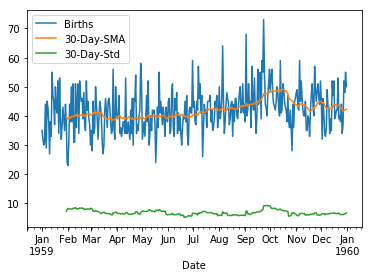

In [ ]:
df2['30-Day-SMA'] = df2['Births'].rolling(window=30).mean()
df2['30-Day-Std'] = df2['Births'].rolling(window=30).std()

df2[['Births','30-Day-SMA','30-Day-Std']].plot();

In [ ]:
print('Augmented Dickey-Fuller Test on Daily Female Births')
dftest = adfuller(df2['Births'],autolag='AIC')
dfout = pd.Series(dftest[0:4],index=['ADF test statistic','p-value','# lags used','# observations'])

for key,val in dftest[4].items():
    dfout[f'critical value ({key})']=val
print(dfout)

Augmented Dickey-Fuller Test on Daily Female Births
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
dtype: float64


In this case our p-value is very low at 0.000052, and we do reject the null hypothesis. This dataset appears to have no unit root, and is stationary.

### Function for running the augmented Dickey-Fuller test
Since we'll use it frequently in the upcoming forecasts, let's define a function we can copy into future notebooks for running the augmented Dickey-Fuller test. Remember that we'll still have to import <tt>adfuller</tt> at the top of our notebook.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

# Granger Causality Tests
The <a href='https://en.wikipedia.org/wiki/Granger_causality'>Granger causality test</a> is a a hypothesis test to determine if one time series is useful in forecasting another. While it is fairly easy to measure correlations between series - when one goes up the other goes up, and vice versa - it's another thing to observe changes in one series correlated to changes in another after a consistent amount of time. This <em>may</em> indicate the presence of causality, that changes in the first series influenced the behavior of the second. However, it may also be that both series are affected by some third factor, just at different rates. Still, it can be useful if changes in one series can predict upcoming changes in another, whether there is causality or not. In this case we say that one series "Granger-causes" another.

In the case of two series, $y$ and $x$, the null hypothesis is that lagged values of $x$ do <em>not</em> explain variations in $y$.<br>
In other words, it assumes that $x_t$ doesn’t Granger-cause $y_t$.

The stattools <tt><strong>grangercausalitytests</strong></tt> function offers four tests for granger non-causality of 2 timeseries

For this example we'll use the samples.csv file, where columns 'a' and 'd' are stationary datasets.

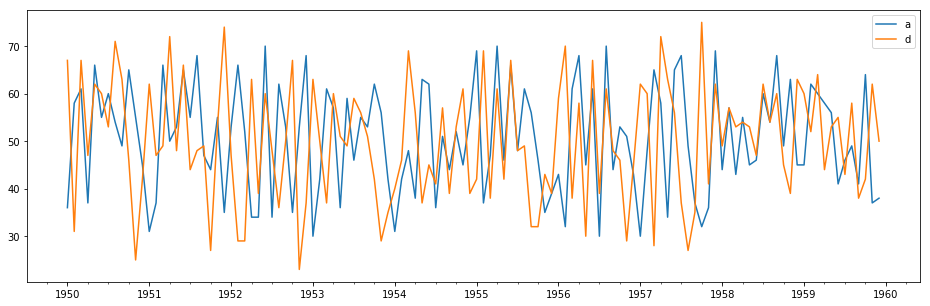

In [ ]:
df3 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)
df3.index.freq = 'MS'
df3[['a','d']].plot(figsize=(16,5));

It's hard to tell from this overlay but <tt>df['d']</tt> almost perfectly predicts the behavior of <tt>df['a']</tt>.<br>
To see this more clearly (spoiler alert!), we will shift <tt>df['d']</tt> two periods forward.

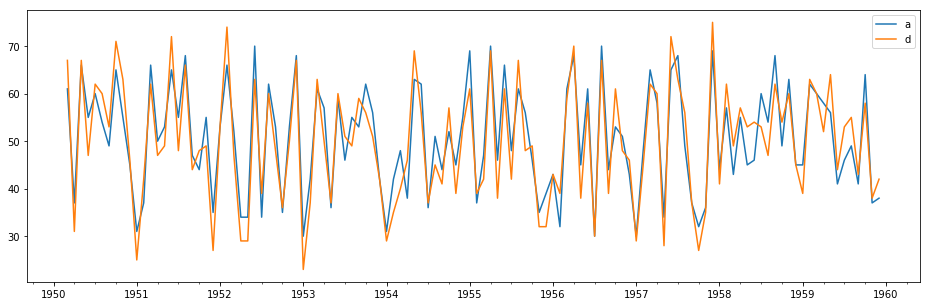

In [ ]:
df3['a'].iloc[2:].plot(figsize=(16,5),legend=True);
df3['d'].shift(2).plot(legend=True);

### Run the test
The function takes in a 2D array [y,x] and a maximum number of lags to test on x. Here our y is column 'a' and x is column 'd'. We'll set maxlags to 3.

In [ ]:
# Add a semicolon at the end to avoid duplicate output
grangercausalitytests(df3[['a','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=602.2669, p=0.0000  , df=3
likelihood ratio test: chi2=212.4789, p=0.0000  , df=3
parameter F test:         F=188.7446, p=0.0000  , df_denom=110, df_num=3


Essentially we're looking for extremely low p-values, which we see at lag 2.<br>
By comparison, let's compare two datasets that are not at all similar, 'b' and 'd'.

In [ ]:
# Add a semicolon at the end to avoid duplicate output
grangercausalitytests(df3[['b','d']],maxlag=3);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.5619  , p=0.2114  , df=1
likelihood ratio test: chi2=1.5517  , p=0.2129  , df=1
parameter F test:         F=1.5225  , p=0.2197  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=0.9086  , p=0.6349  , df=2
likelihood ratio test: chi2=0.9051  , p=0.6360  , df=2
parameter F test:         F=0.4350  , p=0.6483  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=1.7018  , p=0.6365  , df=3
likelihood ratio test: chi2=1.6895  , p=0.6393  , df=3
parameter F test:         F=0.5333  , p=0.6604  , df_denom=110, df_num=3


# Evaluating forecast accuracy
Two calculations related to linear regression are <a href='https://en.wikipedia.org/wiki/Mean_squared_error'><strong>mean squared error</strong></a> (MSE) and <a href='https://en.wikipedia.org/wiki/Root-mean-square_deviation'><strong>root mean squared error</strong></a> (RMSE)

The formula for the mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$MSE = {\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2$<br><br>
where $T$ is the last observation period and $l$ is the lag point up to $L$ number of test observations.

The formula for the root mean squared error is<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{MSE} = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>

The advantage of the RMSE is that it is expressed in the same units as the data.<br><br>

A method similar to the RMSE is the <a href='https://en.wikipedia.org/wiki/Mean_absolute_error'><strong>mean absolute error</strong></a> (MAE) which is the mean of the magnitudes of the error, given as<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;$MAE = {\frac 1 L} \sum\limits_{l=1}^L \mid{y_{T+l}} - \hat y_{T+l}\mid$<br><br>

A forecast method that minimizes the MAE will lead to forecasts of the median, while minimizing the RMSE will lead to forecasts of the mean.

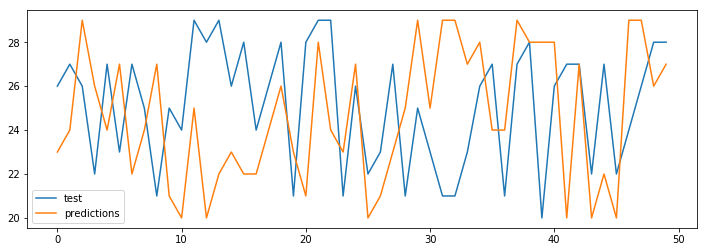

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])
df.plot(figsize=(12,4));

In [ ]:
MSE = mse(df['test'],df['predictions'])
RMSE = rmse(df['test'],df['predictions'])
MAE = meanabs(df['test'],df['predictions'])

print(f'Model  MSE: {MSE:.3f}')
print(f'Model RMSE: {RMSE:.3f}')
print(f'Model  MAE: {MAE:.3f}')

Model  MSE: 17.020
Model RMSE: 4.126
Model  MAE: 3.540


### AIC / BIC
More sophisticated tests include the <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'><strong>Akaike information criterion</strong></a> (AIC) and the <a href='https://en.wikipedia.org/wiki/Bayesian_information_criterion'><strong>Bayesian information criterion</strong></a> (BIC).

The AIC evaluates a collection of models and estimates the quality of each model relative to the others. Penalties are provided for the number of parameters used in an effort to thwart overfitting. The lower the AIC and BIC, the better the model should be at forecasting.

These functions are available as

&nbsp;&nbsp;&nbsp;&nbsp;<tt>from from statsmodels.tools.eval_measures import aic, bic</tt>

but we seldom compute them alone as they are built into many of the statsmodels tools we use.

## Exposing Seasonality with Month and Quarter Plots
Statsmodels has two plotting functions that group data by month and by quarter. Note that if the data appears as months, you should employ <em>resampling</em> with an aggregate function before running a quarter plot. These plots return a <tt>matplotlib.Figure</tt> object.
<div class="alert alert-info"><h3>Related Plot Methods:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.month_plot.html'>tsaplots.month_plot</a></strong><font color=black>(x)</font>&nbsp;&nbsp;&nbsp;&nbsp;Seasonal plot of monthly data<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.graphics.tsaplots.quarter_plot.html'>tsaplots.quarter_plot</a></strong><font color=black>(x)</font>&nbsp;&nbsp;Seasonal plot of quarterly data</tt>
</div>

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

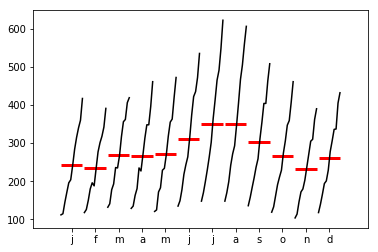

In [ ]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

# Note: add a semicolon to prevent two plots being displayed in jupyter
month_plot(df['Thousands of Passengers']);

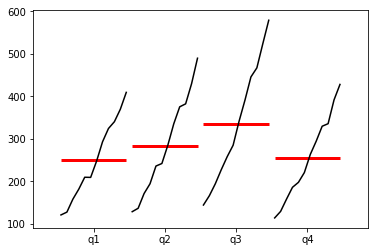

In [ ]:
dfq = df['Thousands of Passengers'].resample(rule='Q').mean()

quarter_plot(dfq);

Let's compare this to our nonseasonal <tt>macrodata.csv</tt> dataset:

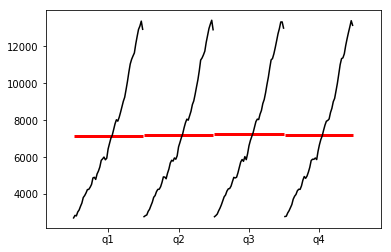

In [ ]:
df3 = pd.read_csv('../Data/macrodata.csv',index_col=0,parse_dates=True)
quarter_plot(df3['realgdp']);

# Choosing ARIMA Orders

* Goals
  * Understand PDQ terms for ARIMA (slides)
  * Understand how to choose orders manually from ACF and PACF
  * Understand how to use automatic order selection techniques using the functions below
  
Before we can apply an ARIMA forecasting model, we need to review the components of one.<br>
ARIMA, or Autoregressive Independent Moving Average is actually a combination of 3 models:
* <strong>AR(p)</strong> Autoregression - a regression model that utilizes the dependent relationship between a current observation and observations over a previous period.
* <strong>I(d)</strong> Integration - uses differencing of observations (subtracting an observation from an observation at the previous time step) in order to make the time series stationary
* <strong>MA(q)</strong> Moving Average - a model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt>
<strong>
<a href='https://www.alkaline-ml.com/pmdarima/user_guide.html#user-guide'>pmdarima.auto_arima</a></strong><font color=black>(y[,start_p,d,start_q, …])</font>&nbsp;&nbsp;&nbsp;Returns the optimal order for an ARIMA model<br>

<h3>Optional Function (see note below):</h3>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.stattools.arma_order_select_ic.html'>stattools.arma_order_select_ic</a></strong><font color=black>(y[, max_ar, …])</font>&nbsp;&nbsp;Returns information criteria for many ARMA models<br><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.x13.x13_arima_select_order.html'>x13.x13_arima_select_order</a></strong><font color=black>(endog[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Perform automatic seasonal ARIMA order identification using x12/x13 ARIMA</tt></div>

## Perform standard imports and load datasets

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load a non-stationary dataset
df1 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df1.index.freq = 'MS'

# Load a stationary dataset
df2 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df2.index.freq = 'D'

## pmdarima Auto-ARIMA
This is a third-party tool separate from statsmodels. It should already be installed if you're using our virtual environment. If not, then at a terminal run:<br>
&nbsp;&nbsp;&nbsp;&nbsp;<tt>pip install pmdarima</tt>

In [ ]:
from pmdarima import auto_arima

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
help(auto_arima)

Help on function auto_arima in module pmdarima.arima.auto:

auto_arima(y, exogenous=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1, D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=10, m=1, seasonal=True, stationary=False, information_criterion='aic', alpha=0.05, test='kpss', seasonal_test='ch', stepwise=True, n_jobs=1, start_params=None, trend=None, method=None, transparams=True, solver='lbfgs', maxiter=50, disp=0, callback=None, offset_test_args=None, seasonal_test_args=None, suppress_warnings=False, error_action='warn', trace=False, random=False, random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, scoring='mse', scoring_args=None, with_intercept=True, **fit_args)
    Automatically discover the optimal order for an ARIMA model.
    
    The ``auto_arima`` function seeks to identify the most optimal
    parameters for an ``ARIMA`` model, and returns a fitted ARIMA model. This
    function is based on the commonly-used R functio

Let's look first at the stationary, non-seasonal <strong>Daily Female Births</strong> dataset:

In [ ]:
auto_arima(df2['Births'])

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

<div class="alert alert-info"><strong>NOTE: </strong>Harmless warnings should have been suppressed, but if you see an error citing unusual behavior you can suppress this message by passing <font color=black><tt>error_action='ignore'</tt></font> into <tt>auto_arima()</tt>. Also, <font color=black><tt>auto_arima().summary()</tt></font> provides a nicely formatted summary table.</div>

In [ ]:
auto_arima(df2['Births'],error_action='ignore').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  365
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1226.077
Date:                Fri, 22 Mar 2019   AIC                           2460.154
Time:                        10:46:05   BIC                           2475.743
Sample:                             0   HQIC                          2466.350
                                - 365                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0132      0.014      0.975      0.330      -0.013       0.040
ar.L1          0.1299      0.059      2.217      0.027       0.015       0.245
ma.L1         -0.9694      0.016    -62.235      0.000      -1.000      -0.939
sigma2        48.9989      3.432     14.279      0.000      42.273      55.725
===================================================================================
Ljung-Box (Q):                       36.69   Jarque-Bera (JB):                26.17
Prob(Q):                              0.62   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.58
Prob(H) (two-sided):                  0.85   Kurtosis:                         3.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This shows a recommended (p,d,q) ARIMA Order of (1,1,1), with no seasonal_order component.

We can see how this was determined by looking at the stepwise results. The recommended order is the one with the lowest <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike information criterion</a> or AIC score. Note that the recommended model may <em>not</em> be the one with the closest fit. The AIC score takes complexity into account, and tries to identify the best <em>forecasting</em> model.

In [ ]:
stepwise_fit = auto_arima(df2['Births'], start_p=0, start_q=0,
                          max_p=6, max_q=3, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=2650.760, BIC=2658.555, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 0); AIC=2565.234, BIC=2576.925, Fit time=0.139 seconds
Fit ARIMA: order=(0, 1, 1); AIC=2463.584, BIC=2475.275, Fit time=0.047 seconds
Fit ARIMA: order=(1, 1, 1); AIC=2460.154, BIC=2475.742, Fit time=0.105 seconds
Fit ARIMA: order=(1, 1, 2); AIC=2460.515, BIC=2480.000, Fit time=0.320 seconds
Fit ARIMA: order=(2, 1, 2); AIC=2462.045, BIC=2485.428, Fit time=0.373 seconds
Fit ARIMA: order=(2, 1, 1); AIC=2461.271, BIC=2480.757, Fit time=0.169 seconds
Total fit time: 1.175 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  364
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1226.077
Method:                       css-mle   S.D. of innovations              7.000
Date:                Fri, 22 Mar 2019   AIC                           2460.154
Time:                        10:46:20   BIC                           2475.742
Sample:                             1   HQIC                          2466.350
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0152      0.014      1.068      0.286      -0.013       0.043
ar.L1.D.y      0.1299      0.056      2.334      0.020       0.021       0.239
ma.L1.D.y     -0.9694      0.019    -51.415      0.000      -1.006      -0.932
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            7.6996           +0.0000j            7.6996            0.0000
MA.1            1.0316           +0.0000j            1.0316            0.0000
-----------------------------------------------------------------------------
"""

___
Now let's look at the non-stationary, seasonal <strong>Airline Passengers</strong> dataset:

In [ ]:
stepwise_fit = auto_arima(df1['Thousands of Passengers'], start_p=1, start_q=1,
                          max_p=3, max_q=3, m=12,
                          start_P=0, seasonal=True,
                          d=None, D=1, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1024.824, BIC=1039.200, Fit time=0.574 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1033.479, BIC=1039.229, Fit time=0.000 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1022.316, BIC=1033.817, Fit time=0.294 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1022.904, BIC=1034.405, Fit time=0.251 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1022.343, BIC=1030.968, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=1021.142, BIC=1035.518, Fit time=0.748 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1016.960, BIC=1034.211, Fit time=2.258 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1033.371, BIC=1047.747, Fit time=1.931 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=1018.094, BIC=1038.221, Fit time=2.492 seconds
Fit ARIMA: order=(1, 1, 1) s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -502.480
Date:                            Fri, 22 Mar 2019   AIC                           1016.960
Time:                                    10:46:39   BIC                           1034.211
Sample:                                         0   HQIC                          1023.970
                                            - 144                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0045      0.178      0.025      0.980      -0.345       0.354
ar.L1         -0.3766      0.077     -4.890      0.000      -0.527      -0.226
ar.S.L12       0.6891      0.140      4.918      0.000       0.414       0.964
ar.S.L24       0.3091      0.107      2.883      0.004       0.099       0.519
ma.S.L12      -0.9742      0.511     -1.906      0.057      -1.976       0.028
sigma2       113.2075     48.855      2.317      0.020      17.453     208.961
===================================================================================
Ljung-Box (Q):                       58.67   Jarque-Bera (JB):                12.12
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               2.70   Skew:                             0.10
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.48
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## OPTIONAL: statsmodels ARMA_Order_Select_IC
Statsmodels has a selection tool to find orders for ARMA models on stationary data.

In [ ]:
from statsmodels.tsa.stattools import arma_order_select_ic

In [ ]:
help(arma_order_select_ic)

Help on function arma_order_select_ic in module statsmodels.tsa.stattools:

arma_order_select_ic(y, max_ar=4, max_ma=2, ic='bic', trend='c', model_kw={}, fit_kw={})
    Returns information criteria for many ARMA models
    
    Parameters
    ----------
    y : array-like
        Time-series data
    max_ar : int
        Maximum number of AR lags to use. Default 4.
    max_ma : int
        Maximum number of MA lags to use. Default 2.
    ic : str, list
        Information criteria to report. Either a single string or a list
        of different criteria is possible.
    trend : str
        The trend to use when fitting the ARMA models.
    model_kw : dict
        Keyword arguments to be passed to the ``ARMA`` model
    fit_kw : dict
        Keyword arguments to be passed to ``ARMA.fit``.
    
    Returns
    -------
    obj : Results object
        Each ic is an attribute with a DataFrame for the results. The AR order
        used is the row index. The ma order used is the column index

In [ ]:
arma_order_select_ic(df2['Births'])

{'bic':              0            1            2
 0  2502.581666  2494.238827  2494.731525
 1  2490.780306  2484.505386          NaN
 2  2491.963234  2485.782753  2491.097206
 3  2496.498618  2491.061564  2496.961178
 4  2501.491891  2504.012579  2498.329743, 'bic_min_order': (1, 1)}

In [ ]:
arma_order_select_ic(df1['Thousands of Passengers'])

{'bic':              0            1            2
 0  1796.307207  1627.771967  1534.002384
 1  1437.088819  1421.627524  1425.899321
 2  1425.518037  1423.098290          NaN
 3  1425.191373          NaN  1400.744437
 4  1427.576572          NaN  1414.310652, 'bic_min_order': (3, 2)}

<div class="alert alert-success"><strong>A note about <tt>statsmodels.tsa.x13.x13_arima_select_order</tt></strong><br><br>
This utility requires installation of <strong>X-13ARIMA-SEATS</strong>, a seasonal adjustment tool developed by the U.S. Census Bureau.<br>
See <a href='https://www.census.gov/srd/www/x13as/'>https://www.census.gov/srd/www/x13as/</a> for details. Since the installation requires adding x13as to your PATH settings we've deemed it beyond the scope of this course.

# ARMA(p,q) and ARIMA(p,d,q)
# Autoregressive Moving Averages
This section covers <em>Autoregressive Moving Averages</em> (ARMA) and <em>Autoregressive Integrated Moving Averages</em> (ARIMA).

Recall that an <strong>AR(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \varepsilon_{t}$

while an <strong>MA(1)</strong> model follows the formula

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = \mu + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

where $c$ is a constant, $\mu$ is the expectation of $y_{t}$ (often assumed to be zero), $\phi_1$ (phi-sub-one) is the AR lag coefficient, $\theta_1$ (theta-sub-one) is the MA lag coefficient, and $\varepsilon$ (epsilon) is white noise.

An <strong>ARMA(1,1)</strong> model therefore follows

&nbsp;&nbsp;&nbsp;&nbsp;$y_{t} = c + \phi_{1}y_{t-1} + \theta_{1}\varepsilon_{t-1} + \varepsilon_{t}$

ARMA models can be used on stationary datasets.

For non-stationary datasets with a trend component, ARIMA models apply a differencing coefficient as well.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMA.html'>arima_model.ARMA</a></strong><font color=black>(endog, order[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Autoregressive Moving Average ARMA(p,q) model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARMAResults.html'>arima_model.ARMAResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;Class to hold results from fitting an ARMA model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMA.html'>arima_model.ARIMA</a></strong><font color=black>(endog, order[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;Autoregressive Integrated Moving Average ARIMA(p,d,q) model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.html'>arima_model.ARIMAResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;Class to hold results from fitting an ARIMA model<br>	
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.kalmanf.kalmanfilter.KalmanFilter.html'>kalmanf.kalmanfilter.KalmanFilter</a></strong>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Kalman Filter code intended for use with the ARMA model</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model'>Wikipedia</a></strong>&nbsp;&nbsp;<font color=black>Autoregressive–moving-average model</font><br>
<strong>
<a href='https://otexts.com/fpp2/non-seasonal-arima.html'>Forecasting: Principles and Practice</a></strong>&nbsp;&nbsp;<font color=black>Non-seasonal ARIMA models</font></div>

## Perform standard imports and load datasets

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df1 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df1.index.freq = 'D'
df1 = df1[:120]  # we only want the first four months

df2 = pd.read_csv('../Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df2.index.freq='MS'

## Automate the augmented Dickey-Fuller Test
Since we'll be using it a lot to determine if an incoming time series is stationary, let's write a function that performs the augmented Dickey-Fuller Test.

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

___
## Autoregressive Moving Average - ARMA(p,q)
In this first section we'll look at a stationary dataset, determine (p,q) orders, and run a forecasting ARMA model fit to the data. In practice it's rare to find stationary data with no trend or seasonal component, but the first four months of the <em>Daily Total Female Births</em> dataset should work for our purposes.
### Plot the source data

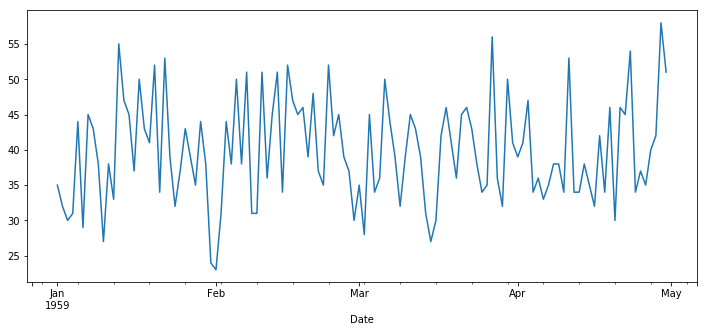

In [ ]:
df1['Births'].plot(figsize=(12,5));

### Run the augmented Dickey-Fuller Test to confirm stationarity

In [ ]:
adf_test(df1['Births'])

Augmented Dickey-Fuller Test: None
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Determine the (p,q) ARMA Orders using <tt>pmdarima.auto_arima</tt>
This tool should give just $p$ and $q$ value recommendations for this dataset.

In [ ]:
auto_arima(df1['Births'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Sat, 23 Mar 2019   AIC                            822.741
Time:                        12:02:45   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8162      0.108    368.841      0.000      39.605      40.028
ar.L1.y        1.8568      0.081     22.933      0.000       1.698       2.016
ar.L2.y       -0.8814      0.073    -12.030      0.000      -1.025      -0.738
ma.L1.y       -1.8634      0.109    -17.126      0.000      -2.077      -1.650
ma.L2.y        0.8634      0.108      8.020      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1582j            1.0652           -0.0237
AR.2            1.0533           +0.1582j            1.0652            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1583           +0.0000j            1.1583            0.0000
-----------------------------------------------------------------------------
"""

### Split the data into train/test sets
As a general rule you should set the length of your test set equal to your intended forecast size. For this dataset we'll attempt a 1-month forecast.

In [ ]:
# Set one month for testing
train = df1.iloc[:90]
test = df1.iloc[90:]

### Fit an ARMA(p,q) Model
If you want you can run <tt>help(ARMA)</tt> to learn what incoming arguments are available/expected, and what's being returned.

In [ ]:
model = ARMA(train['Births'],order=(2,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Sat, 23 Mar 2019   AIC                            627.809
Time:                        12:08:30   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

### Obtain a month's worth of predicted values

In [ ]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

### Plot predictions against known values

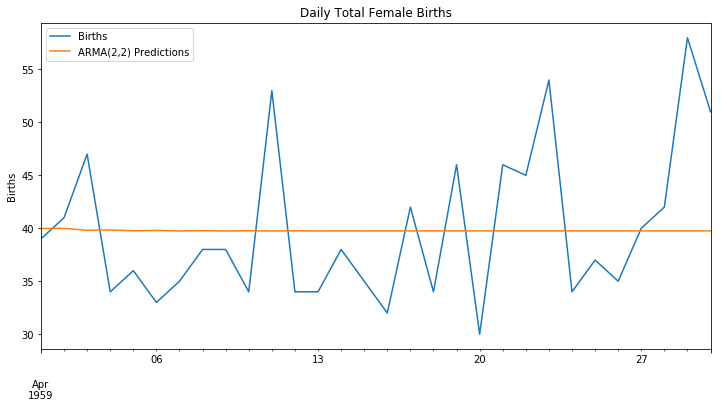

In [ ]:
title = 'Daily Total Female Births'
ylabel='Births'
xlabel='' # we don't really need a label here

ax = test['Births'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Since our starting dataset exhibited no trend or seasonal component, this prediction makes sense. In the next section we'll take additional steps to evaluate the performance of our predictions, and forecast into the future.

___
## Autoregressive Integrated Moving Average - ARIMA(p,d,q)
The steps are the same as for ARMA(p,q), except that we'll apply a differencing component to make the dataset stationary.<br>
First let's take a look at the <em>Real Manufacturing and Trade Inventories</em> dataset.
### Plot the Source Data

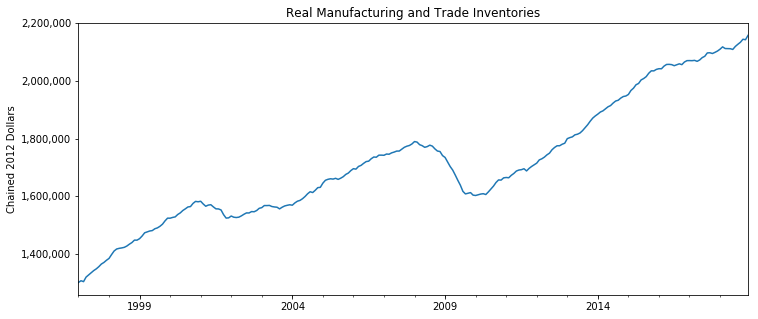

In [ ]:
# HERE'S A TRICK TO ADD COMMAS TO Y-AXIS TICK VALUES
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df2['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### Run an ETS Decomposition (optional)
We probably won't learn a lot from it, but it never hurts to run an ETS Decomposition plot.

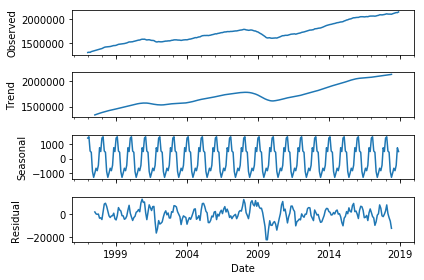

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df2['Inventories'], model='additive')  # model='add' also works
result.plot();

Here we see that the seasonal component does not contribute significantly to the behavior of the series.
### Use <tt>pmdarima.auto_arima</tt> to determine ARIMA Orders

In [ ]:
auto_arima(df2['Inventories'],seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.258
Date:                Sat, 23 Mar 2019   AIC                           5228.505
Time:                        12:18:53   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3472.9857   1313.669      2.644      0.009     898.241    6047.731
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

This suggests that we should fit an ARIMA(1,1,1) model to best forecast future values of the series. Before we train the model, let's look at augmented Dickey-Fuller Test, and the ACF/PACF plots to see if they agree. These steps are optional, and we would likely skip them in practice.

### Run the augmented Dickey-Fuller Test on the First Difference

In [ ]:
from statsmodels.tsa.statespace.tools import diff
df2['d1'] = diff(df2['Inventories'],k_diff=1)

# Equivalent to:
# df1['d1'] = df1['Inventories'] - df1['Inventories'].shift(1)

adf_test(df2['d1'],'Real Manufacturing and Trade Inventories')

Augmented Dickey-Fuller Test: Real Manufacturing and Trade Inventories
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


This confirms that we reached stationarity after the first difference.
### Run the ACF and PACF plots
A <strong>PACF Plot</strong> can reveal recommended AR(p) orders, and an <strong>ACF Plot</strong> can do the same for MA(q) orders.<br>
Alternatively, we can compare the stepwise <a href='https://en.wikipedia.org/wiki/Akaike_information_criterion'>Akaike Information Criterion (AIC)</a> values across a set of different (p,q) combinations to choose the best combination.

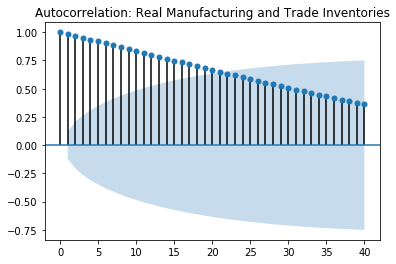

In [ ]:
title = 'Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_acf(df2['Inventories'],title=title,lags=lags);

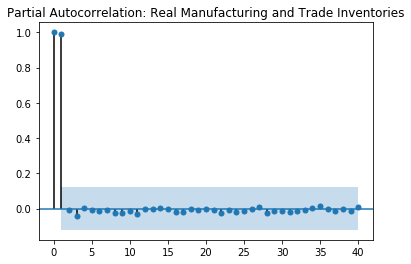

In [ ]:
title = 'Partial Autocorrelation: Real Manufacturing and Trade Inventories'
lags = 40
plot_pacf(df2['Inventories'],title=title,lags=lags);

This tells us that the AR component should be more important than MA. From the <a href='https://people.duke.edu/~rnau/411arim3.htm'>Duke University Statistical Forecasting site</a>:<br>
> <em>If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we    say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more    easily by adding AR terms than by adding MA terms.</em><br>

Let's take a look at <tt>pmdarima.auto_arima</tt> done stepwise to see if having $p$ and $q$ terms the same still makes sense:

In [ ]:
stepwise_fit = auto_arima(df2['Inventories'], start_p=0, start_q=0,
                          max_p=2, max_q=2, m=12,
                          seasonal=False,
                          d=None, trace=True,
                          error_action='ignore',   # we don't want to know if an order does not work
                          suppress_warnings=True,  # we don't want convergence warnings
                          stepwise=True)           # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.004 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.050 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.811, Fit time=0.020 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.100 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.528, BIC=5247.389, Fit time=0.104 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.505, BIC=5242.794, Fit time=0.109 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.157 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 0.563 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.252
Method:                       css-mle   S.D. of innovations           4938.258
Date:                Sat, 23 Mar 2019   AIC                           5228.505
Time:                        12:19:52   BIC                           5242.794
Sample:                             1   HQIC                          5234.247
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3472.9857   1313.669      2.644      0.009     898.241    6047.731
ar.L1.D.y      0.9037      0.039     23.414      0.000       0.828       0.979
ma.L1.D.y     -0.5732      0.076     -7.545      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1065           +0.0000j            1.1065            0.0000
MA.1            1.7446           +0.0000j            1.7446            0.0000
-----------------------------------------------------------------------------
"""

Looks good from here! Now let's train & test the ARIMA(1,1,1) model, evaluate it, then produce a forecast of future values.
### Split the data into train/test sets

In [ ]:
len(df2)

264

In [ ]:
# Set one year for testing
train = df2.iloc[:252]
test = df2.iloc[252:]

### Fit an ARIMA(1,1,1) Model

In [ ]:
model = ARIMA(train['Inventories'],order=(1,1,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Sat, 23 Mar 2019   AIC                           4980.790
Time:                        12:20:09   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.871      2.378      0.018     561.671    5833.468
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('ARIMA(1,1,1) Predictions')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

For more information on these arguments visit https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [ ]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['Inventories'][i]}")

predicted=2107148.333, expected=2110158
predicted=2110526.201, expected=2118199
predicted=2113886.499, expected=2112427
predicted=2117230.941, expected=2112276
predicted=2120561.071, expected=2111835
predicted=2123878.284, expected=2109298
predicted=2127183.839, expected=2119618
predicted=2130478.871, expected=2127170
predicted=2133764.405, expected=2134172
predicted=2137041.369, expected=2144639
predicted=2140310.596, expected=2143001
predicted=2143572.84 , expected=2158115


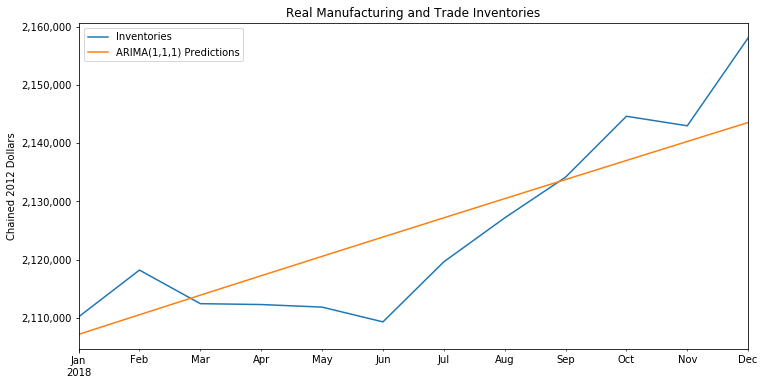

In [ ]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = test['Inventories'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

### Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) MSE Error: {error:11.10}')

ARIMA(1,1,1) MSE Error: 60677824.72


In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Inventories'], predictions)
print(f'ARIMA(1,1,1) RMSE Error: {error:11.10}')

ARIMA(1,1,1) RMSE Error: 7789.597212


### Retrain the model on the full data, and forecast the future

In [ ]:
model = ARIMA(df2['Inventories'],order=(1,1,1))
results = model.fit()
fcast = results.predict(len(df2),len(df2)+11,typ='levels').rename('ARIMA(1,1,1) Forecast')

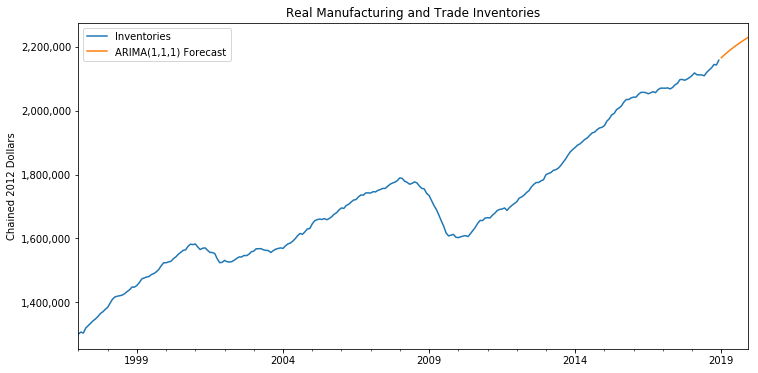

In [ ]:
# Plot predictions against known values
title = 'Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df2['Inventories'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

# SARIMA(p,d,q)(P,D,Q)m
# Seasonal Autoregressive Integrated Moving Averages
We have finally reached one of the most fascinating aspects of time series analysis: seasonality.

Where ARIMA accepts the parameters $(p,d,q)$, SARIMA accepts an <em>additional</em> set of parameters $(P,D,Q)m$ that specifically describe the seasonal components of the model. Here $P$, $D$ and $Q$ represent the seasonal regression, differencing and moving average coefficients, and $m$ represents the number of data points (rows) in each seasonal cycle.

<strong>NOTE:</strong> The statsmodels implementation of SARIMA is called SARIMAX. The “X” added to the name means that the function also supports <em>exogenous</em> regressor variables. We'll cover these in the next section.


<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=black>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=black>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/statespace.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis by State Space Methods</font></div>

## Perform standard imports and load datasets

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('../Data/co2_mm_mlo.csv')

### Inspect the data, create a DatetimeIndex

In [ ]:
df.head()

year  month  decimal_date  average  interpolated
0  1958      3      1958.208   315.71        315.71
1  1958      4      1958.292   317.45        317.45
2  1958      5      1958.375   317.50        317.50
3  1958      6      1958.458      NaN        317.10
4  1958      7      1958.542   315.86        315.86

We need to combine two integer columns (year and month) into a DatetimeIndex. We can do this by passing a dictionary into <tt>pandas.to_datetime()</tt> with year, month and day values.<br>
For more information visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

In [ ]:
# Add a "date" datetime column
df['date']=pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

In [ ]:
# Set "date" to be the index
df.set_index('date',inplace=True)
df.index.freq = 'MS'
df.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

### Plot the source data

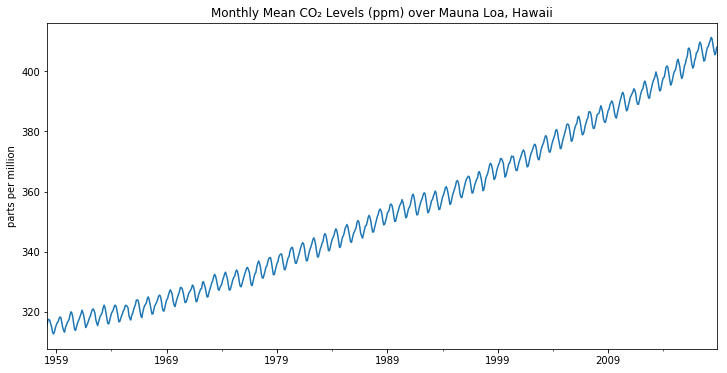

In [ ]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel='' # we don't really need a label here

ax = df['interpolated'].plot(figsize=(12,6),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Run an ETS Decomposition

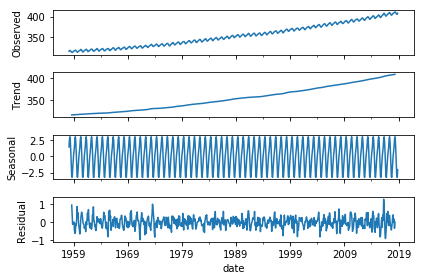

In [ ]:
result = seasonal_decompose(df['interpolated'], model='add')
result.plot();

Although small in scale compared to the overall values, there is a definite annual seasonality.

### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot more combinations to evaluate.

In [ ]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df['interpolated'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 3)x(1, 0, 1, 12)   Log Likelihood                -203.092
Date:                            Wed, 03 Apr 2019   AIC                            420.183
Time:                                    17:49:04   BIC                            452.315
Sample:                                         0   HQIC                           432.582
                                            - 729                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0009      0.001      1.449      0.147      -0.000       0.002
ma.L1         -0.3577      0.037     -9.728      0.000      -0.430      -0.286
ma.L2         -0.0310      0.038     -0.813      0.416      -0.106       0.044
ma.L3         -0.0865      0.037     -2.349      0.019      -0.159      -0.014
ar.S.L12       0.9994      0.000   2999.488      0.000       0.999       1.000
ma.S.L12      -0.8695      0.021    -42.160      0.000      -0.910      -0.829
sigma2         0.0958      0.005     20.352      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       45.20   Jarque-Bera (JB):                 4.09
Prob(Q):                              0.26   Prob(JB):                         0.13
Heteroskedasticity (H):               1.11   Skew:                             0.01
Prob(H) (two-sided):                  0.40   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Excellent! This provides an ARIMA Order of (0,1,3) combined with a seasonal order of (1,0,1,12) Now let's train & test the SARIMA(0,1,3)(1,0,1,12) model, evaluate it, then produce a forecast of future values.
### Split the data into train/test sets

In [ ]:
len(df)

729

In [ ]:
# Set one year for testing
train = df.iloc[:717]
test = df.iloc[717:]

### Fit a SARIMA(0,1,3)(1,0,1,12) Model

In [ ]:
model = SARIMAX(train['interpolated'],order=(0,1,3),seasonal_order=(1,0,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 3)x(1, 0, 1, 12)   Log Likelihood                -201.201
Date:                            Wed, 03 Apr 2019   AIC                            414.402
Time:                                    17:49:12   BIC                            441.845
Sample:                                03-01-1958   HQIC                           424.999
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3543      0.035    -10.200      0.000      -0.422      -0.286
ma.L2         -0.0244      0.038     -0.648      0.517      -0.098       0.050
ma.L3         -0.0866      0.032     -2.686      0.007      -0.150      -0.023
ar.S.L12       0.9997      0.000   3239.477      0.000       0.999       1.000
ma.S.L12      -0.8680      0.022    -38.921      0.000      -0.912      -0.824
sigma2         0.0949      0.005     20.315      0.000       0.086       0.104
===================================================================================
Ljung-Box (Q):                       43.96   Jarque-Bera (JB):                 4.45
Prob(Q):                              0.31   Prob(JB):                         0.11
Heteroskedasticity (H):               1.15   Skew:                             0.02
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Predictions')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

Passing <tt>typ='levels'</tt> predicts the levels of the original endogenous variables. If we'd used the default <tt>typ='linear'</tt> we would have seen linear predictions in terms of the differenced endogenous variables.

For more information on these arguments visit https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

In [ ]:
# Compare predictions to expected values
for i in range(len(predictions)):
    print(f"predicted={predictions[i]:<11.10}, expected={test['interpolated'][i]}")

predicted=406.6094505, expected=406.81
predicted=407.8239343, expected=407.96
predicted=408.578265 , expected=408.32
predicted=409.4831633, expected=409.41
predicted=411.036772 , expected=410.24
predicted=411.6394325, expected=411.24
predicted=410.8612658, expected=410.79
predicted=409.1726191, expected=408.71
predicted=407.0722543, expected=406.99
predicted=405.6214644, expected=405.51
predicted=405.8902221, expected=406.0
predicted=407.4224706, expected=408.02


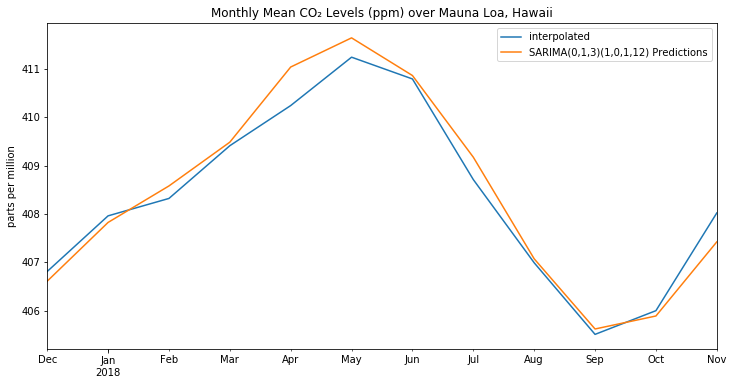

In [ ]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = test['interpolated'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

### Evaluate the Model

In [ ]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['interpolated'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) MSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) MSE Error: 0.1277131368


In [ ]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['interpolated'], predictions)
print(f'SARIMA(0,1,3)(1,0,1,12) RMSE Error: {error:11.10}')

SARIMA(0,1,3)(1,0,1,12) RMSE Error: 0.357369748


These are outstanding results!
### Retrain the model on the full data, and forecast the future

In [ ]:
model = SARIMAX(df['interpolated'],order=(0,1,3),seasonal_order=(1,0,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(0,1,3)(1,0,1,12) Forecast')

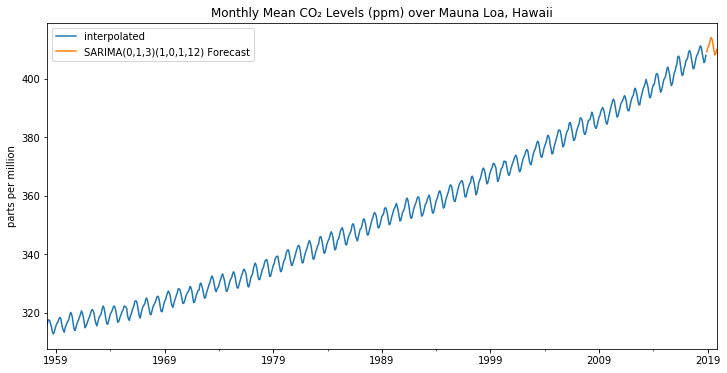

In [ ]:
# Plot predictions against known values
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='parts per million'
xlabel=''

ax = df['interpolated'].plot(legend=True,figsize=(12,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

# SARIMAX

## Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
So far the models we've looked at consider past values of a dataset and past errors to determine future trends, seasonality and forecasted values. We look now to models that encompass these non-seasonal (p,d,q) and seasonal (P,D,Q,m) factors, but introduce the idea that external factors (environmental, economic, etc.) can also influence a time series, and be used in forecasting.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html'>sarimax.SARIMAX</a></strong><font color=black>(endog[, exog, order, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>sarimax.SARIMAXResults</a></strong><font color=black>(model, params, …[, …])</font>&nbsp;&nbsp;Class to hold results from fitting a SARIMAX model.</tt>

<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/statespace.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis by State Space Methods</font><br>
<strong>
<a href='https://www.statsmodels.org/devel/examples/notebooks/generated/statespace_sarimax_stata.html'>Statsmodels Example:</a></strong>&nbsp;&nbsp;<font color=black>SARIMAX</font></div>

## Perform standard imports and load datasets

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'

### Inspect the data
For this section we've built a Restaurant Visitors dataset that was inspired by a <a href='https://www.kaggle.com/c/recruit-restaurant-visitor-forecasting'>recent Kaggle competition</a>. The data considers daily visitors to four restaurants located in the United States, subject to American holidays. For the exogenous variable we'll see how holidays affect patronage. The dataset contains 478 days of restaurant data, plus an additional 39 days of holiday data for forecasting purposes.

In [ ]:
df.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day   65.0   25.0   67.0  139.0   
2016-01-02  Saturday        0              na   24.0   39.0   43.0   85.0   
2016-01-03    Sunday        0              na   24.0   31.0   66.0   81.0   
2016-01-04    Monday        0              na   23.0   18.0   32.0   32.0   
2016-01-05   Tuesday        0              na    2.0   15.0   38.0   43.0   

            total  
date               
2016-01-01  296.0  
2016-01-02  191.0  
2016-01-03  202.0  
2016-01-04  105.0  
2016-01-05   98.0

Notice that even though the restaurant visitor columns contain integer data, they appear as floats. This is because the bottom of the dataframe has 39 rows of NaN data to accommodate the extra holiday data we'll use for forecasting, and pandas won't allow NaN's as integers. We could leave it like this, but since we have to drop NaN values anyway, let's also convert the columns to dtype int64.

In [ ]:
df.tail()

weekday  holiday  holiday_name  rest1  rest2  rest3  rest4  \
date                                                                       
2017-05-27   Saturday        0            na    NaN    NaN    NaN    NaN   
2017-05-28     Sunday        0            na    NaN    NaN    NaN    NaN   
2017-05-29     Monday        1  Memorial Day    NaN    NaN    NaN    NaN   
2017-05-30    Tuesday        0            na    NaN    NaN    NaN    NaN   
2017-05-31  Wednesday        0            na    NaN    NaN    NaN    NaN   

            total  
date               
2017-05-27    NaN  
2017-05-28    NaN  
2017-05-29    NaN  
2017-05-30    NaN  
2017-05-31    NaN

In [ ]:
df1 = df.dropna()
df1.tail()

weekday  holiday holiday_name  rest1  rest2  rest3  rest4  total
date                                                                          
2017-04-18    Tuesday        0           na   30.0   30.0   13.0   18.0   91.0
2017-04-19  Wednesday        0           na   20.0   11.0   30.0   18.0   79.0
2017-04-20   Thursday        0           na   22.0    3.0   19.0   46.0   90.0
2017-04-21     Friday        0           na   38.0   53.0   36.0   38.0  165.0
2017-04-22   Saturday        0           na   97.0   20.0   50.0   59.0  226.0

In [ ]:
# Change the dtype of selected columns
cols = ['rest1','rest2','rest3','rest4','total']
for col in cols:
    df1[col] = df1[col].astype(int)
df1.head()

weekday  holiday    holiday_name  rest1  rest2  rest3  rest4  \
date                                                                        
2016-01-01    Friday        1  New Year's Day     65     25     67    139   
2016-01-02  Saturday        0              na     24     39     43     85   
2016-01-03    Sunday        0              na     24     31     66     81   
2016-01-04    Monday        0              na     23     18     32     32   
2016-01-05   Tuesday        0              na      2     15     38     43   

            total  
date               
2016-01-01    296  
2016-01-02    191  
2016-01-03    202  
2016-01-04    105  
2016-01-05     98

### Plot the source data

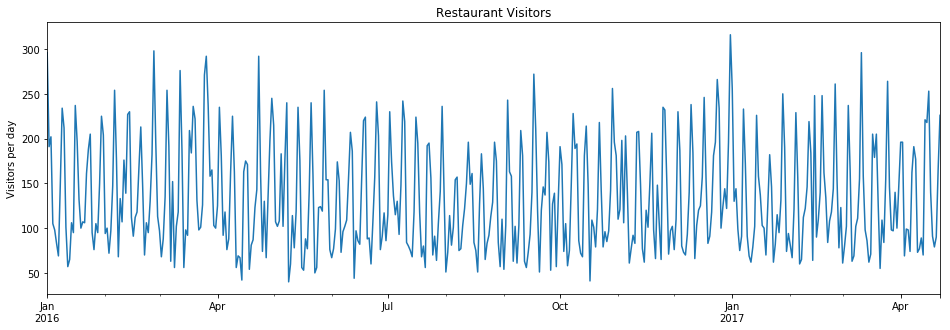

In [ ]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='' # we don't really need a label here

ax = df1['total'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Look at holidays
Rather than prepare a separate plot, we can use matplotlib to shade holidays behind our restaurant data.

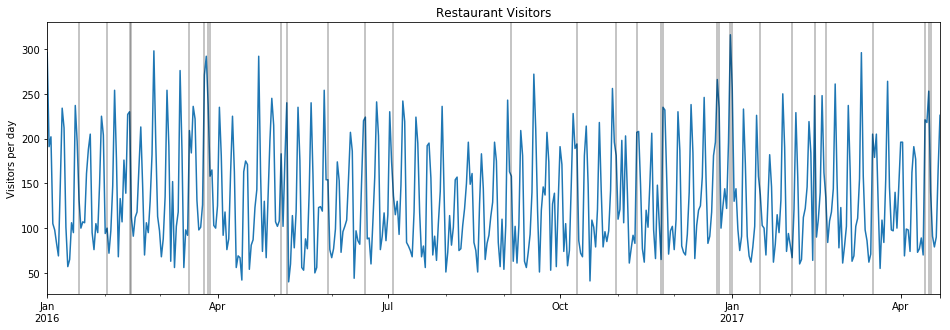

In [ ]:
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel='' # we don't really need a label here

ax = df1['total'].plot(figsize=(16,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df1.query('holiday==1').index:       # for days where holiday == 1
    ax.axvline(x=x, color='k', alpha = 0.3);  # add a semi-transparent grey line

### Run an ETS Decomposition

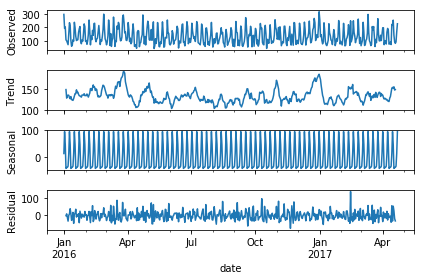

In [ ]:
result = seasonal_decompose(df1['total'])
result.plot();

## Test for stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df1['total'])

Augmented Dickey-Fuller Test: 
ADF test statistic       -5.592497
p-value                   0.000001
# lags used              18.000000
# observations          459.000000
critical value (1%)      -3.444677
critical value (5%)      -2.867857
critical value (10%)     -2.570135
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


### Run <tt>pmdarima.auto_arima</tt> to obtain recommended orders
This may take awhile as there are a lot of combinations to evaluate.

In [ ]:
# For SARIMA Orders we set seasonal=True and pass in an m value
auto_arima(df1['total'],seasonal=True,m=7).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2417.721
Date:                           Wed, 03 Apr 2019   AIC                           4845.442
Time:                                   17:52:06   BIC                           4866.290
Sample:                                        0   HQIC                          4853.638
                                           - 478                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     20.5662      4.363      4.714      0.000      12.015      29.118
ar.L1          0.1897      0.045      4.221      0.000       0.102       0.278
ar.S.L7        0.4258      0.037     11.606      0.000       0.354       0.498
ar.S.L14       0.3873      0.036     10.734      0.000       0.317       0.458
sigma2      1427.3967     86.679     16.468      0.000    1257.510    1597.283
===================================================================================
Ljung-Box (Q):                       77.20   Jarque-Bera (JB):                27.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                             0.47
Prob(H) (two-sided):                  0.18   Kurtosis:                         3.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Excellent! This provides an ARIMA Order of (1,0,0) and a seasonal order of (2,0,0,7) Now let's train & test the SARIMA model, evaluate it, then compare the result to a model that uses an exogenous variable.
### Split the data into train/test sets
We'll assign 42 days (6 weeks) to the test set so that it includes several holidays.

In [ ]:
len(df1)

478

In [ ]:
# Set four weeks for testing
train = df1.iloc[:436]
test = df1.iloc[436:]

### Fit a SARIMA(1,0,0)(2,0,0,7) Model
NOTE: To avoid a <tt>ValueError: non-invertible starting MA parameters found</tt> we're going to set <tt>enforce_invertibility</tt> to False.

In [ ]:
model = SARIMAX(train['total'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Wed, 03 Apr 2019   AIC                           4457.403
Time:                                   17:52:35   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (Q):                       83.96   Jarque-Bera (JB):                29.23
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False).rename('SARIMA(1,0,0)(2,0,0,7) Predictions')

Passing <tt>dynamic=False</tt> means that forecasts at each point are generated using the full history up to that point (all lagged values).

For more information on these arguments visit https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima_model.ARIMAResults.predict.html

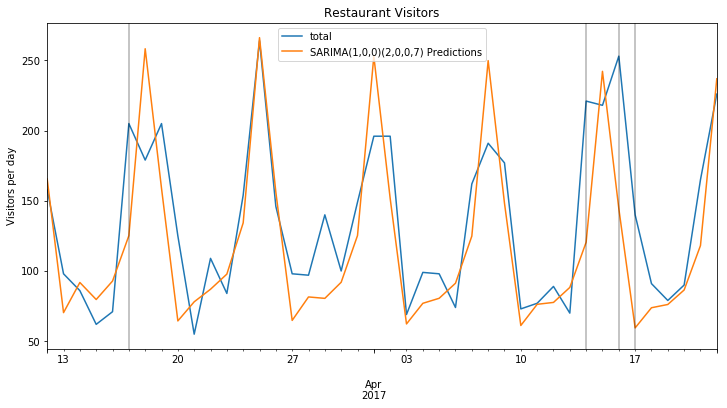

In [ ]:
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

### Evaluate the Model

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse

error1 = mse(test['total'], predictions)
error2 = rmse(test['total'], predictions)

print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2:11.10}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 1702.647958
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 41.26315497


## Now add the exog variable

In [ ]:
model = SARIMAX(train['total'],exog=train['holiday'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2158.482
Date:                           Wed, 03 Apr 2019   AIC                           4326.963
Time:                                   17:53:20   BIC                           4347.352
Sample:                               01-01-2016   HQIC                          4335.010
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       66.8897      4.241     15.774      0.000      58.578      75.201
ar.L1          0.2145      0.049      4.375      0.000       0.118       0.311
ar.S.L7        0.5147      0.042     12.312      0.000       0.433       0.597
ar.S.L14       0.4575      0.042     10.997      0.000       0.376       0.539
sigma2      1117.3977     73.302     15.244      0.000     973.729    1261.066
===================================================================================
Ljung-Box (Q):                      100.96   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               0.91   Skew:                             0.11
Prob(H) (two-sided):                  0.58   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Predictions')

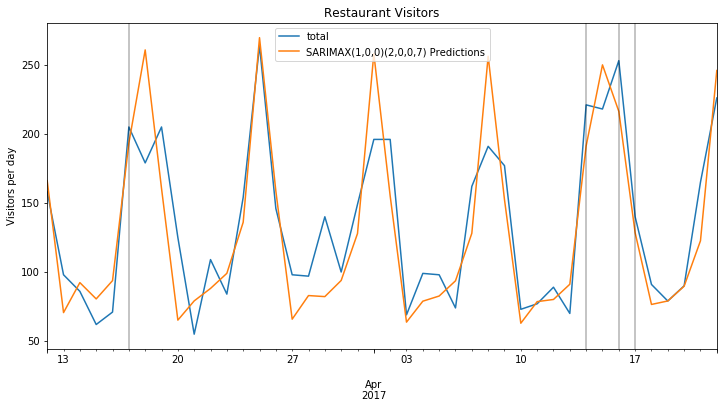

In [ ]:
# Plot predictions against known values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = test['total'].plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

We can see that the exogenous variable (holidays) had a positive impact on the forecast by raising predicted values at 3/17, 4/14, 4/16 and 4/17! Let's compare evaluations:
### Evaluate the Model

In [ ]:
# Print values from SARIMA above
print(f'SARIMA(1,0,0)(2,0,0,7) MSE Error: {error1:11.10}')
print(f'SARIMA(1,0,0)(2,0,0,7) RMSE Error: {error2:11.10}')
print()

error1x = mse(test['total'], predictions)
error2x = rmse(test['total'], predictions)

# Print new SARIMAX values
print(f'SARIMAX(1,0,0)(2,0,0,7) MSE Error: {error1x:11.10}')
print(f'SARIMAX(1,0,0)(2,0,0,7) RMSE Error: {error2x:11.10}')

SARIMA(1,0,0)(2,0,0,7) MSE Error: 1702.647958
SARIMA(1,0,0)(2,0,0,7) RMSE Error: 41.26315497

SARIMAX(1,0,0)(2,0,0,7) MSE Error: 950.6656518
SARIMAX(1,0,0)(2,0,0,7) RMSE Error: 30.83286642


### Retrain the model on the full data, and forecast the future
We're going to forecast 39 days into the future, and use the additional holiday data

In [ ]:
model = SARIMAX(df1['total'],exog=df1['holiday'],order=(1,0,0),seasonal_order=(2,0,0,7),enforce_invertibility=False)
results = model.fit()
exog_forecast = df[478:][['holiday']]
fcast = results.predict(len(df1),len(df1)+38,exog=exog_forecast).rename('SARIMAX(1,0,0)(2,0,0,7) Forecast')

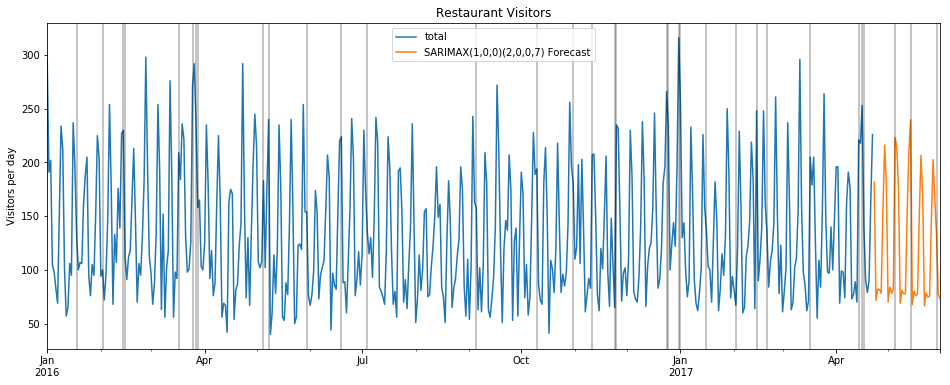

In [ ]:
# Plot the forecast alongside historical values
title='Restaurant Visitors'
ylabel='Visitors per day'
xlabel=''

ax = df1['total'].plot(legend=True,figsize=(16,6),title=title)
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
for x in df.query('holiday==1').index: 
    ax.axvline(x=x, color='k', alpha = 0.3);

# VAR(p)
## Vector Autoregression
In our previous SARIMAX example, the forecast variable $y_t$ was influenced by the exogenous predictor variable, but not vice versa. That is, the occurrence of a holiday affected restaurant patronage but not the other way around.

However, there are some cases where variables affect each other. <a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice</a> describes a case where changes in personal consumption expenditures $C_t$ were forecast based on changes in personal disposable income $I_t$.
> However, in this case a bi-directional relationship may be more suitable: an increase in $I_t$ will lead to an increase in $C_t$ and vice versa.<br>An example of such a situation occurred in Australia during the Global Financial Crisis of 2008–2009. The Australian government issued stimulus packages that included cash payments in December 2008, just in time for Christmas spending. As a result, retailers reported strong sales and the economy was stimulated. Consequently, incomes increased.

Aside from investigating multivariate time series, vector autoregression is used for
* <a href='https://www.statsmodels.org/devel/vector_ar.html#impulse-response-analysis'>Impulse Response Analysis</a> which involves the response of one variable to a sudden but temporary change in another variable
* <a href='https://www.statsmodels.org/devel/vector_ar.html#forecast-error-variance-decomposition-fevd'>Forecast Error Variance Decomposition (FEVD)</a> where the proportion of the forecast variance of one variable is attributed to the effect of other variables
* <a href='https://www.statsmodels.org/devel/vector_ar.html#dynamic-vector-autoregressions'>Dynamic Vector Autoregressions</a> used for estimating a moving-window regression for the purposes of making forecasts throughout the data sample

### Formulation
We've seen that an autoregression AR(p) model is described by the following:

&nbsp;&nbsp;&nbsp;&nbsp; $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

A $K$-dimensional VAR model of order $p$, denoted <strong>VAR(p)</strong>, considers each variable $y_K$ in the system.<br>

For example, The system of equations for a 2-dimensional VAR(1) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

where the coefficient $\phi_{ii,l}$ captures the influence of the $l$th lag of variable $y_i$ on itself,<br>
the coefficient $\phi_{ij,l}$ captures the influence of the $l$th lag of variable $y_j$ on $y_i$,<br>
and $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are white noise processes that may be correlated.<br>

Carrying this further, the system of equations for a 2-dimensional VAR(3) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{11,3}y_{1,t-3} + \phi_{12,3}y_{2,t-3} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{21,3}y_{1,t-3} + \phi_{22,3}y_{2,t-3} + \varepsilon_{2,t}$<br><br>

and the system of equations for a 3-dimensional VAR(2) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{13,1}y_{3,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{13,2}y_{3,t-2} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{23,1}y_{3,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{23,2}y_{3,t-2} + \varepsilon_{2,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{3,t} = c_3 + \phi_{31,1}y_{1,t-1} + \phi_{32,1}y_{2,t-1} + \phi_{33,1}y_{3,t-1} + \phi_{31,2}y_{1,t-2} + \phi_{32,2}y_{2,t-2} + \phi_{33,2}y_{3,t-2} + \varepsilon_{3,t}$<br><br>

The general steps involved in building a VAR model are:
* Examine the data
* Visualize the data
* Test for stationarity
* If necessary, transform the data to make it stationary
* Select the appropriate order <em>p</em>
* Instantiate the model and fit it to a training set
* If necessary, invert the earlier transformation
* Evaluate model predictions against a known test set
* Forecast the future

Recall that to fit a SARIMAX model we passed one field of data as our <em>endog</em> variable, and another for <em>exog</em>. With VAR, both fields will be passed in as <em>endog</em>.

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VAR.html'>vector_ar.var_model.VAR</a></strong><font color=black>(endog[, exog, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Fit VAR(p) process and do lag order selection<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.var_model.VARResults.html'>vector_ar.var_model.VARResults</a></strong><font color=black>(endog, …[, …])</font>&nbsp;&nbsp;Estimate VAR(p) process with fixed number of lags<br>
<strong><a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.vector_ar.dynamic.DynamicVAR.html'>vector_ar.dynamic.DynamicVAR</a></strong><font color=black>(data[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Estimates time-varying vector autoregression (VAR(p)) using equation-by-equation least squares</tt>
   
<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/vector_ar.html'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregressions</font><br>
<strong>
<a href='https://en.wikipedia.org/wiki/Vector_autoregression'>Wikipedia:</a></strong>&nbsp;&nbsp;<font color=black>Vector Autoregression</font>
</div>

### Perform standard imports and load dataset
For this analysis we'll also compare money to spending. We'll look at the M2 Money Stock which is a measure of U.S. personal assets, and U.S. personal spending. Both datasets are in billions of dollars, monthly, seasonally adjusted. They span the 21 years from January 1995 to December 2015 (252 records).<br>
Sources: https://fred.stlouisfed.org/series/M2SL https://fred.stlouisfed.org/series/PCE

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

### Inspect the data

In [ ]:
df = df.join(sp)
df.head()

Money  Spending
Date                        
1995-01-01  3492.4    4851.2
1995-02-01  3489.9    4850.8
1995-03-01  3491.1    4885.4
1995-04-01  3499.2    4890.2
1995-05-01  3524.2    4933.1

In [ ]:
df = df.dropna()
df.shape

(252, 2)

### Plot the source data

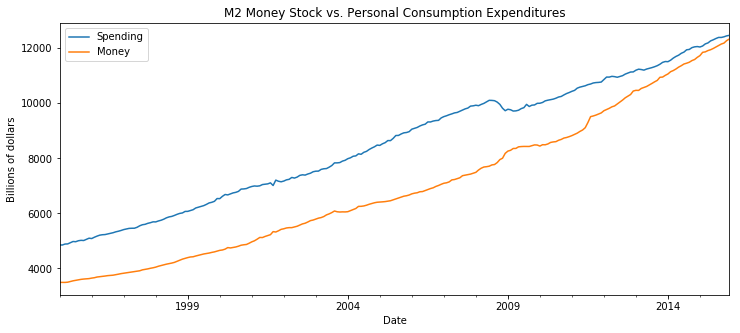

In [ ]:
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel='Billions of dollars'
xlabel=''

ax = df['Spending'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Money'].plot(legend=True);

## Test for stationarity, perform any necessary transformations

In [ ]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [ ]:
adf_test(df['Money'],title='Money')

Augmented Dickey-Fuller Test: Money
ADF test statistic        4.239022
p-value                   1.000000
# lags used               4.000000
# observations          247.000000
critical value (1%)      -3.457105
critical value (5%)      -2.873314
critical value (10%)     -2.573044
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [ ]:
adf_test(df['Spending'], title='Spending')

Augmented Dickey-Fuller Test: Spending
ADF test statistic        0.149796
p-value                   0.969301
# lags used               3.000000
# observations          248.000000
critical value (1%)      -3.456996
critical value (5%)      -2.873266
critical value (10%)     -2.573019
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Neither variable is stationary, so we'll take a first order difference of the entire DataFrame and re-run the augmented Dickey-Fuller tests. It's advisable to save transformed values in a new DataFrame, as we'll need the original when we later invert the transormations and evaluate the model.

In [ ]:
df_transformed = df.diff()

In [ ]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Money'], title='MoneyFirstDiff')
print()
adf_test(df_transformed['Spending'], title='SpendingFirstDiff')

Augmented Dickey-Fuller Test: MoneyFirstDiff
ADF test statistic       -2.057404
p-value                   0.261984
# lags used              15.000000
# observations          235.000000
critical value (1%)      -3.458487
critical value (5%)      -2.873919
critical value (10%)     -2.573367
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: SpendingFirstDiff
ADF test statistic     -7.226974e+00
p-value                 2.041027e-10
# lags used             2.000000e+00
# observations          2.480000e+02
critical value (1%)    -3.456996e+00
critical value (5%)    -2.873266e+00
critical value (10%)   -2.573019e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Since Money is not yet stationary, we'll apply second order differencing to both series so they retain the same number of observations

In [ ]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Money'], title='MoneySecondDiff')
print()
adf_test(df_transformed['Spending'], title='SpendingSecondDiff')

Augmented Dickey-Fuller Test: MoneySecondDiff
ADF test statistic     -7.077471e+00
p-value                 4.760675e-10
# lags used             1.400000e+01
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: SpendingSecondDiff
ADF test statistic     -8.760145e+00
p-value                 2.687900e-14
# lags used             8.000000e+00
# observations          2.410000e+02
critical value (1%)    -3.457779e+00
critical value (5%)    -2.873609e+00
critical value (10%)   -2.573202e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [ ]:
df_transformed.head()

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7

In [ ]:
len(df_transformed)

250

### Train/test split
It will be useful to define a number of observations variable for our test set. For this analysis, let's use 12 months.

In [ ]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [ ]:
print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


## VAR Model Order Selection
We'll fit a series of models using the first seven p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [ ]:
for i in [1,2,3,4,5,6,7]:
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.178610495220896
BIC:  14.266409486135709

Order = 2
AIC:  13.955189367163705
BIC:  14.101961901274958

Order = 3
AIC:  13.849518291541038
BIC:  14.055621258341116

Order = 4
AIC:  13.827950574458281
BIC:  14.093744506408875

Order = 5
AIC:  13.78730034460964
BIC:  14.113149468980652

Order = 6
AIC:  13.799076756885807
BIC:  14.185349048538066

Order = 7
AIC:  13.797638727913972
BIC:  14.244705963046671



In [ ]:
model = VAR(train)
for i in [1,2,3,4,5,6,7]:
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 1
AIC:  14.178610495220896
BIC:  14.266409486135709

Order = 2
AIC:  13.955189367163705
BIC:  14.101961901274958

Order = 3
AIC:  13.849518291541038
BIC:  14.055621258341116

Order = 4
AIC:  13.827950574458281
BIC:  14.093744506408875

Order = 5
AIC:  13.78730034460964
BIC:  14.113149468980652

Order = 6
AIC:  13.799076756885807
BIC:  14.185349048538066

Order = 7
AIC:  13.797638727913972
BIC:  14.244705963046671



The VAR(5) model seems to return the lowest combined scores.<br>
Just to verify that both variables are included in the model we can run <tt>.endog_names</tt>

In [ ]:
model.endog_names

['Money', 'Spending']

## Fit the VAR(5) Model

In [ ]:
results = model.fit(5)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 02, Apr, 2019
Time:                     18:33:59
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

## Predict the next 12 values
Unlike the VARMAX model we'll use in upcoming sections, the VAR <tt>.forecast()</tt> function requires that we pass in a lag order number of previous observations as well. Unfortunately this forecast tool doesn't provide a DateTime index - we'll have to do that manually.

In [ ]:
lag_order = results.k_ar
lag_order

5

In [ ]:
z = results.forecast(y=train.values[-lag_order:], steps=12)
z

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [ ]:
test

Money  Spending
Date                       
2015-01-01  -15.5     -26.6
2015-02-01   56.1      52.4
2015-03-01 -102.8      39.5
2015-04-01   30.9     -40.4
2015-05-01  -15.8      38.8
2015-06-01   14.0     -34.1
2015-07-01    6.7       6.9
2015-08-01   -0.7      -8.5
2015-09-01    5.5     -39.8
2015-10-01  -23.1      24.5
2015-11-01   55.8      10.7
2015-12-01  -31.2     -15.0

In [ ]:
idx = pd.date_range('1/1/2015', periods=12, freq='MS')
df_forecast = pd.DataFrame(z, index=idx, columns=['Money2d','Spending2d'])
df_forecast

Money2d  Spending2d
2015-01-01 -16.995276   36.149820
2015-02-01  -3.174038  -11.450298
2015-03-01  -0.377725   -6.684969
2015-04-01  -2.602233    5.479458
2015-05-01   4.228557   -2.443365
2015-06-01   1.559393    0.387639
2015-07-01  -0.998410    3.883680
2015-08-01   0.364510   -2.356101
2015-09-01  -1.210627   -1.224147
2015-10-01   0.225877    0.786927
2015-11-01   1.338939    0.180974
2015-12-01  -0.218585    0.212750

## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [ ]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money1d'].cumsum()

In [ ]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending1d'].cumsum()

In [ ]:
df_forecast

Money2d  Spending2d    Money1d  MoneyForecast  Spending1d  \
2015-01-01 -16.995276   36.149820  61.604724   11731.704724   46.749820   
2015-02-01  -3.174038  -11.450298  58.430686   11790.135410   35.299522   
2015-03-01  -0.377725   -6.684969  58.052961   11848.188371   28.614552   
2015-04-01  -2.602233    5.479458  55.450728   11903.639099   34.094010   
2015-05-01   4.228557   -2.443365  59.679285   11963.318384   31.650645   
2015-06-01   1.559393    0.387639  61.238678   12024.557062   32.038284   
2015-07-01  -0.998410    3.883680  60.240268   12084.797331   35.921964   
2015-08-01   0.364510   -2.356101  60.604779   12145.402109   33.565863   
2015-09-01  -1.210627   -1.224147  59.394151   12204.796261   32.341716   
2015-10-01   0.225877    0.786927  59.620028   12264.416289   33.128643   
2015-11-01   1.338939    0.180974  60.958967   12325.375256   33.309618   
2015-12-01  -0.218585    0.212750  60.740383   12386.115639   33.522368   

            SpendingForecast  
2015-01-01      12108.749820  
2015-02-01      12144.049342  
2015-03-01      12172.663894  
2015-04-01      12206.757904  
2015-05-01      12238.408549  
2015-06-01      12270.446833  
2015-07-01      12306.368797  
2015-08-01      12339.934659  
2015-09-01      12372.276375  
2015-10-01      12405.405019  
2015-11-01      12438.714636  
2015-12-01      12472.237004

## Plot the results
The VARResults object offers a couple of quick plotting tools:

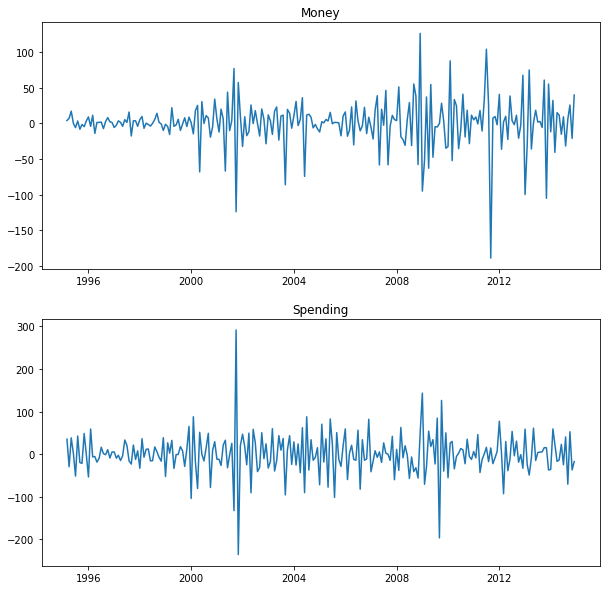

In [ ]:
results.plot();

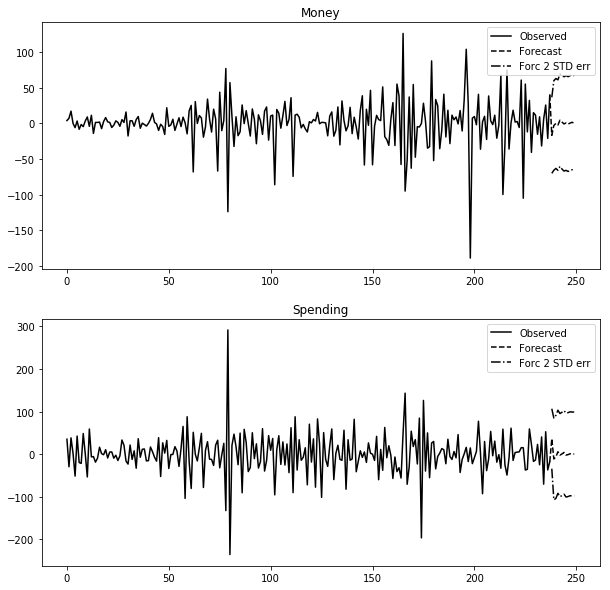

In [ ]:
results.plot_forecast(12);

But for our investigation we want to plot predicted values against our test set.

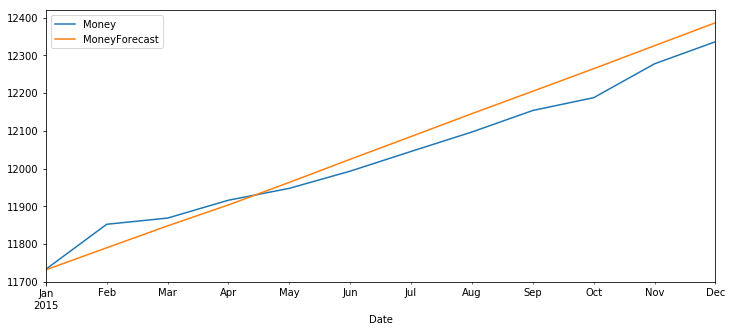

In [ ]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

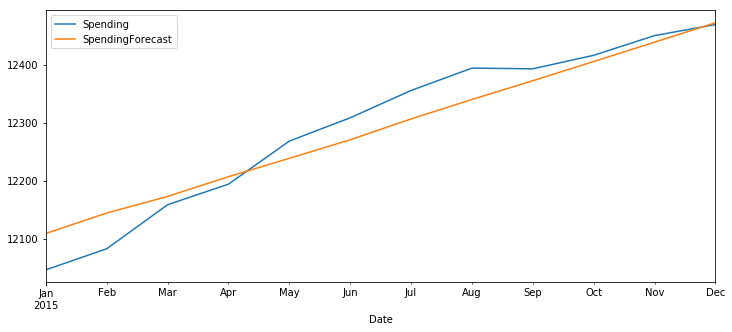

In [ ]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [ ]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 43.710


In [ ]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 37.001


## Let's compare these results to individual AR(5) models

In [ ]:
from statsmodels.tsa.ar_model import AR,ARResults

### Money

In [ ]:
modelM = AR(train['Money'])
AR5fit1 = modelM.fit(maxlag=5,method='mle')
print(f'Lag: {AR5fit1.k_ar}')
print(f'Coefficients:\n{AR5fit1.params}')

Lag: 5
Coefficients:
const       0.585190
L1.Money   -0.605217
L2.Money   -0.465398
L3.Money   -0.228645
L4.Money   -0.311355
L5.Money   -0.127613
dtype: float64


In [ ]:
start=len(train)
end=len(train)+len(test)-1
z1 = pd.DataFrame(AR5fit1.predict(start=start, end=end, dynamic=False),columns=['Money'])

In [ ]:
z1

Money
2015-01-01 -16.911079
2015-02-01 -11.347188
2015-03-01   9.669315
2015-04-01  -5.699596
2015-05-01   2.353702
2015-06-01   5.293505
2015-07-01  -3.973286
2015-08-01   0.528805
2015-09-01   0.898481
2015-10-01  -1.244739
2015-11-01   1.361047
2015-12-01   0.477725

### Invert the Transformation, Evaluate the Forecast

In [ ]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + z1['Money'].cumsum()

# Now build the forecast values from the first difference set
z1['MoneyForecast'] = df['Money'].iloc[-nobs-1] + z1['Money1d'].cumsum()

In [ ]:
z1

Money    Money1d  MoneyForecast
2015-01-01 -16.911079  61.688921   11731.788921
2015-02-01 -11.347188  50.341732   11782.130653
2015-03-01   9.669315  60.011047   11842.141700
2015-04-01  -5.699596  54.311452   11896.453152
2015-05-01   2.353702  56.665153   11953.118305
2015-06-01   5.293505  61.958658   12015.076963
2015-07-01  -3.973286  57.985372   12073.062335
2015-08-01   0.528805  58.514177   12131.576512
2015-09-01   0.898481  59.412658   12190.989171
2015-10-01  -1.244739  58.167919   12249.157090
2015-11-01   1.361047  59.528966   12308.686056
2015-12-01   0.477725  60.006691   12368.692747

In [ ]:
RMSE3 = rmse(df['Money'][-nobs:], z1['MoneyForecast'])

print(f'Money VAR(5) RMSE: {RMSE1:.3f}')
print(f'Money  AR(5) RMSE: {RMSE3:.3f}')

Money VAR(5) RMSE: 43.710
Money  AR(5) RMSE: 36.222


## Personal Spending

In [ ]:
modelS = AR(train['Spending'])
AR5fit2 = modelS.fit(maxlag=5,method='mle')
print(f'Lag: {AR5fit2.k_ar}')
print(f'Coefficients:\n{AR5fit2.params}')

Lag: 5
Coefficients:
const          0.221210
L1.Spending   -0.913123
L2.Spending   -0.677036
L3.Spending   -0.450797
L4.Spending   -0.273218
L5.Spending   -0.159475
dtype: float64


In [ ]:
z2 = pd.DataFrame(AR5fit2.predict(start=start, end=end, dynamic=False),columns=['Spending'])
z2

Spending
2015-01-01  30.883394
2015-02-01  -2.227348
2015-03-01  -8.838613
2015-04-01   6.673539
2015-05-01  -4.483675
2015-06-01  -0.535010
2015-07-01   3.507013
2015-08-01  -1.011475
2015-09-01  -0.827619
2015-10-01   0.941987
2015-11-01  -0.495503
2015-12-01   0.126068

### Invert the Transformation, Evaluate the Forecast

In [ ]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [ ]:
z2

Spending  Spending1d  SpendingForecast
2015-01-01  30.883394   41.483394      12103.483394
2015-02-01  -2.227348   39.256045      12142.739439
2015-03-01  -8.838613   30.417433      12173.156872
2015-04-01   6.673539   37.090972      12210.247844
2015-05-01  -4.483675   32.607297      12242.855140
2015-06-01  -0.535010   32.072286      12274.927426
2015-07-01   3.507013   35.579299      12310.506726
2015-08-01  -1.011475   34.567824      12345.074550
2015-09-01  -0.827619   33.740206      12378.814756
2015-10-01   0.941987   34.682193      12413.496948
2015-11-01  -0.495503   34.186690      12447.683639
2015-12-01   0.126068   34.312758      12481.996397

In [ ]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')
print(f'Spending  AR(5) RMSE: {RMSE4:.3f}')

Spending VAR(5) RMSE: 37.001
Spending  AR(5) RMSE: 34.121


<strong>CONCLUSION:</strong> It looks like the VAR(5) model did <em>not</em> do better than the individual AR(5) models. That's ok - we know more than we did before. In the next section we'll look at VARMA and see if the addition of a $q$ parameter helps. Great work!

# VARMA(p,q)
## Vector Autoregressive Moving Average
This lesson picks up where VAR(p) left off.

Recall that the system of equations for a 2-dimensional VAR(1) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

where the coefficient $\phi_{ii,l}$ captures the influence of the $l$th lag of variable $y_i$ on itself,<br>
the coefficient $\phi_{ij,l}$ captures the influence of the $l$th lag of variable $y_j$ on $y_i$.<br>
Most importantly, $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are white noise processes that may be correlated.<br>

In a <strong>VARMA(p,q)</strong> model we give the error terms $\varepsilon_t$ a moving average representation of order $q$.


### Formulation
We've seen that an autoregressive moving average ARMA(p,q) model is described by the following:

&nbsp;&nbsp;&nbsp;&nbsp; $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \theta_{1}\varepsilon_{t-1} + \theta_{2}\varepsilon_{t-2} + \dots + \theta_{q}\varepsilon_{t-q} + \varepsilon_{t}$

A $K$-dimensional VARMA model of order $(p,q)$ considers each variable $y_K$ in the system.<br>

For example, the system of equations for a 2-dimensional VARMA(1,1) model is:

&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \theta_{11,1}\varepsilon_{1,t-1} + \theta_{12,1}\varepsilon_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \theta_{21,1}\varepsilon_{1,t-1} + \theta_{22,1}\varepsilon_{2,t-1} + \varepsilon_{2,t}$

where the coefficient $\theta_{ii,l}$ captures the influence of the $l$th lag of error $\varepsilon_i$ on itself,<br>
the coefficient $\theta_{ij,l}$ captures the influence of the $l$th lag of error $\varepsilon_j$ on $\varepsilon_i$,<br>
and $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are residual white noise.<br>


The general steps involved in building a VARMA model are:
* Examine the data
* Visualize the data
* Test for stationarity
* If necessary, transform the data to make it stationary
* Select the appropriate <em>p</em> and <em>q</em> orders
* Instantiate the model and fit it to a training set
* If necessary, invert the earlier transformation
* Evaluate model predictions against a known test set
* Forecast the future

<div class="alert alert-info"><h3>Related Functions:</h3>
<tt><strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.varmax.VARMAX.html'>
varmax.VARMAX</a></strong><font color=black>(endog[, exog, order, trend, …])</font>&nbsp;&nbsp;Vector Autoregressive Moving Average with eXogenous regressors model<br>
<strong>
<a href='https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.varmax.VARMAXResults.html'>
varmax.VARMAXResults</a></strong><font color=black>(model, params[, …])</font>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Class to hold results from fitting an VARMAX model<br>
</tt>
   
<h3>For Further Reading:</h3>
<strong>
<a href='https://www.statsmodels.org/stable/statespace.html#vector-autoregressive-moving-average-with-exogenous-regressors-varmax'>Statsmodels Tutorial:</a></strong>&nbsp;&nbsp;<font color=black>Time Series Analysis by State Space Methods</font><br>
<strong>
<a href='https://www.statsmodels.org/stable/examples/notebooks/generated/statespace_varmax.html'>Statsmodels Example:</a></strong>&nbsp;&nbsp;<font color=black>VARMAX models</font><br>
</div>

### Perform standard imports and load dataset
For this analysis we'll reuse our money and spending datasets. We'll look at the M2 Money Stock which is a measure of U.S. personal assets, and U.S. personal spending. Both datasets are in billions of dollars, monthly, seasonally adjusted. They span the 21 years from January 1995 to December 2015 (252 records).<br>
Sources: https://fred.stlouisfed.org/series/M2SL https://fred.stlouisfed.org/series/PCE

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col=0, parse_dates=True)
df.index.freq = 'MS'

sp = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
sp.index.freq = 'MS'

### Inspect the data

In [ ]:
df = df.join(sp)
df.head()

Money  Spending
Date                        
1995-01-01  3492.4    4851.2
1995-02-01  3489.9    4850.8
1995-03-01  3491.1    4885.4
1995-04-01  3499.2    4890.2
1995-05-01  3524.2    4933.1

In [ ]:
df = df.dropna()
df.shape

(252, 2)

### Plot the source data

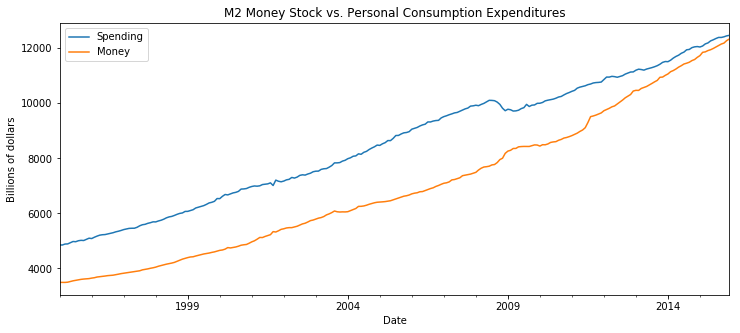

In [ ]:
title = 'M2 Money Stock vs. Personal Consumption Expenditures'
ylabel='Billions of dollars'
xlabel=''

ax = df['Spending'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Money'].plot(legend=True);

## Test for stationarity, perform any necessary transformations
In the previous section we applied the augmented Dickey-Fuller test and found that a second-order difference achieved stationarity. In this section we'll perform the <strong>auto_arima</strong> prediction to identify optimal $p$ and $q$ orders.

In [ ]:
# INCLUDED HERE IF YOU CHOOSE TO USE IT
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

<div class="alert alert-info"><strong>NOTE: </strong> When performing the auto_arima function we're likely to see a <tt><font color=black>ConvergenceWarning: Maximum Likelihood optimization failed to converge.</font></tt> This is not unusual in models which have to estimate a large number of parameters. However, we can override the maximum iterations default of 50, and pass an arbitrarily large number with <tt>maxiter=1000</tt>. We'll see this come up again when we fit our model.</div>  

In [ ]:
auto_arima(df['Money'],maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(1, 2, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

In [ ]:
auto_arima(df['Spending'],maxiter=1000)

ARIMA(callback=None, disp=0, maxiter=1000, method=None, order=(1, 1, 2),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 0, 0, 1), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend=None,
   with_intercept=True)

It looks like a VARMA(1,2) model is recommended. Note that the $d$ term (2 for Money, 1 for Spending) is about to be addressed by transforming the data to make it stationary. As before we'll apply a second order difference.

In [ ]:
df_transformed = df.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

Money  Spending
Date                       
1995-03-01    3.7      35.0
1995-04-01    6.9     -29.8
1995-05-01   16.9      38.1
1995-06-01   -0.3       1.5
1995-07-01   -6.2     -51.7

In [ ]:
len(df_transformed)

250

## Train/test/split
It is useful to define a number of observations variable for our test set. For this analysis, let's use 12 months.

In [ ]:
nobs=12
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [ ]:
print(train.shape)
print(test.shape)

(238, 2)
(12, 2)


## Fit the VARMA(1,2) Model
This may take awhile.

In [ ]:
model = VARMAX(train, order=(1,2), trend='c')
results = model.fit(maxiter=1000, disp=False)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Statespace Model Results                            
=================================================================================
Dep. Variable:     ['Money', 'Spending']   No. Observations:                  238
Model:                        VARMA(1,2)   Log Likelihood               -2286.286
                             + intercept   AIC                           4606.571
Date:                   Wed, 03 Apr 2019   BIC                           4665.600
Time:                           08:25:17   HQIC                          4630.361
Sample:                       03-01-1995                                         
                            - 12-01-2014                                         
Covariance Type:                     opg                                         
===================================================================================
Ljung-Box (Q):                68.42, 28.14   Jarque-Bera (JB):       547.62, 120.94
Prob(Q):                        0.00, 0.92   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         5.61, 2.91   Skew:                      1.33, -0.34
Prob(H) (two-sided):            0.00, 0.00   Kurtosis:                   9.94, 6.42
                            Results for equation Money                            
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2618      0.954      0.274      0.784      -1.608       2.131
L1.Money          -1.0465      4.176     -0.251      0.802      -9.232       7.139
L1.Spending        2.2414      7.952      0.282      0.778     -13.344      17.827
L1.e(Money)        0.2846      4.429      0.064      0.949      -8.397       8.966
L1.e(Spending)    -2.3643      7.962     -0.297      0.767     -17.969      13.241
L2.e(Money)       -1.3093      4.982     -0.263      0.793     -11.074       8.456
L2.e(Spending)     2.0885      7.033      0.297      0.766     -11.696      15.873
                          Results for equation Spending                           
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0641      0.212      0.303      0.762      -0.351       0.479
L1.Money          -0.2625      2.293     -0.114      0.909      -4.756       4.231
L1.Spending        0.6693      4.221      0.159      0.874      -7.604       8.943
L1.e(Money)        0.3785      2.367      0.160      0.873      -4.260       5.017
L1.e(Spending)    -1.6238      4.196     -0.387      0.699      -9.848       6.601
L2.e(Money)       -0.3753      2.535     -0.148      0.882      -5.344       4.593
L2.e(Spending)     0.6601      3.689      0.179      0.858      -6.570       7.890
                                  Error covariance matrix                                  
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
sqrt.var.Money             25.6292     19.879      1.289      0.197     -13.334      64.592
sqrt.cov.Money.Spending   -10.1411      4.730     -2.144      0.032     -19.411      -0.871
sqrt.var.Spending          33.8594      1.934     17.509      0.000      30.069      37.650
===========================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Predict the next 12 values
Unlike the VAR model we used in the previous section, the VARMAX <tt>.forecast()</tt> function won't require that we pass in a number of previous observations, and it will provide an extended DateTime index.

In [ ]:
df_forecast = results.forecast(12)
df_forecast

Money   Spending
2015-01-01 -11.501568  36.789494
2015-02-01 -10.883687  -4.696517
2015-03-01   1.124754  -0.222204
2015-04-01  -1.413346  -0.379833
2015-05-01   0.889492   0.180924
2015-06-01  -0.263555  -0.048266
2015-07-01   0.429407   0.101016
2015-08-01   0.038821   0.019025
2015-09-01   0.263797   0.066679
2015-10-01   0.135170   0.039517
2015-11-01   0.208897   0.055102
2015-12-01   0.166674   0.046180

## Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [ ]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money'].cumsum()

In [ ]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending'].cumsum()

In [ ]:
df_forecast

Money   Spending    Money1d  MoneyForecast  Spending1d  \
2015-01-01 -11.501568  36.789494  67.098432   11658.598432   47.389494   
2015-02-01 -10.883687  -4.696517  56.214745   11647.714745   42.692977   
2015-03-01   1.124754  -0.222204  57.339499   11648.839499   42.470773   
2015-04-01  -1.413346  -0.379833  55.926154   11647.426154   42.090940   
2015-05-01   0.889492   0.180924  56.815646   11648.315646   42.271865   
2015-06-01  -0.263555  -0.048266  56.552091   11648.052091   42.223598   
2015-07-01   0.429407   0.101016  56.981498   11648.481498   42.324614   
2015-08-01   0.038821   0.019025  57.020319   11648.520319   42.343640   
2015-09-01   0.263797   0.066679  57.284116   11648.784116   42.410319   
2015-10-01   0.135170   0.039517  57.419286   11648.919286   42.449836   
2015-11-01   0.208897   0.055102  57.628183   11649.128183   42.504939   
2015-12-01   0.166674   0.046180  57.794858   11649.294858   42.551119   

            SpendingForecast  
2015-01-01      12098.789494  
2015-02-01      12094.092977  
2015-03-01      12093.870773  
2015-04-01      12093.490940  
2015-05-01      12093.671865  
2015-06-01      12093.623598  
2015-07-01      12093.724614  
2015-08-01      12093.743640  
2015-09-01      12093.810319  
2015-10-01      12093.849836  
2015-11-01      12093.904939  
2015-12-01      12093.951119

In [ ]:
pd.concat([df.iloc[-12:],df_forecast[['MoneyForecast','SpendingForecast']]],axis=1)

Money  Spending  MoneyForecast  SpendingForecast
Date                                                          
2015-01-01  11733.2   12046.0   11658.598432      12098.789494
2015-02-01  11852.4   12082.4   11647.714745      12094.092977
2015-03-01  11868.8   12158.3   11648.839499      12093.870773
2015-04-01  11916.1   12193.8   11647.426154      12093.490940
2015-05-01  11947.6   12268.1   11648.315646      12093.671865
2015-06-01  11993.1   12308.3   11648.052091      12093.623598
2015-07-01  12045.3   12355.4   11648.481498      12093.724614
2015-08-01  12096.8   12394.0   11648.520319      12093.743640
2015-09-01  12153.8   12392.8   11648.784116      12093.810319
2015-10-01  12187.7   12416.1   11648.919286      12093.849836
2015-11-01  12277.4   12450.1   11649.128183      12093.904939
2015-12-01  12335.9   12469.1   11649.294858      12093.951119

## Plot the results

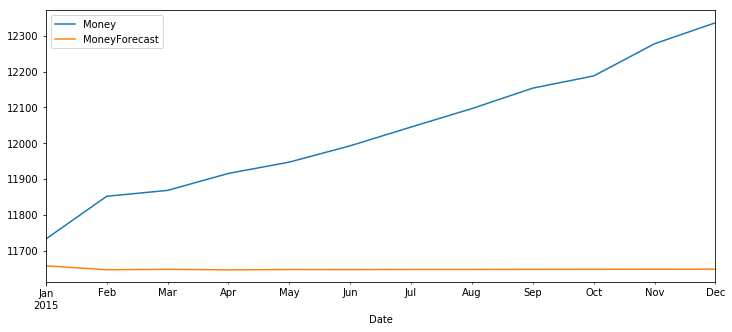

In [ ]:
df['Money'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['MoneyForecast'].plot(legend=True);

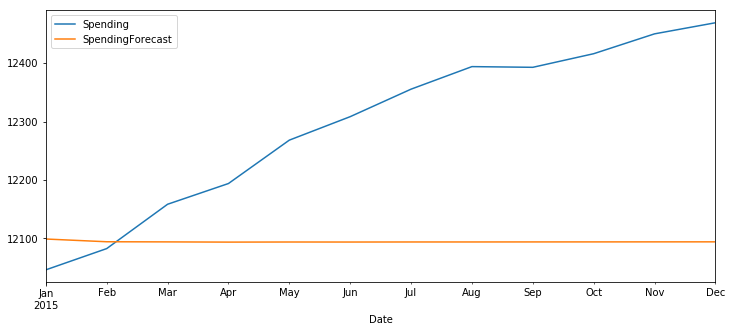

In [ ]:
df['Spending'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['SpendingForecast'].plot(legend=True);

### Evaluate the model

&nbsp;&nbsp;&nbsp;&nbsp;$RMSE = \sqrt{{\frac 1 L} \sum\limits_{l=1}^L (y_{T+l} - \hat y_{T+l})^2}$<br><br>
where $T$ is the last observation period and $l$ is the lag.

In [ ]:
RMSE1 = rmse(df['Money'][-nobs:], df_forecast['MoneyForecast'])
print(f'Money VAR(5) RMSE: {RMSE1:.3f}')

Money VAR(5) RMSE: 422.942


In [ ]:
RMSE2 = rmse(df['Spending'][-nobs:], df_forecast['SpendingForecast'])
print(f'Spending VAR(5) RMSE: {RMSE2:.3f}')

Spending VAR(5) RMSE: 243.777


Clearly these results are less accurate than our earlier VAR(5) model. Still, this tells us something!
## Let's compare these results to individual ARMA(1,2) models

In [ ]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults

### Money

In [ ]:
model = ARMA(train['Money'],order=(1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Money   No. Observations:                  238
Model:                     ARMA(1, 2)   Log Likelihood               -1117.710
Method:                       css-mle   S.D. of innovations             26.214
Date:                Wed, 03 Apr 2019   AIC                           2245.421
Time:                        08:25:54   BIC                           2262.782
Sample:                    03-01-1995   HQIC                          2252.418
                         - 12-01-2014                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1814      0.029      6.302      0.000       0.125       0.238
ar.L1.Money    -0.3569      0.293     -1.218      0.225      -0.931       0.218
ma.L1.Money    -0.4087      0.260     -1.573      0.117      -0.918       0.101
ma.L2.Money    -0.5912      0.259     -2.278      0.024      -1.100      -0.083
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8022           +0.0000j            2.8022            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2           -1.6913           +0.0000j            1.6913            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
z1 = results.predict(start=start, end=end).rename('Money')
z1 = pd.DataFrame(z1)

In [ ]:
z1

Money
2015-01-01 -14.498910
2015-02-01 -10.947218
2015-03-01   4.152839
2015-04-01  -1.235882
2015-05-01   0.687178
2015-06-01   0.000900
2015-07-01   0.245811
2015-08-01   0.158410
2015-09-01   0.189600
2015-10-01   0.178470
2015-11-01   0.182442
2015-12-01   0.181024

### Invert the Transformation, Evaluate the Forecast

In [ ]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z1['Money1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + z1['Money'].cumsum()

# Now build the forecast values from the first difference set
z1['MoneyForecast'] = df['Money'].iloc[-nobs-1] + z1['Money1d'].cumsum()

In [ ]:
z1

Money    Money1d  MoneyForecast
2015-01-01 -14.498910  64.101090   11734.201090
2015-02-01 -10.947218  53.153872   11787.354962
2015-03-01   4.152839  57.306711   11844.661673
2015-04-01  -1.235882  56.070829   11900.732502
2015-05-01   0.687178  56.758007   11957.490509
2015-06-01   0.000900  56.758908   12014.249417
2015-07-01   0.245811  57.004718   12071.254135
2015-08-01   0.158410  57.163128   12128.417263
2015-09-01   0.189600  57.352729   12185.769991
2015-10-01   0.178470  57.531198   12243.301190
2015-11-01   0.182442  57.713640   12301.014830
2015-12-01   0.181024  57.894664   12358.909494

In [ ]:
RMSE3 = rmse(df['Money'][-nobs:], z1['MoneyForecast'])

print(f'Money VARMA(1,2) RMSE: {RMSE1:.3f}')
print(f'Money  ARMA(1,2) RMSE: {RMSE3:.3f}')

Money VARMA(1,2) RMSE: 422.942
Money  ARMA(1,2) RMSE: 32.236


## Personal Spending

In [ ]:
model = ARMA(train['Spending'],order=(1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:               Spending   No. Observations:                  238
Model:                     ARMA(1, 2)   Log Likelihood               -1182.411
Method:                       css-mle   S.D. of innovations             34.661
Date:                Wed, 03 Apr 2019   AIC                           2374.823
Time:                        08:26:04   BIC                           2392.184
Sample:                    03-01-1995   HQIC                          2381.820
                         - 12-01-2014                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0856      0.245      0.350      0.727      -0.394       0.565
ar.L1.Spending    -0.3403      0.511     -0.666      0.506      -1.342       0.661
ma.L1.Spending    -0.6451      0.521     -1.237      0.217      -1.667       0.377
ma.L2.Spending    -0.2139      0.485     -0.441      0.660      -1.165       0.737
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9388           +0.0000j            2.9388            0.5000
MA.1            1.1281           +0.0000j            1.1281            0.0000
MA.2           -4.1438           +0.0000j            4.1438            0.5000
-----------------------------------------------------------------------------
"""

In [ ]:
start=len(train)
end=len(train)+len(test)-1
z2 = results.predict(start=start, end=end).rename('Spending')
z2 = pd.DataFrame(z2)
z2

Spending
2015-01-01  33.555831
2015-02-01  -3.338262
2015-03-01   1.250702
2015-04-01  -0.310832
2015-05-01   0.220527
2015-06-01   0.039716
2015-07-01   0.101243
2015-08-01   0.080306
2015-09-01   0.087431
2015-10-01   0.085006
2015-11-01   0.085831
2015-12-01   0.085551

### Invert the Transformation, Evaluate the Forecast

In [ ]:
# Add the most recent first difference from the training set to the forecast cumulative sum
z2['Spending1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + z2['Spending'].cumsum()

# Now build the forecast values from the first difference set
z2['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + z2['Spending1d'].cumsum()

In [ ]:
z2

Spending  Spending1d  SpendingForecast
2015-01-01  33.555831   44.155831      12106.155831
2015-02-01  -3.338262   40.817569      12146.973400
2015-03-01   1.250702   42.068270      12189.041670
2015-04-01  -0.310832   41.757439      12230.799108
2015-05-01   0.220527   41.977966      12272.777074
2015-06-01   0.039716   42.017682      12314.794756
2015-07-01   0.101243   42.118925      12356.913681
2015-08-01   0.080306   42.199231      12399.112912
2015-09-01   0.087431   42.286662      12441.399574
2015-10-01   0.085006   42.371668      12483.771242
2015-11-01   0.085831   42.457500      12526.228742
2015-12-01   0.085551   42.543050      12568.771792

In [ ]:
RMSE4 = rmse(df['Spending'][-nobs:], z2['SpendingForecast'])

print(f'Spending VARMA(1,2) RMSE: {RMSE2:.3f}')
print(f'Spending  ARMA(1,2) RMSE: {RMSE4:.3f}')

Spending VARMA(1,2) RMSE: 243.777
Spending  ARMA(1,2) RMSE: 52.334


<strong>CONCLUSION:</strong> It looks like the VARMA(1,2) model did a relatively poor job compared to simpler alternatives. This tells us that there is little or no interdepence between Money Stock and Personal Consumption Expenditures, at least for the timespan we investigated. This is helpful! By fitting a model and getting poor results we know more about the data than we did before.

# Keras Basics

In [ ]:
# You can safely ignore any warnings on importing this
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Simple y=mx+b+noise data

In [ ]:
m = 2
b = 3
x = np.linspace(0,50,100)

# 101 is an arbitrary choice to make sure your random values are same as mine!
np.random.seed(101) 
noise = np.random.normal(loc=0.0,scale=4.0,size=len(x))

In [ ]:
y = 2*x + b + noise

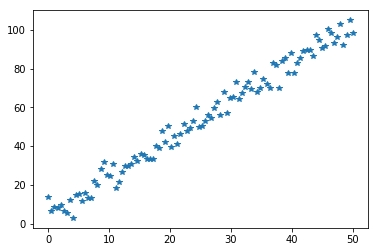

In [ ]:
plt.plot(x,y,'*')

## Creating a Neural Network for a Line of Best Fit

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential()
# 4 Neurons, expecting only 1 feature with input_dim=1
model.add(Dense(4, input_dim=1, activation='relu'))
# 4 Neurons (Play around with this number!)
model.add(Dense(4, activation='relu'))
# One final output of y, so only 1 neuron
model.add(Dense(1, activation='linear'))
# Compil the layers
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 4)                 8         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 5         
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


## Train on Data

** NOTE: FOR THIS SIMPLE EXAMPLE, I WILL SKIP THE TRAIN TEST SPLIT!!!! **

In [ ]:
model.fit(x, y, epochs=500, verbose=1)

## Predicting on new x points

Our previous x was 50 linspace points between 0 and 100. Let's predict for 1000 values between 0 and 100, drawing a line for our predictions (our line of best fit).

In [ ]:
x_for_predictions = np.linspace(0,50,1000)

In [ ]:
y_predicted = model.predict(x_for_predictions)

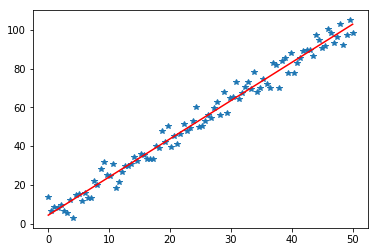

In [ ]:
# Original X and Y
plt.plot(x,y,'*')
# Our Model's prediction Line
plt.plot(x_for_predictions,y_predicted,'r')

# Evaluating Our Error

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [ ]:
# Labels we do know
prediction_for_true_y = model.predict(x)

In [ ]:
mean_squared_error(y,prediction_for_true_y)

16.820542043655355

In [ ]:
mean_absolute_error(y,prediction_for_true_y)

3.291464809895978

 Notice how MSE value was being reported out by Keras during training!
 
 Is this a good error value? Really depends on the context.

# RNN First Example

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data
https://fred.stlouisfed.org/series/S4248SM144NCEN

In [ ]:
df = pd.read_csv('../Data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [ ]:
df.head()

S4248SM144NCEN
DATE                      
1992-01-01            3459
1992-02-01            3458
1992-03-01            4002
1992-04-01            4564
1992-05-01            4221

In [ ]:
df.columns = ['Sales']

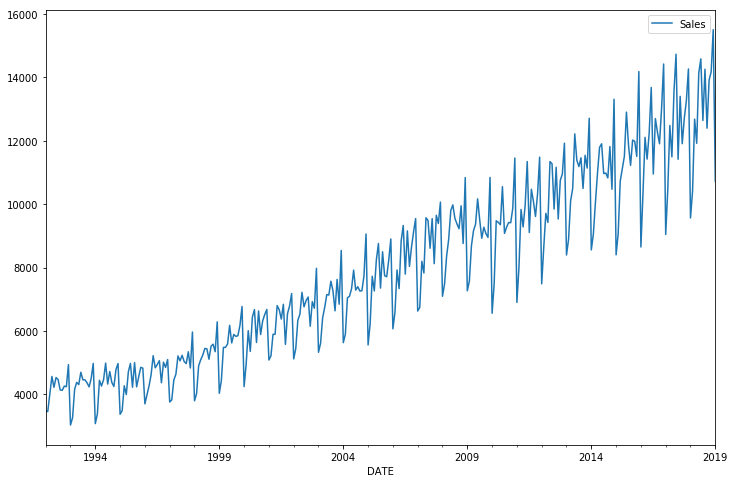

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

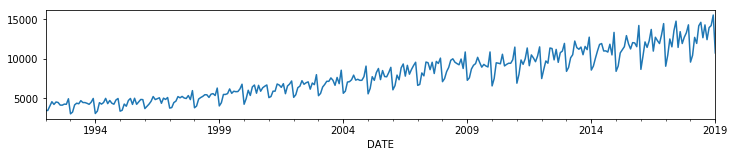

In [ ]:
results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,2))

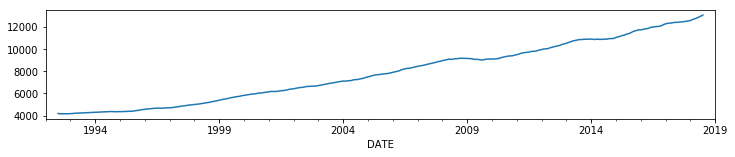

In [ ]:
results.trend.plot(figsize=(12,2))

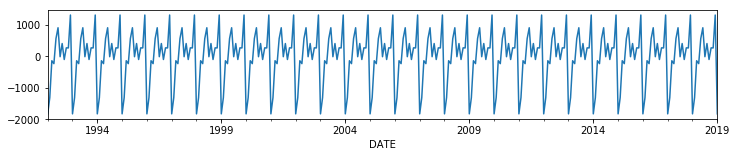

In [ ]:
results.seasonal.plot(figsize=(12,2))

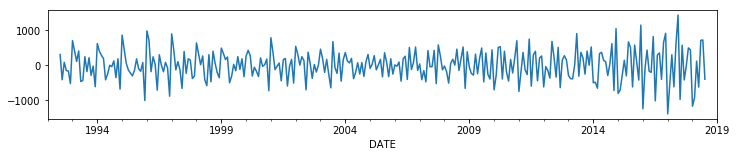

In [ ]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [ ]:
len(df)

325

In [ ]:
325-12

313

In [ ]:
train = df.iloc[:313]
test = df.iloc[313:]

In [ ]:
len(test)

12

## Scale Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

C:\Users\Marcial\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

This class takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [ ]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [ ]:
# define generator
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
len(scaled_train)

313

In [ ]:
len(generator) # n_input = 2

311

In [ ]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [ ]:
# What does the first batch look like?
X,y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885]
Predict this y: 
 [[0.08299855]]


In [ ]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [ ]:
# What does the first batch look like?
X,y = generator[0]

In [ ]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y: 
 [[0.]]


### Create the Model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
301/301 [==============================] - 6s 21ms/step - loss: 0.0226
Epoch 2/50
301/301 [==============================] - 5s 17ms/step - loss: 0.0090
Epoch 3/50
301/301 [==============================] - 5s 16ms/step - loss: 0.0081
Epoch 4/50
301/301 [==============================] - 5s 16ms/step - loss: 0.0084
Epoch 5/50
301/301 [==============================] - 5s 16ms/step - loss: 0.0075
Epoch 6/50
301/301 [==============================] - 5s 16ms/step - loss: 0.0065
Epoch 7/50
301/301 [==============================] - 5s 16ms/step - loss: 0.0055
Epoch 8/50
301/301 [==============================] - 5s 16ms/step - loss: 0.0050
Epoch 9/50
301/301 [==============================] - 5s 16ms/step - loss: 0.0039
Epoch 10/50
301/301 [==============================] - 5s 16ms/step - loss: 0.0035
Epoch 11/50
301/301 [==============================] - 5s 16ms/step - loss: 0.0030
Epoch 12/50
301/301 [==============================] - 5s 17ms/step - loss: 0.0030
Epoch 13/50
3

In [ ]:
model.history.history.keys()

dict_keys(['loss'])

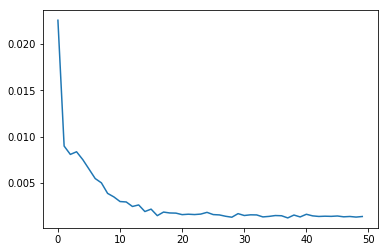

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [ ]:
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
model.predict(first_eval_batch)

array([[0.72332144]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.63116506])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [ ]:
current_batch.shape

(1, 12, 1)

In [ ]:
current_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

In [ ]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.80776135],
        [ 0.72313873],
        [ 0.89870929],
        [ 1.        ],
        [ 0.71672793],
        [ 0.88648602],
        [ 0.75869732],
        [ 0.82742115],
        [ 0.87443371],
        [ 0.96025301],
        [ 0.5584238 ],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
test_predictions

[array([0.72332144], dtype=float32),
 array([0.8512236], dtype=float32),
 array([0.79676867], dtype=float32),
 array([0.9748083], dtype=float32),
 array([1.0563692], dtype=float32),
 array([0.7824111], dtype=float32),
 array([0.9462028], dtype=float32),
 array([0.8080985], dtype=float32),
 array([0.8912762], dtype=float32),
 array([0.9375939], dtype=float32),
 array([1.015485], dtype=float32),
 array([0.6268751], dtype=float32)]

In [ ]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

## Inverse Transformations and Compare

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[11493.13750124],
       [12989.46475589],
       [12352.39661551],
       [14435.28201741],
       [15389.46310055],
       [12184.42744112],
       [14100.62672776],
       [12484.94429308],
       [13458.04003853],
       [13999.91077071],
       [14911.15957999],
       [10364.81182438]])

In [ ]:
test

Sales
DATE             
2018-02-01  10415
2018-03-01  12683
2018-04-01  11919
2018-05-01  14138
2018-06-01  14583
2018-07-01  12640
2018-08-01  14257
2018-09-01  12396
2018-10-01  13914
2018-11-01  14174
2018-12-01  15504
2019-01-01  10718

In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\Marcial\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
test

Sales   Predictions
DATE                           
2018-02-01  10415  11493.137501
2018-03-01  12683  12989.464756
2018-04-01  11919  12352.396616
2018-05-01  14138  14435.282017
2018-06-01  14583  15389.463101
2018-07-01  12640  12184.427441
2018-08-01  14257  14100.626728
2018-09-01  12396  12484.944293
2018-10-01  13914  13458.040039
2018-11-01  14174  13999.910771
2018-12-01  15504  14911.159580
2019-01-01  10718  10364.811824

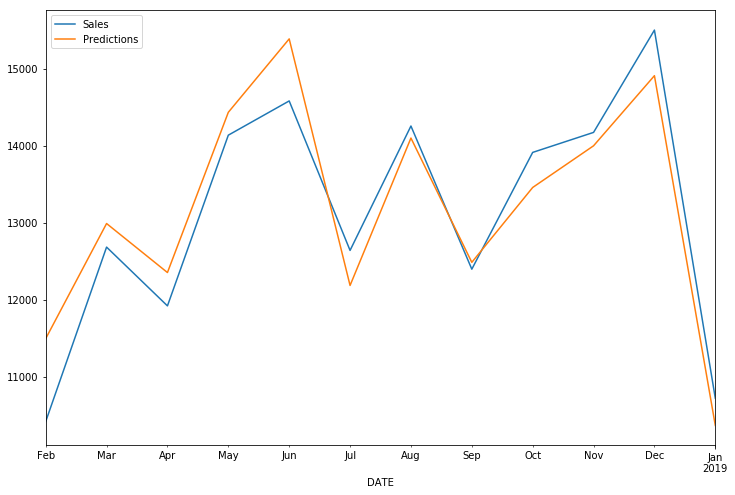

In [ ]:
test.plot(figsize=(12,8))

# Saving and Loading Models

In [ ]:
model.save('my_rnn_model.h5')

## load a model

In [ ]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [ ]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


# RNN Another Example

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [ ]:
df = pd.read_csv('../Data/Miles_Traveled.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [ ]:
df.head()

TRFVOLUSM227NFWA
DATE                        
1970-01-01           80173.0
1970-02-01           77442.0
1970-03-01           90223.0
1970-04-01           89956.0
1970-05-01           97972.0

In [ ]:
df.columns = ['Value']

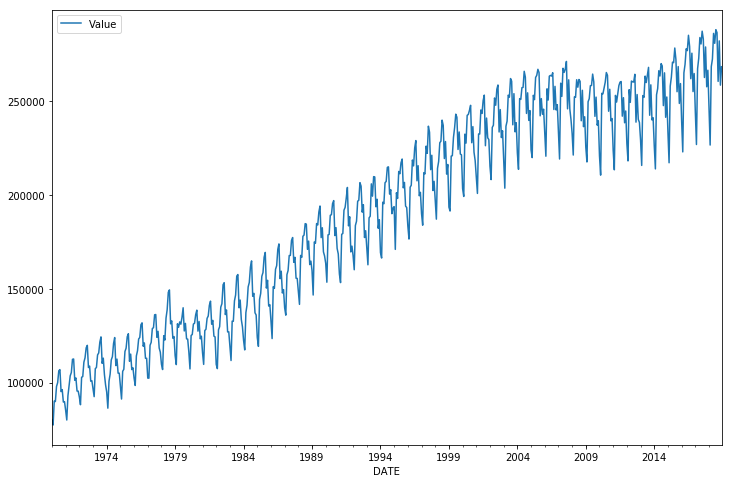

In [ ]:
df.plot(figsize=(12,8))

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

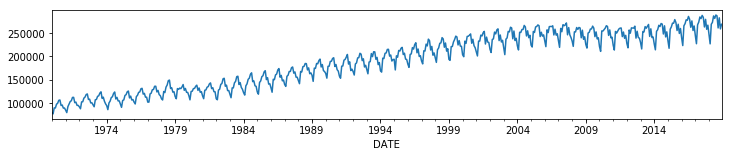

In [ ]:
results = seasonal_decompose(df['Value'])
results.observed.plot(figsize=(12,2))

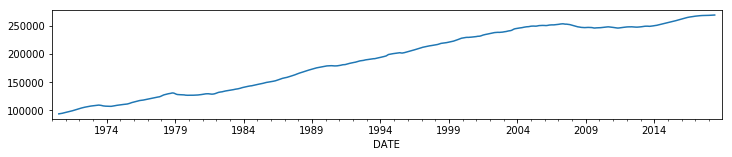

In [ ]:
results.trend.plot(figsize=(12,2))

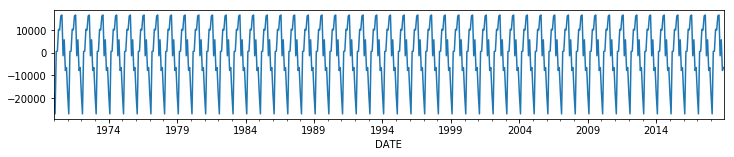

In [ ]:
results.seasonal.plot(figsize=(12,2))

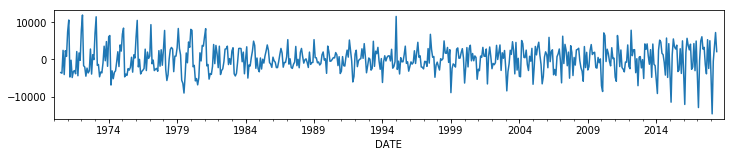

In [ ]:
results.resid.plot(figsize=(12,2))

## Train Test Split

In [ ]:
len(df)

588

In [ ]:
train_len = len(df)-12

In [ ]:
train = df.iloc[:train_len]
test = df.iloc[train_len:]

In [ ]:
len(test)

12

## Scale Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

## Time Series Generator

**Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [ ]:
n_input = 24
n_features=1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

### Create the Model

**Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [ ]:
# fit model
model.fit_generator(generator,epochs=30)

Epoch 1/30
552/552 [==============================] - 18s 33ms/step - loss: 0.0139
Epoch 2/30
552/552 [==============================] - 17s 30ms/step - loss: 0.0070
Epoch 3/30
552/552 [==============================] - 16s 30ms/step - loss: 0.0056
Epoch 4/30
552/552 [==============================] - 16s 29ms/step - loss: 0.0050
Epoch 5/30
552/552 [==============================] - 17s 30ms/step - loss: 0.0036
Epoch 6/30
552/552 [==============================] - 16s 30ms/step - loss: 0.0025
Epoch 7/30
552/552 [==============================] - 16s 30ms/step - loss: 0.0025
Epoch 8/30
552/552 [==============================] - 17s 30ms/step - loss: 0.0018
Epoch 9/30
552/552 [==============================] - 18s 32ms/step - loss: 0.0016
Epoch 10/30
552/552 [==============================] - 19s 34ms/step - loss: 0.0017
Epoch 11/30
552/552 [==============================] - 18s 33ms/step - loss: 0.0016
Epoch 12/30
552/552 [==============================] - 18s 33ms/step - loss: 0.0013
E

In [ ]:
model.history.history.keys()

dict_keys(['loss'])

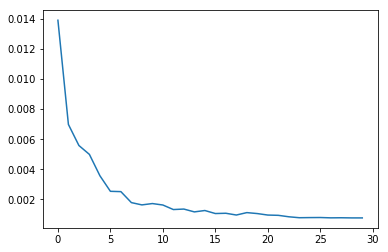

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data


In [ ]:
first_eval_batch = scaled_train[-12:]

In [ ]:
first_eval_batch

array([[0.79630397],
       [0.71226435],
       [0.90477416],
       [0.93121043],
       [0.98386382],
       [0.96757519],
       [1.        ],
       [0.9801859 ],
       [0.8824684 ],
       [0.95995255],
       [0.85883345],
       [0.90086755]])

In [ ]:
first_eval_batch = first_eval_batch.reshape((1, 12, n_features))

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

## Inverse Transformations and Compare

In [ ]:
true_predictions = scaler.inverse_transform(test_predictions)

In [ ]:
true_predictions

array([[244790.4583751 ],
       [233844.90710074],
       [270457.81608635],
       [272201.29687929],
       [279289.6588499 ],
       [279346.60926121],
       [286210.98546427],
       [281885.08126384],
       [268614.50942963],
       [275487.78100669],
       [258639.72996229],
       [262481.15531212]])

In [ ]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\Marcial\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
test

Value    Predictions
DATE                               
2018-01-01  245695.0  244790.458375
2018-02-01  226660.0  233844.907101
2018-03-01  268480.0  270457.816086
2018-04-01  272475.0  272201.296879
2018-05-01  286164.0  279289.658850
2018-06-01  280877.0  279346.609261
2018-07-01  288145.0  286210.985464
2018-08-01  286608.0  281885.081264
2018-09-01  260595.0  268614.509430
2018-10-01  282174.0  275487.781007
2018-11-01  258590.0  258639.729962
2018-12-01  268413.0  262481.155312

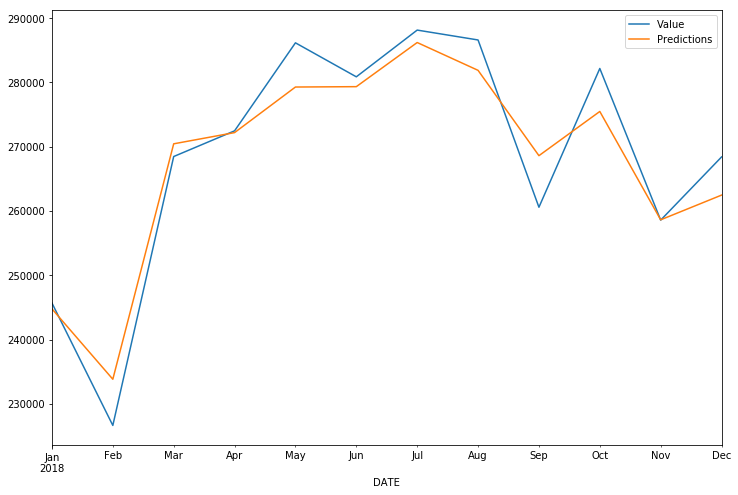

In [ ]:
test.plot(figsize=(12,8))

## Saving Models

In [ ]:
model.save('solutions_model.h5')

# Quick Guide to Facebook's Prophet Basics
---
---

## IMPORTANT NOTE ONE:

**You should really read the papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**

Link to paper: https://peerj.com/preprints/3190.pdf
---
---

## IMPORTANT NOTE TWO:

-----
------

* **NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 
    * SCROLL DOWN UNTIL YOU SEE THE ANACONDA OPTION AT THE BOTTOM OF THE PAGE.
    * YOU MAY NEED TO INSTALL BOTH **conda install gcc** and **conda install -c conda-forge fbprophet**
    * PLEASE READ THROUGH THE DOCS AND STACKOERFLOW CAREFULLY BEFORE POSTING INSTALLATION ISSUES TO THE QA FORUMS.

-----
----

## Load Libraries

In [ ]:
import pandas as pd
from fbprophet import Prophet

## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [ ]:
df = pd.read_csv('../Data/BeerWineLiquor.csv')

In [ ]:
df.head()

date  beer
0  1/1/1992  1509
1  2/1/1992  1541
2  3/1/1992  1597
3  4/1/1992  1675
4  5/1/1992  1822

### Format the Data

In [ ]:
df.columns = ['ds','y']

In [ ]:
df['ds'] = pd.to_datetime(df['ds'])

## Create and Fit Model

In [ ]:
# This is fitting on all the data (no train test split in this example)
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [ ]:
future = m.make_future_dataframe(periods=24,freq = 'MS')

In [ ]:
df.tail()

ds     y
319 2018-08-01  4898
320 2018-09-01  4598
321 2018-10-01  4737
322 2018-11-01  5130
323 2018-12-01  6370

In [ ]:
future.tail()

ds
343 2020-08-01
344 2020-09-01
345 2020-10-01
346 2020-11-01
347 2020-12-01

In [ ]:
len(df)

324

In [ ]:
len(future)

348


### Step 2: Predict and fill in the Future

In [ ]:
forecast = m.predict(future)

In [ ]:
forecast.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 1992-01-01  1773.449803  1137.970143  1466.120871  1773.449803  1773.449803   
1 1992-02-01  1776.239771  1185.694605  1515.005441  1776.239771  1776.239771   
2 1992-03-01  1778.849740  1437.426600  1748.679890  1778.849740  1778.849740   
3 1992-04-01  1781.639707  1420.155130  1753.209179  1781.639707  1781.639707   
4 1992-05-01  1784.339676  1665.749772  1985.649866  1784.339676  1784.339676   

   additive_terms  additive_terms_lower  additive_terms_upper      yearly  \
0     -461.776706           -461.776706           -461.776706 -461.776706   
1     -427.591035           -427.591035           -427.591035 -427.591035   
2     -179.181320           -179.181320           -179.181320 -179.181320   
3     -196.311603           -196.311603           -196.311603 -196.311603   
4       45.026915             45.026915             45.026915   45.026915   

   yearly_lower  yearly_upper  multiplicative_terms  \
0   -461.776706   -461.776706                   0.0   
1   -427.591035   -427.591035                   0.0   
2   -179.181320   -179.181320                   0.0   
3   -196.311603   -196.311603                   0.0   
4     45.026915     45.026915                   0.0   

   multiplicative_terms_lower  multiplicative_terms_upper         yhat  
0                         0.0                         0.0  1311.673097  
1                         0.0                         0.0  1348.648735  
2                         0.0                         0.0  1599.668420  
3                         0.0                         0.0  1585.328104  
4                         0.0                         0.0  1829.366590

In [ ]:
forecast.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
343 2020-08-01  5201.010945  5074.524666  5397.039919  5190.005465   
344 2020-09-01  5217.085200  4932.976994  5246.885844  5205.065711   
345 2020-10-01  5232.640931  5037.574360  5361.483095  5219.696878   
346 2020-11-01  5248.715186  5168.423030  5502.051767  5234.716079   
347 2020-12-01  5264.270916  6160.467499  6497.079944  5249.311816   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
343  5213.185170       40.218725             40.218725             40.218725   
344  5230.470140     -132.884136           -132.884136           -132.884136   
345  5247.521702      -43.275393            -43.275393            -43.275393   
346  5264.968845       86.703091             86.703091             86.703091   
347  5281.695680     1071.508751           1071.508751           1071.508751   

          yearly  yearly_lower  yearly_upper  multiplicative_terms  \
343    40.218725     40.218725     40.218725                   0.0   
344  -132.884136   -132.884136   -132.884136                   0.0   
345   -43.275393    -43.275393    -43.275393                   0.0   
346    86.703091     86.703091     86.703091                   0.0   
347  1071.508751   1071.508751   1071.508751                   0.0   

     multiplicative_terms_lower  multiplicative_terms_upper         yhat  
343                         0.0                         0.0  5241.229670  
344                         0.0                         0.0  5084.201064  
345                         0.0                         0.0  5189.365538  
346                         0.0                         0.0  5335.418277  
347                         0.0                         0.0  6335.779667

In [ ]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [ ]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

ds         yhat   yhat_lower   yhat_upper
336 2020-01-01  4628.788552  4471.253028  4805.818068
337 2020-02-01  4679.048478  4507.791210  4844.742347
338 2020-03-01  4942.495400  4783.785125  5110.230608
339 2020-04-01  4941.439371  4772.041628  5107.288259
340 2020-05-01  5198.333619  5037.037450  5358.603793
341 2020-06-01  5179.412285  5009.729943  5337.560681
342 2020-07-01  5311.959526  5151.814252  5480.267144
343 2020-08-01  5241.229670  5074.524666  5397.039919
344 2020-09-01  5084.201064  4932.976994  5246.885844
345 2020-10-01  5189.365538  5037.574360  5361.483095
346 2020-11-01  5335.418277  5168.423030  5502.051767
347 2020-12-01  6335.779667  6160.467499  6497.079944

### Plotting Forecast

We can use Prophet's own built in plotting tools

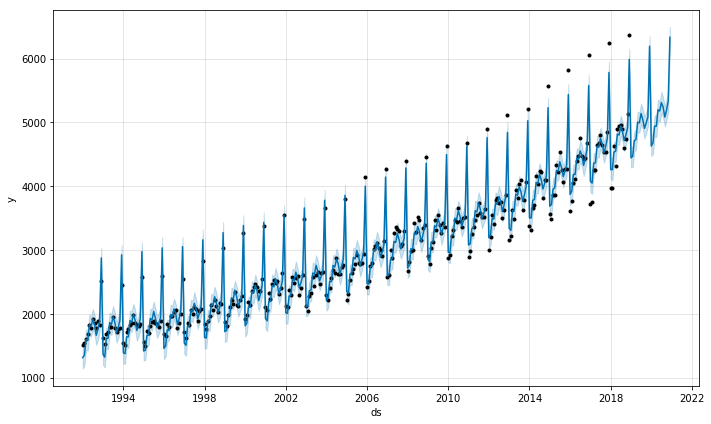

In [ ]:
m.plot(forecast);

(735234.0, 738156.0)

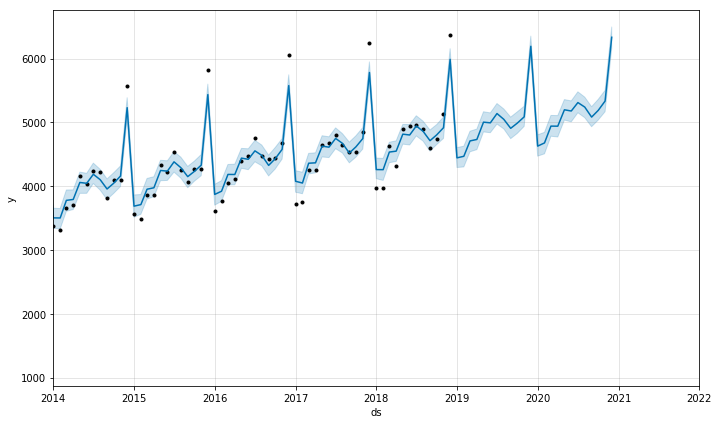

In [ ]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

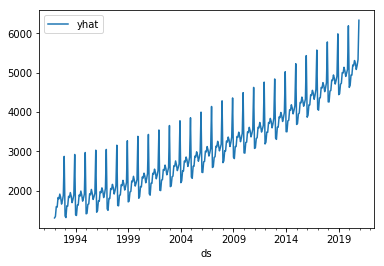

In [ ]:
forecast.plot(x='ds',y='yhat')

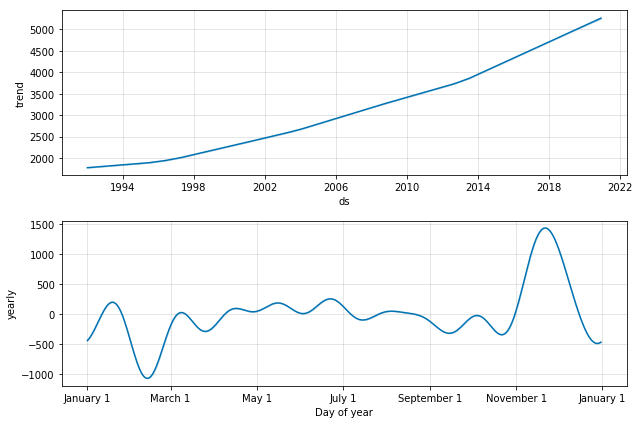

In [ ]:
m.plot_components(forecast);


# Forecast Evaluations

### Classic Train/Test Split

In [ ]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [ ]:
df = pd.read_csv('../Data/Miles_Traveled.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588 entries, 0 to 587
Data columns (total 2 columns):
DATE                588 non-null object
TRFVOLUSM227NFWA    588 non-null float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [ ]:
df.head()

DATE  TRFVOLUSM227NFWA
0  1970-01-01           80173.0
1  1970-02-01           77442.0
2  1970-03-01           90223.0
3  1970-04-01           89956.0
4  1970-05-01           97972.0

In [ ]:
df.columns = ['ds','y']

In [ ]:
# YOU CAN SAFELY IGNORE THIS COPY WARNING
# CHECK THE DOCS LINK FOR MORE INFO ON THIS COPY WARNING
df['ds'] = pd.to_datetime(df['ds'])

In [ ]:
df.head()

ds        y
0 1970-01-01  80173.0
1 1970-02-01  77442.0
2 1970-03-01  90223.0
3 1970-04-01  89956.0
4 1970-05-01  97972.0

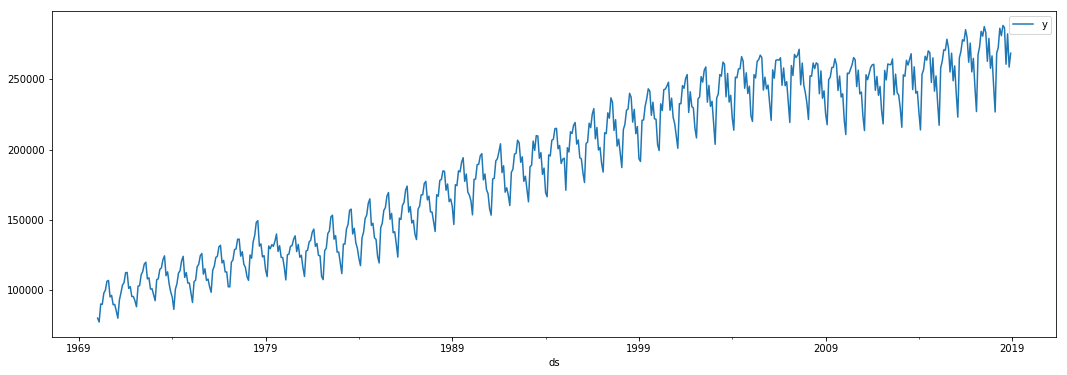

In [ ]:
df.plot(x='ds',y='y',figsize=(18,6))

In [ ]:
len(df)

588

In [ ]:
len(df) - 12

576

In [ ]:
train = df.iloc[:576]
test = df.iloc[576:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [ ]:
forecast.tail()

ds          trend     yhat_lower     yhat_upper    trend_lower  \
583 2018-08-01  263348.877048  274069.034629  285530.763538  263272.182929   
584 2018-09-01  263489.606772  255853.724067  267198.537533  263369.019000   
585 2018-10-01  263625.796827  263247.354895  274539.143701  263477.532695   
586 2018-11-01  263766.526551  250087.267929  261329.148126  263586.328108   
587 2018-12-01  263902.716607  251026.012016  262766.066957  263680.350517   

       trend_upper  additive_terms  additive_terms_lower  \
583  263408.698329    16448.763644          16448.763644   
584  263577.835001    -1669.492450          -1669.492450   
585  263745.882773     5307.799177           5307.799177   
586  263936.075269    -8206.692440          -8206.692440   
587  264106.895858    -6920.633214          -6920.633214   

     additive_terms_upper        yearly  yearly_lower  yearly_upper  \
583          16448.763644  16448.763644  16448.763644  16448.763644   
584          -1669.492450  -1669.492450  -1669.492450  -1669.492450   
585           5307.799177   5307.799177   5307.799177   5307.799177   
586          -8206.692440  -8206.692440  -8206.692440  -8206.692440   
587          -6920.633214  -6920.633214  -6920.633214  -6920.633214   

     multiplicative_terms  multiplicative_terms_lower  \
583                   0.0                         0.0   
584                   0.0                         0.0   
585                   0.0                         0.0   
586                   0.0                         0.0   
587                   0.0                         0.0   

     multiplicative_terms_upper           yhat  
583                         0.0  279797.640692  
584                         0.0  261820.114321  
585                         0.0  268933.596004  
586                         0.0  255559.834111  
587                         0.0  256982.083393

In [ ]:
test.tail()

ds         y
583 2018-08-01  286608.0
584 2018-09-01  260595.0
585 2018-10-01  282174.0
586 2018-11-01  258590.0
587 2018-12-01  268413.0

[Info on ax= parameter](https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure)

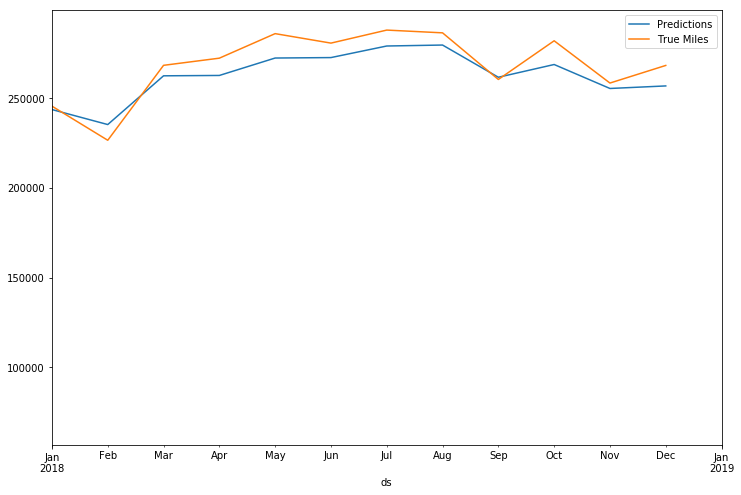

In [ ]:
ax = forecast.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Miles',legend=True,ax=ax,xlim=('2018-01-01','2019-01-01'))

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-12:]['yhat']

In [ ]:
predictions

576    243796.609534
577    235426.627562
578    262627.330849
579    262828.742010
580    272552.156586
581    272803.877580
582    279261.432668
583    279797.640692
584    261820.114321
585    268933.596004
586    255559.834111
587    256982.083393
Name: yhat, dtype: float64

In [ ]:
test['y']

576    245695.0
577    226660.0
578    268480.0
579    272475.0
580    286164.0
581    280877.0
582    288145.0
583    286608.0
584    260595.0
585    282174.0
586    258590.0
587    268413.0
Name: y, dtype: float64

In [ ]:
rmse(predictions,test['y'])

8661.095901709492

In [ ]:
test.mean()

y    268739.666667
dtype: float64

# Prophet Diagnostics

Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values.

In [ ]:
from fbprophet.diagnostics import cross_validation,performance_metrics
from fbprophet.plot import plot_cross_validation_metric

In [ ]:
len(df)

588

In [ ]:
len(df)/12

49.0

The initial period should be long enough to capture all of the components of the model, in particular seasonalities and extra regressors: at least a year for yearly seasonality, at least a week for weekly seasonality, etc.

In [ ]:
# help(pd.Timedelta)

In [ ]:
# Initial 5 years training period
initial = 5 * 365
initial = str(initial) + ' days'
# Fold every 5 years
period = 5 * 365
period = str(period) + ' days'
# Forecast 1 year into the future
horizon = 365
horizon = str(horizon) + ' days'

In [ ]:
df_cv = cross_validation(m, initial=initial, period=period, horizon = horizon)

INFO:fbprophet:Making 9 forecasts with cutoffs between 1976-12-11 00:00:00 and 2016-12-01 00:00:00
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [ ]:
df_cv.head()

ds           yhat     yhat_lower     yhat_upper         y     cutoff
0 1977-01-01  108545.172580  107099.748151  110016.346952  102445.0 1976-12-11
1 1977-02-01  103082.245846  101525.992338  104689.450272  102416.0 1976-12-11
2 1977-03-01  118966.635618  117449.707291  120459.804913  119960.0 1976-12-11
3 1977-04-01  120606.270683  119041.821340  122263.557564  121513.0 1976-12-11
4 1977-05-01  127889.386836  126347.199524  129456.699558  128884.0 1976-12-11

In [ ]:
df_cv.tail()

ds           yhat     yhat_lower     yhat_upper         y  \
103 2017-08-01  273254.523501  267202.320371  279511.599691  283184.0   
104 2017-09-01  255372.720203  249330.743827  261084.844672  262673.0   
105 2017-10-01  262476.518564  256769.520993  268001.419001  278937.0   
106 2017-11-01  249126.648938  243459.338900  254747.159187  257712.0   
107 2017-12-01  250371.688410  244625.193390  256090.260107  266535.0   

        cutoff  
103 2016-12-01  
104 2016-12-01  
105 2016-12-01  
106 2016-12-01  
107 2016-12-01

In [ ]:
performance_metrics(df_cv)

horizon           mse         rmse          mae      mape  coverage
1    52 days  2.484109e+07  4984.083210  4590.014835  0.028137       0.3
13   53 days  2.226842e+07  4718.943023  4318.899977  0.025335       0.3
25   54 days  1.882583e+07  4338.874820  3803.991852  0.020509       0.4
37   55 days  2.374039e+07  4872.411127  4319.472747  0.023528       0.3
49   57 days  2.150039e+07  4636.851520  4050.449106  0.021775       0.4
61   58 days  2.377014e+07  4875.463292  4327.071181  0.022979       0.3
73   59 days  3.857268e+07  6210.691064  5144.794773  0.026666       0.3
85   60 days  3.959640e+07  6292.566974  5229.654576  0.027225       0.3
97   62 days  3.773627e+07  6142.985167  4985.238970  0.026153       0.4
2    80 days  3.264865e+07  5713.899872  4364.416238  0.024037       0.5
14   81 days  3.287214e+07  5733.423310  4461.461888  0.024663       0.5
26   82 days  3.273578e+07  5721.519435  4440.708849  0.023530       0.6
38   84 days  3.384815e+07  5817.916077  4706.128999  0.024828       0.6
50   85 days  2.983983e+07  5462.584849  4343.936561  0.022000       0.7
62   86 days  2.905115e+07  5389.912117  4085.532750  0.020567       0.7
74   87 days  2.775881e+07  5268.662783  3951.324112  0.019528       0.8
86   89 days  1.430251e+07  3781.865304  3254.512729  0.015944       0.8
98   90 days  2.108837e+07  4592.207361  3655.515480  0.016900       0.8
3   111 days  2.050330e+07  4528.056835  3487.869704  0.016508       0.8
15  112 days  2.102938e+07  4585.780229  3638.485039  0.017605       0.8
27  113 days  2.267923e+07  4762.271752  3912.733905  0.019068       0.7
39  115 days  2.221524e+07  4713.304385  3828.720432  0.018308       0.7
51  116 days  2.148911e+07  4635.634353  3697.477130  0.017444       0.7
63  117 days  2.010623e+07  4483.996740  3341.901127  0.015758       0.7
75  118 days  2.133499e+07  4618.981764  3669.814813  0.017050       0.7
87  120 days  1.967055e+07  4435.148827  3327.928592  0.015744       0.7
99  121 days  4.166916e+07  6455.165095  4317.240942  0.019222       0.7
4   141 days  3.081409e+07  5551.044078  3370.089073  0.016079       0.8
16  142 days  3.438259e+07  5863.667285  3883.627983  0.019640       0.7
28  143 days  3.514306e+07  5928.158078  4005.862058  0.019933       0.6
..       ...           ...          ...          ...       ...       ...
80  271 days  3.987511e+07  6314.674121  4976.697924  0.023250       0.4
92  273 days  4.844885e+07  6960.520511  5553.268374  0.025891       0.4
104 274 days  5.344181e+07  7310.390781  6099.873093  0.027976       0.3
9   294 days  4.358237e+07  6601.694686  5107.910769  0.024477       0.4
21  295 days  4.833680e+07  6952.467359  5700.946543  0.028662       0.3
33  296 days  4.493632e+07  6703.455933  5371.935619  0.025776       0.4
45  298 days  4.346401e+07  6592.723880  5032.356394  0.023663       0.5
57  299 days  4.552935e+07  6747.544186  5373.830620  0.025112       0.4
69  300 days  4.552068e+07  6746.901166  5365.366312  0.025043       0.4
81  301 days  4.089633e+07  6395.023462  4890.486857  0.022897       0.5
93  303 days  2.522518e+07  5022.467234  3784.087415  0.018380       0.6
105 304 days  4.167387e+07  6455.530562  4398.338718  0.019962       0.6
10  325 days  3.647964e+07  6039.837575  3784.574064  0.018164       0.7
22  326 days  3.777531e+07  6146.162380  4143.544816  0.020989       0.6
34  327 days  3.309616e+07  5752.926051  3581.869386  0.016836       0.7
46  329 days  3.890957e+07  6237.753416  4069.502509  0.019459       0.6
58  330 days  3.977554e+07  6306.784866  4320.509403  0.020690       0.6
70  331 days  3.850361e+07  6205.127551  4158.292100  0.019899       0.7
82  332 days  4.235969e+07  6508.432077  4734.018144  0.022242       0.6
94  334 days  4.215073e+07  6492.359713  4687.867562  0.022133       0.6
106 335 days  4.928129e+07  7020.063687  5391.397587  0.024853       0.5
11  355 days  2.293877e+07  4789.443607  4019.615883  0.021311       0.5
23  356 days  2.458287e+07  4958.111216  4325.166305  0.023648 

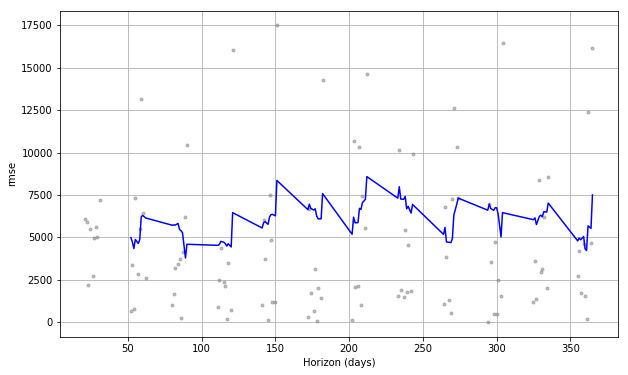

In [ ]:
plot_cross_validation_metric(df_cv, metric='rmse');

MAPE is Mean Absolute Percentage Error

https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

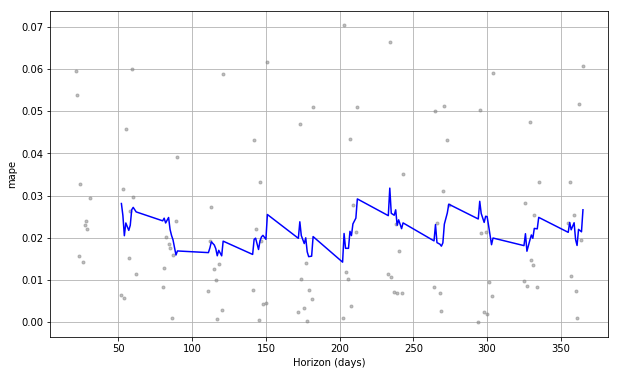

In [ ]:
plot_cross_validation_metric(df_cv, metric='mape');

# Trend Changes

In [ ]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [ ]:
df = pd.read_csv('../Data/HospitalityEmployees.csv')

In [ ]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

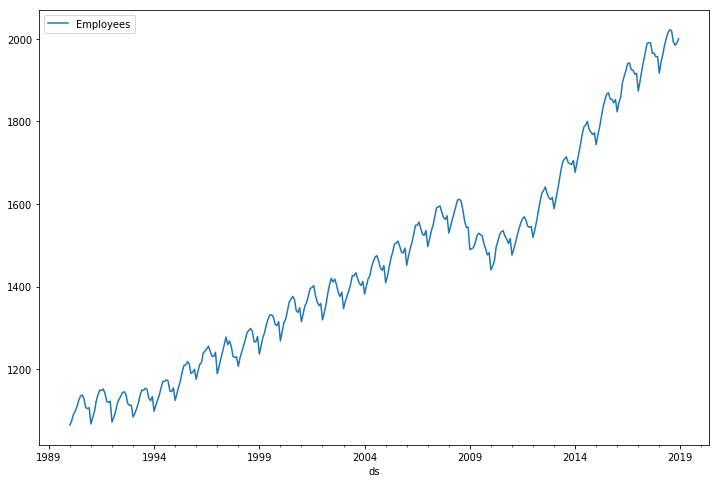

In [ ]:
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [ ]:
len(df)

348

In [ ]:
len(df) - 12

336

In [ ]:
train = df.iloc[:336]
test = df.iloc[336:]

In [ ]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


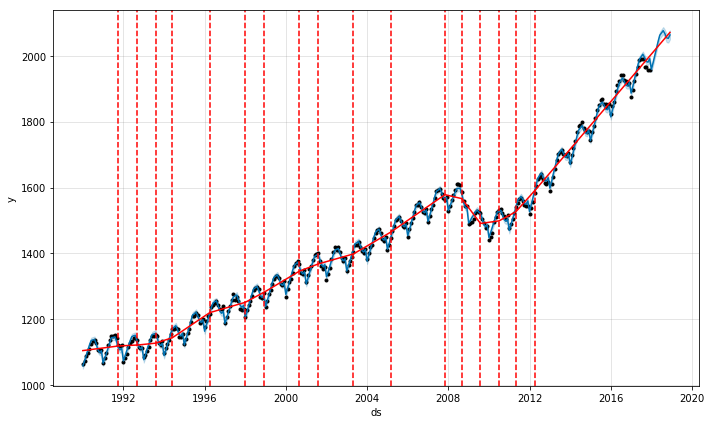

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Changing Seasonality

In [ ]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [ ]:
df = pd.read_csv('../Data/airline_passengers.csv')

In [ ]:
df.head()

Month  Thousands of Passengers
0  1949-01                      112
1  1949-02                      118
2  1949-03                      132
3  1949-04                      129
4  1949-05                      121

In [ ]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


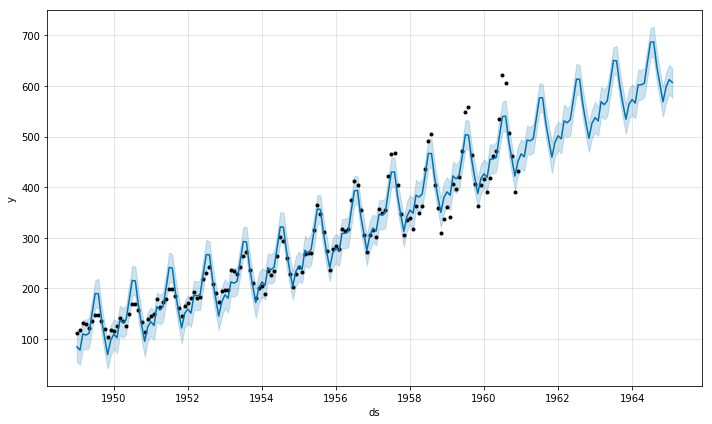

In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

This time series has a clear yearly cycle, but the seasonality in the forecast is too large at the start of the time series and too small at the end. In this time series, the seasonality is not a constant additive factor as assumed by Prophet, rather it grows with the trend. This is multiplicative seasonality.

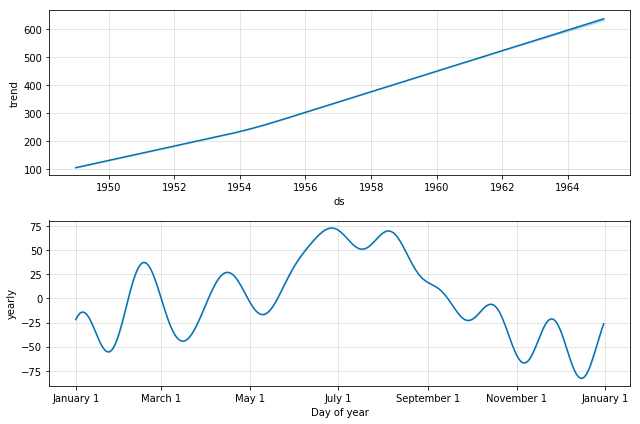

In [ ]:
fig = m.plot_components(forecast)

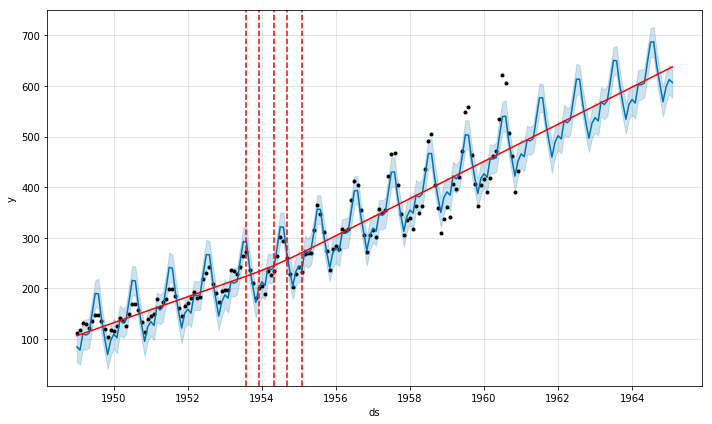

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

### Change to Multiplicative 

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


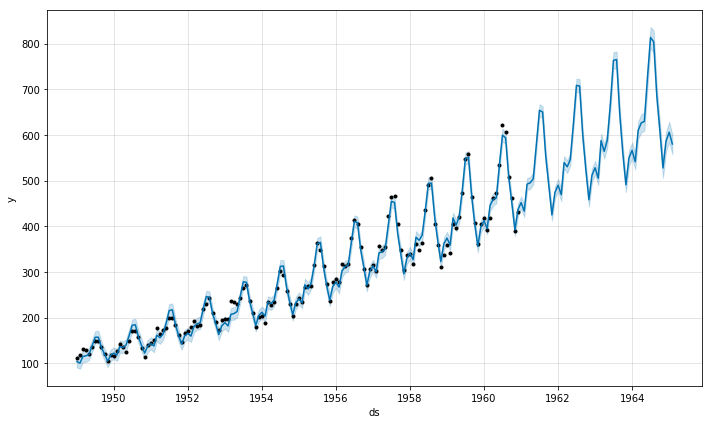

In [ ]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

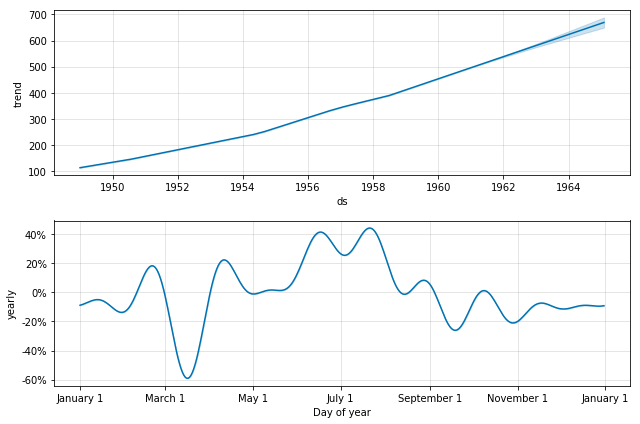

In [ ]:
fig = m.plot_components(forecast)

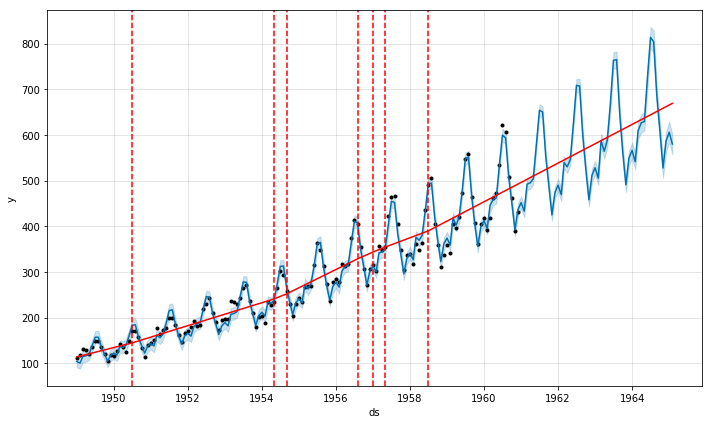

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

# Datasets Used In This template
In no particular order these are the datasets used throughout the course. In most cases we have modified the source data to build .csv files with selected columns, records, and a DateTime index.

[CO2 Levels atop Mauna Loa, HI](#CO2-Levels-atop-Mauna-Loa,-HI)<br>
[US Macroeconomic Data](#US-Macroeconomic-Data)<br>
[Starbucks Stock Data](#Starbucks-Stock-Data)<br>
[Energy Production](#Energy-Production)<br>
[US Population Data](#U.S.-Population-Data)<br>
[Temperature Data - Mt. Washington, NH](#Temperature-Data---Mt.-Washington,-NH)<br>
[Temperature Data - Mauna Loa, HI](#Temperature-Data---Mauna-Loa,-HI)<br>
[Airline Passengers](#Airline-Passengers)<br>
[Daily Total Female Births](#Daily-Total-Female-Births)<br>
[Monthly Milk Production](#Monthly-Milk-Production)<br>
[Danube River Discharge](#Danube-River-Discharge)<br>
[Rhine River Discharge](#Rhine-River-Discharge)<br>
[Price of Ground Chuck](#Price-of-Ground-Chuck)<br>
[Real Manufacturing and Trade Inventories](#Real-Manufacturing-and-Trade-Inventories)<br>
[California Publishing Industry Employees](#California-Publishing-Industry-Employees)<br>
[California Hospitality Industry Employees](#California-Hospitality-Industry-Employees)<br>
[RideAustin](#RideAustin)<br>
[Value of Manufacturers' Shipments](#Value-of-Manufacturers'-Shipments)<br>
[M2 Money Stock](#M2-Money-Stock)<br>
[Personal Spending](#Personal-Spending)<br>
[US Population by County](#U.S.-Population-by-County)<br>

<div class="alert alert-info"><h3>Additional Resources:</h3>

<strong>
<a href='https://fred.stlouisfed.org/'>Federal Reserve Bank of St. Louis</a></strong>&nbsp;&nbsp;<font color=black>Federal Reserve Economic Data (FRED)</font><br>

<strong>
<a href='https://www.ncdc.noaa.gov/data-access'>NOAA</a></strong>&nbsp;&nbsp;<font color=black>National Centers for Environmental Information (NCEI) (formerly NCDC)</font><br>
<strong>
<a href='https://www.statsmodels.org/stable/datasets/index.html'>Statsmodels</a></strong>&nbsp;&nbsp;<font color=black>Datasets Package</font><br>
<strong>
<a href='https://www.census.gov/econ/currentdata/'>U.S. Census Bureau</a></strong>&nbsp;&nbsp;<font color=black>Business and Industry; Time Series/Trend Charts</font><br>
<strong>
<a href='https://www.bls.gov/data/'>U.S. Dept. of Labor</a></strong>&nbsp;&nbsp;<font color=black>Bureau of Labor Statistics</font><br>

NOTE: As of April 15th, 2019 <a href='https://datamarket.com/'>DataMarket.com</a> is no longer available. DataMarket has been acquired by <a href='https://www.qlik.com/us/products/qlik-data-market'>Qlik</a>.
</div>

### Perform Standard Imports

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
%matplotlib inline

___
##  CO2 Levels atop Mauna Loa, HI 
Atmospheric CO₂ levels from air samples collected at Mauna Loa Observatory, Hawaii, USA from March 1958 to November 2018.<br>
This dataset lacks a DateTime index, and instead relies on a decimal_date value supplied by the provider. Also, missing data is handled with an interpolated values column.
Source: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

In [ ]:
df1 = pd.read_csv('../Data/co2_mm_mlo.csv')
df1.head()

year  month  decimal_date  average  interpolated
0  1958      3      1958.208   315.71        315.71
1  1958      4      1958.292   317.45        317.45
2  1958      5      1958.375   317.50        317.50
3  1958      6      1958.458      NaN        317.10
4  1958      7      1958.542   315.86        315.86

In [ ]:
# To create a DatetimeIndex
df1['date']=pd.to_datetime(dict(year=df1['year'], month=df1['month'], day=1))
df1.set_index('date',inplace=True)
df1.index.freq = 'MS'
df1.head()

year  month  decimal_date  average  interpolated
date                                                        
1958-03-01  1958      3      1958.208   315.71        315.71
1958-04-01  1958      4      1958.292   317.45        317.45
1958-05-01  1958      5      1958.375   317.50        317.50
1958-06-01  1958      6      1958.458      NaN        317.10
1958-07-01  1958      7      1958.542   315.86        315.86

### Alternatively, load from statsmodels built-in datasets
<div class="alert alert-danger"><strong>NOTE: </strong>At the time of this writing the statsmodels co2 dataset has a <a href='https://github.com/statsmodels/statsmodels/issues/4775'>known issue</a> with pandas.<br>
<tt><font color=black>&nbsp;&nbsp;df = sm.datasets.co2.load_pandas().data</font></tt><br>
raises <tt>TypeError: __new__() got an unexpected keyword argument 'format'</tt><br>
This is due to be fixed in an upcoming release.</div>

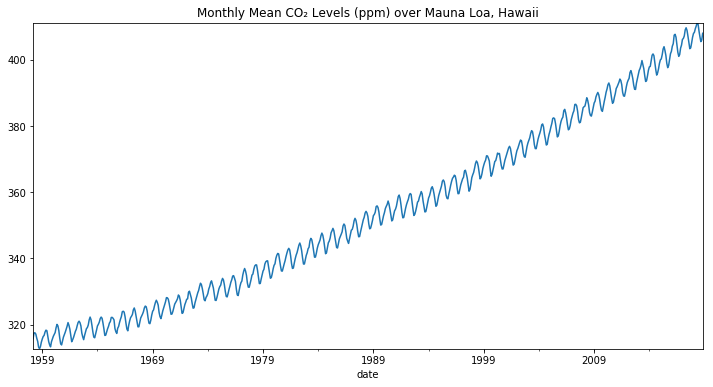

In [ ]:
title = 'Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
#df1.plot('decimal_date','interpolated',figsize=(12,6),title=title).autoscale(axis='both',tight=True);
df1['interpolated'].plot(figsize=(12,6),title=title).autoscale(axis='both',tight=True);

___
## US Macroeconomic Data
Contains U.S. Macroeconomic Data from Q1 1959 to Q3 2009.

In [ ]:
df2 = pd.read_csv('../Data/macrodata.csv',index_col=0,parse_dates=True)
df2.head()

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959-03-31  1959        1  2710.349    1707.4  286.898   470.045   1886.9   
1959-06-30  1959        2  2778.801    1733.7  310.859   481.301   1919.7   
1959-09-30  1959        3  2775.488    1751.8  289.226   491.260   1916.4   
1959-12-31  1959        4  2785.204    1753.7  299.356   484.052   1931.3   
1960-03-31  1960        1  2847.699    1770.5  331.722   462.199   1955.5   

              cpi     m1  tbilrate  unemp      pop  infl  realint  
1959-03-31  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959-06-30  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959-09-30  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959-12-31  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960-03-31  29.54  139.6      3.50    5.2  180.007  2.31     1.19

### Alternatively, load from statsmodels built-in datasets

In [ ]:
df2sm = sm.datasets.macrodata.load_pandas().data
df2sm.index = pd.Index(sm.tsa.datetools.dates_from_range('1959Q1', '2009Q3'))
print(sm.datasets.macrodata.NOTE)
df2sm.head()

::
    Number of Observations - 203

    Number of Variables - 14

    Variable name definitions::

        year      - 1959q1 - 2009q3
        quarter   - 1-4
        realgdp   - Real gross domestic product (Bil. of chained 2005 US$,
                    seasonally adjusted annual rate)
        realcons  - Real personal consumption expenditures (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realinv   - Real gross private domestic investment (Bil. of chained
                    2005 US$, seasonally adjusted annual rate)
        realgovt  - Real federal consumption expenditures & gross investment
                    (Bil. of chained 2005 US$, seasonally adjusted annual rate)
        realdpi   - Real private disposable income (Bil. of chained 2005
                    US$, seasonally adjusted annual rate)
        cpi       - End of the quarter consumer price index for all urban
                    consumers: all items (1982-84 = 100, seasonally adju

year  quarter   realgdp  realcons  realinv  realgovt  realdpi  \
1959-03-31  1959.0      1.0  2710.349    1707.4  286.898   470.045   1886.9   
1959-06-30  1959.0      2.0  2778.801    1733.7  310.859   481.301   1919.7   
1959-09-30  1959.0      3.0  2775.488    1751.8  289.226   491.260   1916.4   
1959-12-31  1959.0      4.0  2785.204    1753.7  299.356   484.052   1931.3   
1960-03-31  1960.0      1.0  2847.699    1770.5  331.722   462.199   1955.5   

              cpi     m1  tbilrate  unemp      pop  infl  realint  
1959-03-31  28.98  139.7      2.82    5.8  177.146  0.00     0.00  
1959-06-30  29.15  141.7      3.08    5.1  177.830  2.34     0.74  
1959-09-30  29.35  140.5      3.82    5.3  178.657  2.74     1.09  
1959-12-31  29.37  140.0      4.33    5.6  179.386  0.27     4.06  
1960-03-31  29.54  139.6      3.50    5.2  180.007  2.31     1.19

___
## Starbucks Stock Data
Contains daily closing prices and daily trading volumes for Starbucks stock from 2015 to 2018.

In [ ]:
df3 = pd.read_csv('../Data/starbucks.csv', index_col='Date', parse_dates=True)
df3.head()

Close    Volume
Date                         
2015-01-02  38.0061   6906098
2015-01-05  37.2781  11623796
2015-01-06  36.9748   7664340
2015-01-07  37.8848   9732554
2015-01-08  38.4961  13170548

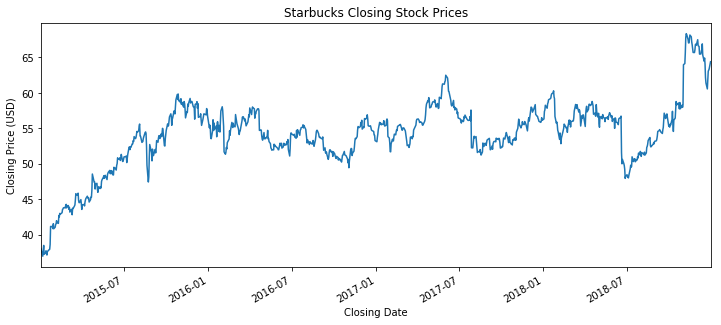

In [ ]:
title='Starbucks Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Closing Date'

ax = df3['Close'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Energy Production
Contains data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989. Source: https://fred.stlouisfed.org/series/IPG2211A2N

In [ ]:
df4 = pd.read_csv('../Data/EnergyProduction.csv',index_col=0,parse_dates=True)
df4.head()

EnergyIndex
DATE                   
1970-01-01      43.0869
1970-02-01      42.5577
1970-03-01      41.6215
1970-04-01      40.1982
1970-05-01      39.9321

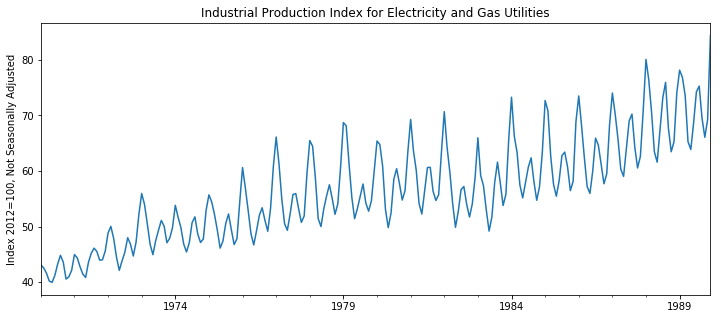

In [ ]:
title='Industrial Production Index for Electricity and Gas Utilities'
ylabel='Index 2012=100, Not Seasonally Adjusted'
xlabel=''

ax = df4['EnergyIndex'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## U.S. Population Data
Contains monthly U.S. population estimates in thousands from January 2011 to December 2018 (96 records, or 8 years of data). Population includes resident population plus armed forces overseas. The monthly estimate is the average of estimates for the first of the month and the first of the following month.<br>
Source: https://fred.stlouisfed.org/series/POPTHM

In [ ]:
df5 = pd.read_csv('../Data/uspopulation.csv',index_col=0,parse_dates=True)
df5.head()

PopEst
DATE              
2011-01-01  311037
2011-02-01  311189
2011-03-01  311351
2011-04-01  311522
2011-05-01  311699

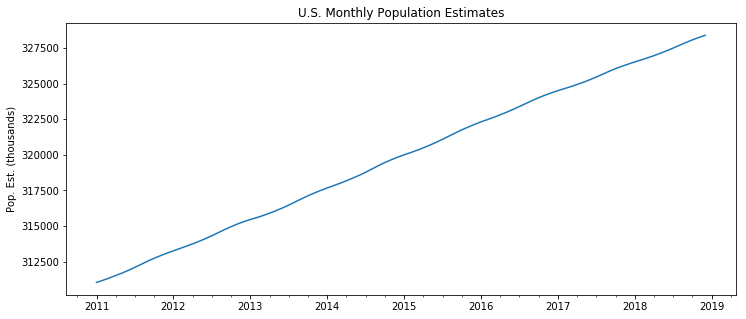

In [ ]:
title='U.S. Monthly Population Estimates'
ylabel='Pop. Est. (thousands)'
xlabel='' # we don't really need a label here

ax = df5['PopEst'].plot(figsize=(12,5),title=title);
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Temperature Data - Mt. Washington, NH
Contains Daily Minimum Dry Bulb Temperatures (°F) recorded on the summit of Mt. Washington in New Hampshire from December 1, 2014 to November 30, 2018. The dataset contains four years of temperature data. (1461 records, 7 columns)<br>
Source: https://www.ncdc.noaa.gov/data-access

In [ ]:
df6 = pd.read_csv('../Data/MtWashingtonDailyTemps.csv',index_col='DATE',parse_dates=True)
df6.index.freq = 'D'
df6.head()

MinTemp  MaxTemp  AvgTemp  AvgWindSpeed  Sunrise  Sunset
DATE                                                                
2014-12-01        3       36       20          65.1      700    1608
2014-12-02        1       22       12          34.7      702    1607
2014-12-03        8       32       20          53.0      703    1607
2014-12-04       -5        9        2          60.2      704    1607
2014-12-05        6       17       12          30.5      705    1607

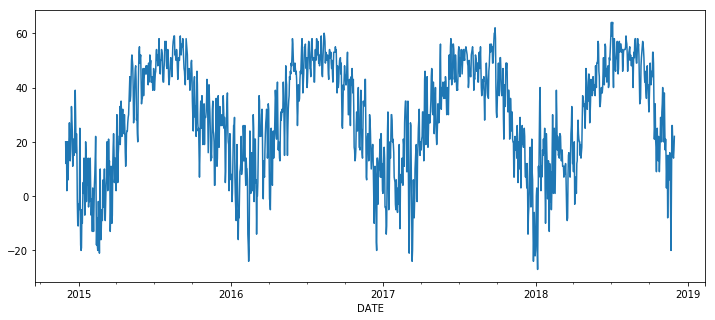

In [ ]:
df6['AvgTemp'].plot(figsize=(12,5));

___
## Temperature Data - Mauna Loa, HI
Contains Daily Minimum Dry Bulb Temperatures (°F) recorded at Mauna Loa in Hawaii from January 1, 2014 to December 30, 2018. The dataset contains five years of temperature data. (1825 records, 6 columns)<br>
Source: https://www.ncdc.noaa.gov/data-access

In [ ]:
df7 = pd.read_csv('../Data/MaunaLoaDailyTemps.csv',index_col='DATE',parse_dates=True)
df7.index.freq = 'D'
df7.head()

MinTemp  MaxTemp  AvgTemp  Sunrise  Sunset
DATE                                                  
2014-01-01     33.0     46.0     40.0      657    1756
2014-01-02     35.0     50.0     43.0      657    1756
2014-01-03     36.0     45.0     41.0      657    1757
2014-01-04     32.0     41.0     37.0      658    1757
2014-01-05     24.0     38.0     31.0      658    1758

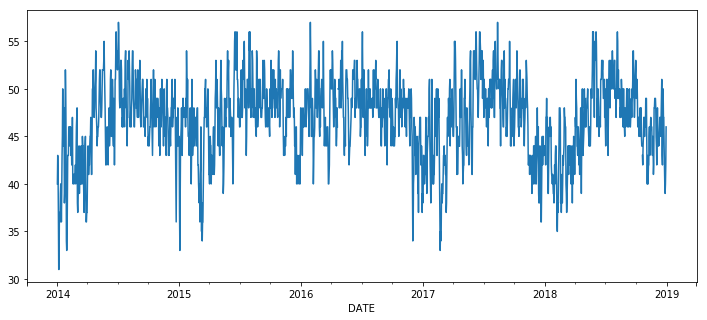

In [ ]:
df7['AvgTemp'].plot(figsize=(12,5));

## Airline Passengers


In [ ]:
df8 = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df8.index.freq = 'MS'
df8.head()

Thousands of Passengers
Month                              
1949-01-01                      112
1949-02-01                      118
1949-03-01                      132
1949-04-01                      129
1949-05-01                      121

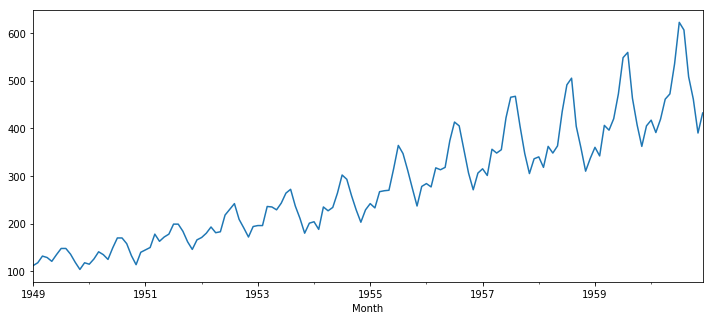

In [ ]:
df8['Thousands of Passengers'].plot(figsize=(12,5)).autoscale(axis='x',tight=True);

___
## Daily Total Female Births
Contains Daily Total Female Births in California during 1959. The dataset contains 365 records.<br>
Source: https://datamarket.com/data/set/235k/daily-total-female-births-in-california-1959

In [ ]:
df9 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date',parse_dates=True)
df9.index.freq = 'D'
df9.head()

Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44

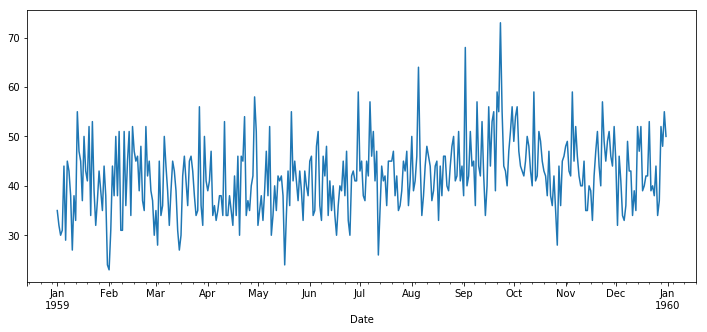

In [ ]:
df9['Births'].plot(figsize=(12,5));

___
## Monthly Milk Production
Contains monthly milk production values in pounds per cow from January 1962 to December 1975. (168 records, 2 columns)<br>
Source: https://datamarket.com/data/set/22ox/monthly-milk-production-pounds-per-cow-jan-62-dec-75

In [ ]:
df10 = pd.read_csv('../Data/monthly_milk_production.csv',index_col='Date',parse_dates=True)
df10.index.freq = 'MS'
df10.head()

Production
Date                  
1962-01-01         589
1962-02-01         561
1962-03-01         640
1962-04-01         656
1962-05-01         727

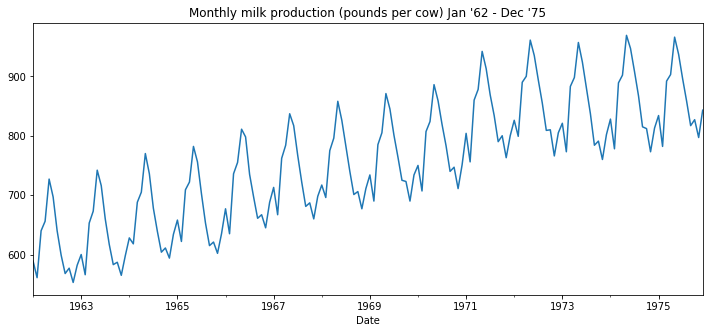

In [ ]:
title = "Monthly milk production (pounds per cow) Jan '62 - Dec '75"
df10['Production'].plot(title=title,figsize=(12,5)).autoscale(axis='x', tight=True);

In [ ]:
df10.describe().transpose()

count        mean         std    min     25%    50%    75%    max
Production  168.0  754.708333  102.204524  553.0  677.75  761.0  824.5  969.0

___
## Danube River Discharge
Mean annual discharge $(m^{3}/s)$ of the Danube River at Orshava, Romania, 1837–1957 (120 records)<br>Source: https://datamarket.com/data/set/22qc/danube-river-at-orshava-romania-1837-1957

In [ ]:
df11 = pd.read_csv('../Data/danube_river_discharge.csv',index_col='Year',parse_dates=True)
df11.index.freq = 'AS'
df11.head()

Discharge
Year                 
1837-01-01   6315.937
1838-01-01   6015.683
1839-01-01   4525.167
1840-01-01   5361.574
1841-01-01   4267.812

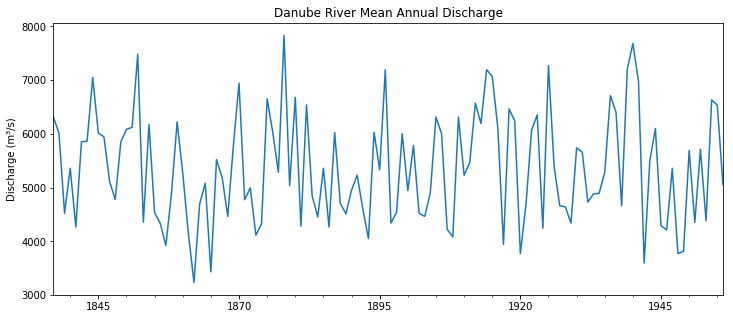

In [ ]:
title = 'Danube River Mean Annual Discharge'
ylabel='Discharge (m³/s)'
xlabel='' # we don't really need a label here

ax = df11['Discharge'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Rhine River Discharge
Mean annual discharge $(m^{3}/s)$ of the Rhine River near Basel, Switzerland, 1807–1957 (150 records)<br>Source: https://datamarket.com/data/set/22wp/rhine-river-near-basle-switzerland-1807-1957

In [ ]:
df12 = pd.read_csv('../Data/rhine_river_discharge.csv',index_col='Year',parse_dates=True)
df12.index.freq = 'AS'
df12.head()

Discharge
Year                 
1807-01-01    864.884
1808-01-01   1033.141
1809-01-01    826.923
1810-01-01   1018.777
1811-01-01   1118.296

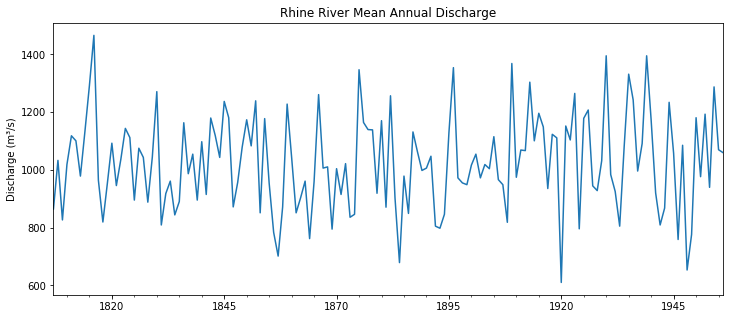

In [ ]:
title = 'Rhine River Mean Annual Discharge'
ylabel='Discharge (m³/s)'
xlabel='' # we don't really need a label here

ax = df12['Discharge'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Price of Ground Chuck
Average price of ground chuck (100% beef) per pound. Source: U.S. Bureau of Labor Statistics, Consumer Price Index<br>
https://www.bls.gov/charts/consumer-price-index/consumer-price-index-average-price-data.htm 

In [ ]:
df13 = pd.read_csv('../Data/price_of_ground_chuck.csv',index_col='Month',parse_dates=True)
df13.index.freq = 'MS'
df13.head()

Price
Month            
1999-02-01  1.862
1999-03-01  1.834
1999-04-01  1.833
1999-05-01  1.812
1999-06-01  1.815

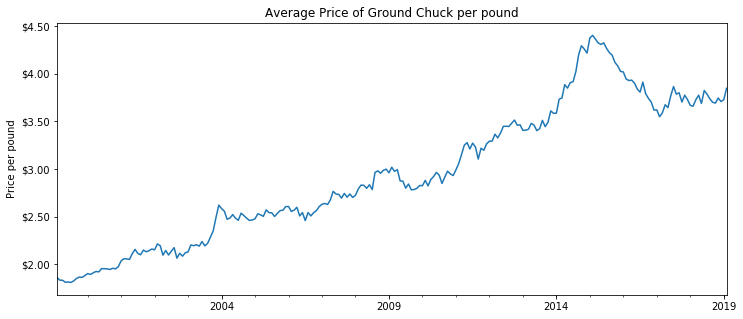

In [ ]:
# HERE'S A TRICK TO PUT DOLLAR SIGNS ON Y-AXIS TICKS
import matplotlib.ticker as ticker
formatter = ticker.FormatStrFormatter('$%1.2f')

title = 'Average Price of Ground Chuck per pound'
ylabel='Price per pound'
xlabel='' # we don't really need a label here

ax = df13['Price'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

___
## Real Manufacturing and Trade Inventories
Real Manufacturing and Trade Inventory Estimates in Chained 2012 Dollars, Seasonally Adjusted, Jan 1997-Dec 2018 (264 records)<br>For information on how these estimates are obtained visit https://apps.bea.gov/scb/pdf/2009/10%20October/1009_isr.pdf<br>
Source: https://fred.stlouisfed.org/series/INVCMRMT

In [ ]:
df14 = pd.read_csv('../Data/TradeInventories.csv',index_col='Date',parse_dates=True)
df14.index.freq = 'MS'
df14.head()

Inventories
Date                   
1997-01-01      1301161
1997-02-01      1307080
1997-03-01      1303978
1997-04-01      1319740
1997-05-01      1327294

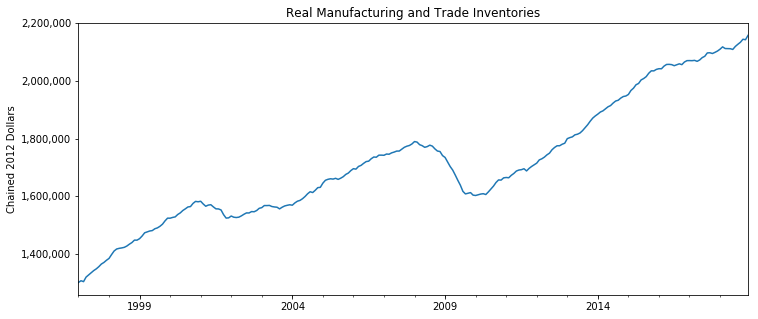

In [ ]:
# HERE'S A TRICK TO ADD COMMAS TO Y-AXIS TICK VALUES
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title='Real Manufacturing and Trade Inventories'
ylabel='Chained 2012 Dollars'
xlabel='' # we don't really need a label here

ax = df14['Inventories'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

___
## California Publishing Industry Employees
All Employees: Information: Newspaper, Periodical, Book, and Directory Publishers in California in Thousands of Persons, Not Seasonally Adjusted, from Jan 1990-Dec 2018 (348 records)<br>
Source: https://fred.stlouisfed.org/series/SMU06000005051110001

In [ ]:
df15 = pd.read_csv('../Data/PublishingEmployees.csv',index_col='Date',parse_dates=True)
df15.index.freq = 'MS'
df15.head()

Employees
Date                 
1990-01-01       69.1
1990-02-01       69.2
1990-03-01       69.9
1990-04-01       69.7
1990-05-01       69.8

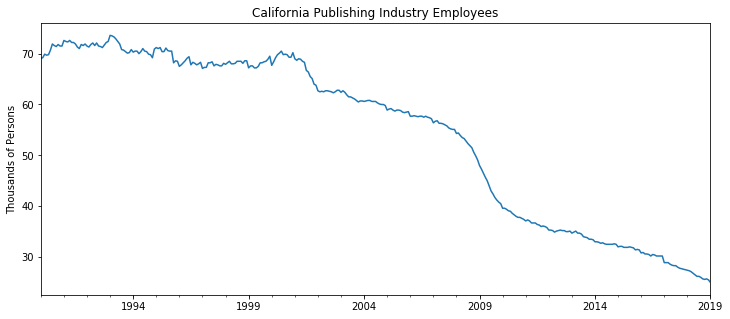

In [ ]:
title='California Publishing Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df15['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## California Hospitality Industry Employees
All Employees: Leisure and Hospitality in California in Thousands of Persons, Not Seasonally Adjusted, from Jan 1990-Dec 2018 (348 records)
Source: https://fred.stlouisfed.org/series/CALEIHN

In [ ]:
df16 = pd.read_csv('../Data/HospitalityEmployees.csv',index_col='Date',parse_dates=True)
df16.index.freq = 'MS'
df16.head()

Employees
Date                 
1990-01-01     1064.5
1990-02-01     1074.5
1990-03-01     1090.0
1990-04-01     1097.4
1990-05-01     1108.7

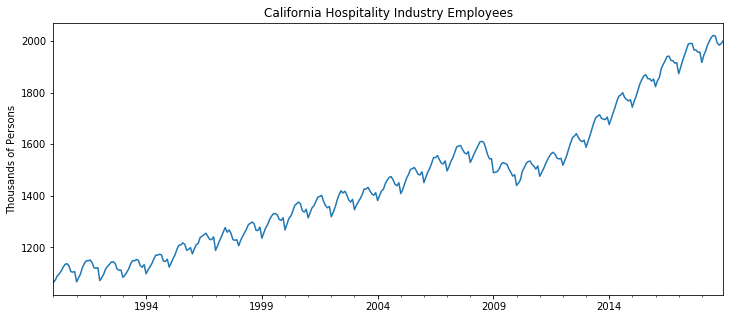

In [ ]:
title='California Hospitality Industry Employees'
ylabel='Thousands of Persons'
xlabel='' # we don't really need a label here

ax = df16['Employees'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## RideAustin
RideAustin is a non-profit, municipal ridesharing service based in Austin, Texas, with a model comparing directly to that of Uber. The data covers rides requested from June 4, 2016 to February 7, 2017 (249 days), just over 35 weeks. It shows a clear weekly cycle, with peak ride demand typically on Saturday.<br>
Data was made available by CEO Andy Tryba, at https://data.world/andytryba/rideaustin

In [ ]:
df17 = pd.read_csv('../Data/RideAustin.csv',index_col='Date',parse_dates=True)
df17.index.freq = 'D'
df17.head()

Rides  PRCP  TMAX  TMIN  AWND  GustSpeed2  Fog  HeavyFog  Thunder
Date                                                                         
2016-06-04      7   0.1    86    67   4.9        13.0    1         0        0
2016-06-05     12   0.0    88    68   5.8        14.1    0         0        0
2016-06-06     19   0.0    90    70   4.3        13.0    0         0        0
2016-06-07     22   0.0    92    69   2.0         8.1    0         0        0
2016-06-08     35   0.0    92    70   2.7        12.1    1         0        0

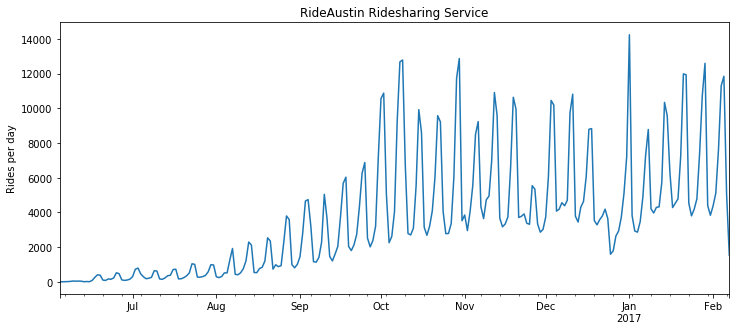

In [ ]:
title='RideAustin Ridesharing Service'
ylabel='Rides per day'
xlabel='' # we don't really need a label here

ax = df17['Rides'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

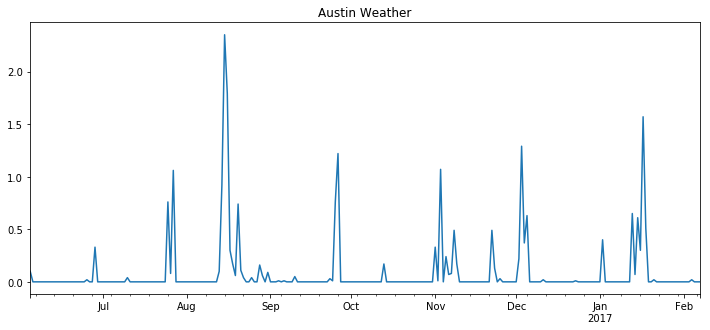

In [ ]:
title = 'Austin Weather'
ylabel=''
xlabel=''

ax = df17['PRCP'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Value of Manufacturers' Shipments
Value of Manufacturers' Shipments for All Manufacturing Industries in millions of dollars, not seasonally adjusted. Monthly data, January 1992 to January 2019 (325 records).<br>
Source: https://fred.stlouisfed.org/series/UMTMVS

In [ ]:
df18 = pd.read_csv('../Data/UMTMVS.csv',index_col='DATE',parse_dates=True)
df18.index.freq = 'MS'
df18.head()

UMTMVS
DATE                
1992-01-01  209438.0
1992-02-01  232679.0
1992-03-01  249673.0
1992-04-01  239666.0
1992-05-01  243231.0

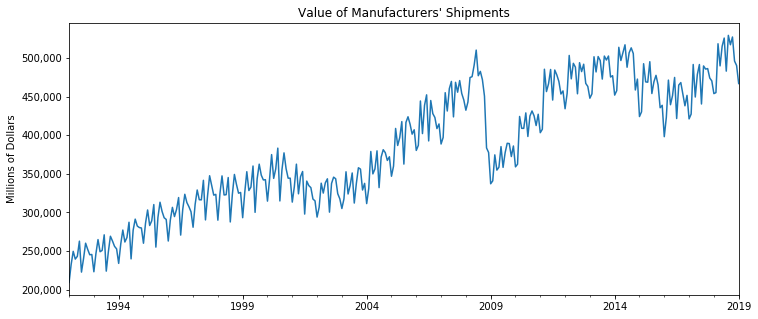

In [ ]:
# HERE'S A TRICK TO ADD COMMAS TO Y-AXIS TICK VALUES
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

title="Value of Manufacturers' Shipments" # be careful with quotes here!
ylabel='Millions of Dollars'
xlabel='' # we don't really need a label here

ax = df18['UMTMVS'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

___
## M2 Money Stock 
U.S. M2 Money Stock in Billions of Dollars, Monthly, Seasonally Adjusted, 1/1/95-12/1/15 (252 records)<br>
Compared to M1, M2 includes a broader set of financial assets held principally by households. M2 consists of M1 plus: (1) savings deposits (which include money market deposit accounts, or MMDAs); (2) small-denomination time deposits (time deposits in amounts of less than $100,000); and (3) balances in retail money market mutual funds (MMMFs).<br>
Source: https://fred.stlouisfed.org/series/M2SL

In [ ]:
df19 = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col='Date',parse_dates=True)
df19.index.freq = 'MS'
df19.head()

Money
Date              
1995-01-01  3492.4
1995-02-01  3489.9
1995-03-01  3491.1
1995-04-01  3499.2
1995-05-01  3524.2

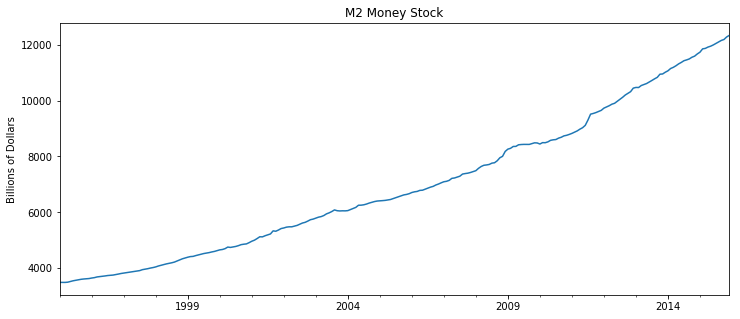

In [ ]:
title = 'M2 Money Stock'
ylabel='Billions of Dollars'
xlabel=''

ax = df19['Money'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## Personal Spending
U.S. Personal Consumption Expenditures in Billions of Dollars, Monthly, Seasonally Adjusted, 1/1/95-12/1/15 (252 records)<br>
See Bureau of Economic Analysis, BEA Account Code: DPCERC<br>
A Guide to the National Income and Product Accounts of the United States (NIPA) - http://www.bea.gov/national/pdf/nipaguid.pdf<br>
Source: https://fred.stlouisfed.org/series/PCE

In [ ]:
df20 = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0, parse_dates=True)
df20.index.freq = 'MS'
df20.head()

Spending
Date                
1995-01-01    4851.2
1995-02-01    4850.8
1995-03-01    4885.4
1995-04-01    4890.2
1995-05-01    4933.1

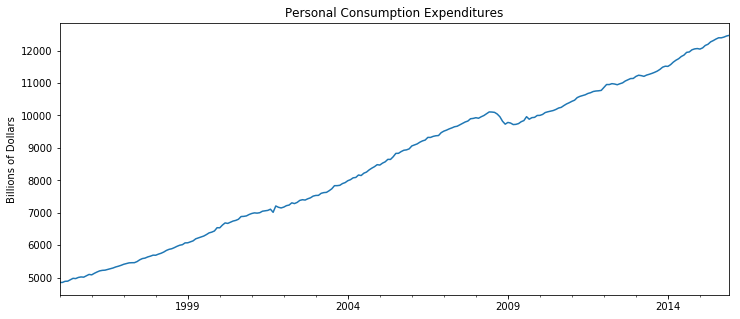

In [ ]:
title = 'Personal Consumption Expenditures'
ylabel='Billions of Dollars'
xlabel=''

ax = df20['Spending'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

___
## U.S. Population by County
Population data from the 2010 Census and 2017 Estimates for counties in the 50 U.S. States and District of Columbia. <br>
Data is used for pandas exercises - it does <em>not</em> contain dates. (3142 records, 4 columns)<br>
Source: https://www.census.gov/data/tables/2017/demo/popest/counties-total.html

In [ ]:
dfx = pd.read_csv('../Data/population_by_county.csv')
dfx.head()

County           State  2010Census  2017PopEstimate
0  Abbeville County  South Carolina       25417            24722
1     Acadia Parish       Louisiana       61773            62590
2   Accomack County        Virginia       33164            32545
3        Ada County           Idaho      392365           456849
4      Adair County            Iowa        7682             7054